#### 1. object

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('../data/Train_set.csv')
# data = pd.read_csv('../data/Sample_Submission_(2).csv')
# data = pd.read_csv('../data/Test_set.csv')

In [3]:
pd.set_option('display.max_rows', 10)

In [4]:
object_list=[] ### list 4 object columns
for col in data.columns:
    if data[col].dtype == 'object':
        object_list.append(col)

In [5]:
object_list

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'application_type']

#### 2. import

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import StandardScaler # scale data using z-score

from scipy.spatial.distance import cdist, pdist # compute distances

from sklearn.cluster import KMeans # perform k-means clustering, compute silhouette scores
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer # visualize elbow curve, silhouette scores

from sklearn.cluster import AgglomerativeClustering # perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings # suppress warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import pdist, squareform # ChatGPT3 recommended libraries:

from xlwings import view 
from xlwings import load

In [23]:
print(f"{data.shape[0]} rows, {data.shape[1]} cols")

93174 rows, 23 cols


In [14]:
df = data.copy()

[Fill NaN Values](https://www.statology.org/pandas-fillna-with-median/)

In [17]:
mode = df['job_experience'].mode().item() # replace job_experience na values # ChatGPT3 updated lines
df['job_experience'] = df['job_experience'].fillna(mode)

In [27]:
object_list

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'application_type']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              93174 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

### 3. duplicates and 4. missing values

#### df.duplicated().sum() = 0

In [30]:
df.duplicated().sum() # total number of duplicate values

0

#### df.isna().sum() = 0 / each col

In [31]:
def isna_checker(data=data, col=col):
    """
    function to check if the count in each col of data is 0. 
    """
    dc=data[col]
    for col in data.columns:
        print(data[col].head(2))
    df_isna=df.isna().sum() # full dataframe
    found_na=False
    # for i in df_isna.keys(): # take 1 key at a time out of just the keys
    #     if df_isna==0:
    #         pass
    # inform user
    # if found_na==False:
    #     print('no na values in data')
    # else:
    #     print('the following columns have na values:')
        

In [ ]:
isna_checker(data,col)

#### end of section: df.isna().sum() = 0 / each col

In [ ]:
for col in data.columns:
    print(isna_checker(data,col))

###### Put na counts keys and values in a dictionary

In [ ]:
object_na_counts={}
df_isna=df.isna().sum()
dnaky=df_isna.keys()
dnavl=df_isna.array
for index, col_na_count in enumerate(df_isna):
    # print(index)
    object_na_counts.update({dnaky[index]:dnavl[index]})
object_na_counts
# reference: [pandas.DataFrame.values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html)
# reference: [pandas.Series.array](https://pandas.pydata.org/docs/reference/api/pandas.Series.array.html#pandas.Series.array)
# dnavl[0]

In [ ]:
object_na_counts

In [37]:
df[df['annual_income'].isna()] # https://datatofish.com/rows-with-nan-pandas-dataframe/

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade   
82922  70735       6500   3 years           8.38          A            A5  \

      job_experience home_ownership  annual_income income_verification_status   
82922       <5 Years           NONE            NaN               Not Verified  \

      loan_purpose state_code  debt_to_income  delinq_2yrs  public_records   
82922        other         NY             4.0          NaN             NaN  \

       revolving_balance  total_acc  interest_receive application_type   
82922                  0        NaN            873.83       INDIVIDUAL  \

       last_week_pay  total_current_balance  total_revolving_limit  default  
82922          157.0                    NaN                    NaN        1

for all rows

https://www.statology.org/pandas-select-rows-based-on-column-values/

In [40]:
len(df.loc[(df['home_ownership'] == 'NONE') & (df['income_verification_status'] == 'Not Verified')])

6

In [43]:
df.loc[(df['home_ownership'] == 'NONE') & (df['income_verification_status'] == 'Not Verified')]

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade   
13500  2507062      12375   3 years          14.09          B            B5  \
16184  2507263       9000   3 years          14.33          C            C1   
42467  2506760      10000   3 years          10.16          B            B1   
43846  2656907      11700   3 years          15.31          C            C2   
81027  2506797      15000   3 years          15.31          C            C2   
82922    70735       6500   3 years           8.38          A            A5   

      job_experience home_ownership  annual_income income_verification_status   
13500     6-10 years           NONE        36000.0               Not Verified  \
16184      10+ years           NONE        71000.0               Not Verified   
42467       <5 Years           NONE        73000.0               Not Verified   
43846      10+ years           NONE        55000.0               Not Verified   
81027      10+ years           NONE       117500.0               Not Verified   
82922       <5 Years           NONE            NaN               Not Verified   

      loan_purpose state_code  debt_to_income  delinq_2yrs  public_records   
13500  credit_card         NJ           18.53          0.0             0.0  \
16184  credit_card         NJ           16.82          0.0             0.0   
42467  credit_card         TX           13.50          1.0             0.0   
43846  credit_card         MN           10.87          0.0             0.0   
81027  credit_card         NJ           10.63          3.0             0.0   
82922        other         NY            4.00          NaN             NaN   

       revolving_balance  total_acc  interest_receive application_type   
13500               7092       25.0           1558.48       INDIVIDUAL  \
16184              39598       23.0           2024.75       INDIVIDUAL   
42467               7980       19.0            402.60       INDIVIDUAL   
43846              10525       16.0           2964.99       INDIVIDUAL   
81027               6819       35.0           2274.63       INDIVIDUAL   
82922                  0        NaN            873.83       INDIVIDUAL   

       last_week_pay  total_current_balance  total_revolving_limit  default  
13500           61.0                30520.0                 9000.0        0  
16184          130.0               304425.0                49100.0        0  
42467           22.0                37543.0                25000.0        1  
43846          156.0                67119.0                12800.0        1  
81027           61.0               232951.0                15500.0        1  
82922          157.0                    NaN                    NaN        1

In [41]:
df_an_incm=df.loc[(df['home_ownership'] == 'NONE') & (df['income_verification_status'] == 'Not Verified')]


In [47]:
df_an_incm['annual_income'].mean()

70500.0

In [48]:
mean = df_an_incm['annual_income'].mean().item() # replace job_experience na values # ChatGPT3 updated lines
df['annual_income'] = df['annual_income'].fillna(mean)

# =df_an_incm['annual_income'].mean()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              93174 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93174 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [50]:
df['delinq_2yrs']

0        0.0
1        0.0
2        2.0
3        0.0
4        0.0
        ... 
93169    0.0
93170    0.0
93171    1.0
93172    0.0
93173    0.0
Name: delinq_2yrs, Length: 93174, dtype: float64

In [ ]:
object_na_counts.values

<function dict.values>

`keys, values = zip(*d.items())`, where d is dictionary [Is there a more elegant way for unpacking keys and values of a dictionary into two lists, without losing consistence? | StackOverflow](https://stackoverflow.com/questions/6612769/is-there-a-more-elegant-way-for-unpacking-keys-and-values-of-a-dictionary-into-t)

In [ ]:
keys, values = zip(*object_na_counts.items())


In [ ]:
keys

('ID',
 'loan_amnt',
 'loan_term',
 'interest_rate',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'annual_income',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'debt_to_income',
 'delinq_2yrs',
 'public_records',
 'revolving_balance',
 'total_acc',
 'interest_receive',
 'application_type',
 'last_week_pay',
 'total_current_balance',
 'total_revolving_limit',
 'default')

`    print(x, end=' ')` [python: printing horizontally rather than current default printing](https://stackoverflow.com/questions/8437964/python-printing-horizontally-rather-than-current-default-printing)

[list comprehensions](https://medium.com/quick-code/python-one-liner-list-comprehension-24e35a20bd1d)

In [ ]:
for x in values:
    print(x, end=',')

0,0,0,0,0,0,4702,0,1,0,0,0,0,2,2,0,2,0,0,1924,7386,7386,0,

In [ ]:
keyvalc = [(keyc,valc) for keyc in enumerate(object_na_counts) for valc in enumerate(object_na_counts) ]

In [ ]:
a=[(b) for b in object_na_counts]

In [ ]:
[x for x in a]

In [ ]:
for x in a:
    print(x)

ID
loan_amnt
loan_term
interest_rate
loan_grade
loan_subgrade
job_experience
home_ownership
annual_income
income_verification_status
loan_purpose
state_code
debt_to_income
delinq_2yrs
public_records
revolving_balance
total_acc
interest_receive
application_type
last_week_pay
total_current_balance
total_revolving_limit
default


In [ ]:
stack={}
for index, count in enumerate(object_na_counts):
    # print(index,(1-len(str(index)))*' ',count, (30-len(count))*' ',object_na_counts[count])
    # print(index,count,object_na_counts[count])
    if object_na_counts[count]>0:
        # print(index,count,object_na_counts[count])
        layer={count:object_na_counts[count]}
        stack.update(layer)
for key in stack:
    print(key)
    

job_experience
annual_income
delinq_2yrs
public_records
total_acc
last_week_pay
total_current_balance
total_revolving_limit


###### get .keys() for na_count (per column) dictionary:

In [ ]:
object_na_counts.keys()

dict_keys(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade', 'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income', 'income_verification_status', 'loan_purpose', 'state_code', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'application_type', 'last_week_pay', 'total_current_balance', 'total_revolving_limit', 'default'])

###### get .values() for na_count (per column) dictionary:

In [ ]:
object_na_counts.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- dict.values returns dict-value object, not list object
    - set-like object, uses hash table to store items, not suitable for indexing
    - supports most of set attributes, optimized for ops like membership checking (using in operator).

- **Answer**: If you want to get a list object, you need to convert it to list by passing the result to the list() function.
- **Code**:

    ```
    the_values = dict.values()
    SUM = sum(list(the_values)[1:10])
    ```

[Python: how to convert a dictionary into a subscriptable array?](https://stackoverflow.com/questions/33674033/python-how-to-convert-a-dictionary-into-a-subscriptable-array)

###### To check no na values [Resolved]:

In [ ]:
sum_object_na_counts=0
for index, value in enumerate(object_na_counts.values()):
    sum_object_na_counts+=list(object_na_counts.values())[index]
if (sum_object_na_counts==0):
    print("no na values in dataframe")

no na values in dataframe


### Statistical summary

In [ ]:
df.describe(include='all').T

count unique   
Ticker Symbol                         340    340  \
Security                              340    340   
GICS Sector                           340     11   
GICS Sub Industry                     340    104   
Current Price                340.00000000    NaN   
...                                   ...    ...   
Net Income                   340.00000000    NaN   
Earnings Per Share           340.00000000    NaN   
Estimated Shares Outstanding 340.00000000    NaN   
P/E Ratio                    340.00000000    NaN   
P/B Ratio                    340.00000000    NaN   

                                                             top freq   
Ticker Symbol                                                AAL    1  \
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
...                                                          ...  ...   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                            mean                 std   
Ticker Symbol                                NaN                 NaN  \
Security                                     NaN                 NaN   
GICS Sector                                  NaN                 NaN   
GICS Sub Industry                            NaN                 NaN   
Current Price                        80.86234477         98.05508603   
...                                          ...                 ...   
Net Income                   1494384602.94117641 3940150279.32793617   
Earnings Per Share                    2.77666176          6.58777885   
Estimated Shares Outstanding  577028337.75402951  845849595.41769493   
P/E Ratio                            32.61256332         44.34873118   
P/B Ratio                            -1.71824936         13.96691180   

                                               min                25%   
Ticker Symbol                                  NaN                NaN  \
Security                                       NaN                NaN   
GICS Sector                                    NaN                NaN   
GICS Sub Industry                              NaN                NaN   
Current Price                           4.50000000        38.55499975   
...                                            ...                ...   
Net Income                   -23528000000.00000000 352301250.00000000   
Earnings Per Share                    -61.20000000         1.55750000   
Estimated Shares Outstanding     27672156.86000000 158848216.09999999   
P/E Ratio                               2.93545077        15.04465283   
P/B Ratio                             -76.11907749        -4.35205649   

                                            50%                 75%   
Ticker Symbol                               NaN                 NaN  \
Security                                    NaN                 NaN   
GICS Sector                                 NaN                 NaN   
GICS Sub Industry                           NaN                 NaN   
Current Price                       59.70500000         92.88000125   
...                                         ...                 ...   
Net Income                   707336000.00000000 1899000000.00000000   
Earnings Per Share                   2.89500000          4.62000000   
Estimated Shares Outstanding 309675137.79999995  573117457.32499993   
P/E Ratio                           20.81987609         31.76475537   
P/B Ratio  

##### object_list for object type columns

Tabnine/GitHub CoPilot assisted sentence completion in the next couple of markdown cells.:

##### statistical summary using `describe()` method:

(and .T to transpose dataframe for readability),

###### observations:


1. Many NaN (Not a Number) values in data

- However, NaN's in 1st 4 columns (not numerical)

###### Flagged 4 features, passed them to object_list for ease of reference, as follows:

In [ ]:
object_list

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

2. For the 3 columns:
    - unique
    - top and
    - freq
    
    all the numeric columns have NaN values.

    Explanation: 3 cols not applicable to numerical columns.

- count is an integer for object columns, and a float for numeric columns.

- Price Change, Net Cash Flow and Net Income have negative values, (not an issue as these values can be negative).

## Exploratory Data Analysis

### Univariate analysis

---

#### matplotlib.pyplot.subplots / plt.subplots

For the univariate analysis:
histogram boxplot was used.

The first line of code in the function starts with:

`f2, (ax_box2, ax_hist2) = plt.subplots(`

Here is the documentation for [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

which states that the purpose of the method is to:

"Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.



##### Returns:

`fig` : 
        Figure

`ax` :
**Axes** or array of **Axes**
- `ax` can be either :
    - a single **Axes** object, or 
    - an array of **Axes** objects
        - if more than one **subplot** was created. 
    - The dimensions of the resulting array can be controlled with 
        - the `squeeze` keyword, see above.

- Typical idioms for handling the return value are:

===================================================

```
# using the variable ax for single a Axes
fig, ax = plt.subplots()

# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
```

(The names `ax` and pluralized `axs` 
- are preferred over axes because for the latter 
    - it's not clear if it refers to:
        - a single Axes instance or
        - a collection of these.
)

#### end of notes on matplotlib.pyplot.subplots / plt.subplots

---

#### seaborn notes:

##### sns.boxplot

Reference: [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) / from VSCode mouseover function popup

seaborn.boxplot:
```
(function) def boxplot(
    data: Any | None = None,
    *,
    x: Any | None = None,
    y: Any | None = None,
    hue: Any | None = None,
    order: Any | None = None,
    hue_order: Any | None = None,
    orient: Any | None = None,
    color: Any | None = None,
    palette: Any | None = None,
    saturation: float = 0.75,
    width: float = 0.8,
    dodge: bool = True,
    fliersize: int = 5,
    linewidth: Any | None = None,
    whis: float = 1.5,
    ax: Any | None = None,
    **kwargs: Any
) -> Any
```

box plot (box-and-whisker plot):
- shows distributions with respect to categories.

- shows distribution of data for comparisons between variables. box shows quartiles of data, whiskers extend, show rest of distribution, except “outliers” found by a method that is a function of the inter-quartile range.

================================================================================

##### sns.histplot

Reference: [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) / from VSCode mouseover function popup:

```
(function) def histplot(
    data: Any | None = None,
    *,
    x: Any | None = None,
    y: Any | None = None,
    hue: Any | None = None,
    weights: Any | None = None,
    stat: str = "count",
    bins: str = "auto",
    binwidth: Any | None = None,
    binrange: Any | None = None,
    discrete: Any | None = None,
    cumulative: bool = False,
    common_bins: bool = True,
    common_norm: bool = True,
    multiple: str = "layer",
    element: str = "bars",
    fill: bool = True,
    shrink: int = 1,
    kde: bool = False,
    kde_kws: Any | None = None,
    line_kws: Any | None = None,
    thresh: int = 0,
    pthresh: Any | None = None,
    pmax: Any | None = None,
    cbar: bool = False,
    cbar_ax: Any | None = None,
    cbar_kws: Any | None = None,
    palette: Any | None = None,
    hue_order: Any | None = None,
    hue_norm: Any | None = None,
    color: Any | None = None,
    log_scale: Any | None = None,
    legend: bool = True,
    ax: Any | None = None,
    **kwargs: Any
) -> Any
```

Plot univariate / bivariate histograms, show data distributions.

histogram: visualization of distribution of variable(s) by counting number of observations in bins

function can:
- normalize statistic computed in each bin to estimate frequency, density or probability mass,
- add smooth curve using kernel density estimate, similar to kdeplot().

(More info in user guide)

#### end of notes on seaborn

---

---

##### def histogram_boxplot():

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### show histogram_boxplots:

output format: histogram with a single thin boxplot above to summarise the distribution.

###### **`Current Price`**

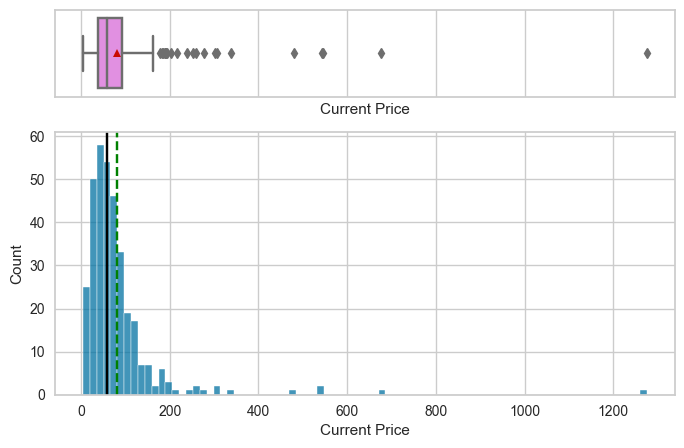

In [ ]:
histogram_boxplot(df, 'Current Price')

###### Current stock price:

- mainly in the $0 to $200 range
- right skewed
    - outliers roughly above $200
        - up to $1200

###### call .describe() on ['Price Change'] column and explain output:

In [ ]:
df['Current Price'].describe() # GitHub Copilot assisted line

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

- Max current stock price is $1274.95
- Min current stock price is $4.50
    - this could be thought of as a so called penny stock.
        - the advantage of these stocks is that they can be purchased at a low price
            - however, one of the risks (as with any stock) is that the price can go to $0 resulting in total loss of investment, and potentially incurring liabilities exceeding initial investment, if leverage is used, which greatly increases risk.

- mean current stock price is $80.86
- one standard deviation in stock price is $98.06
- the median is $59.71

- Overall shape of the data:
    - with lon tail to the right,
        - tending to shift the mean upwards
- combined with
- mean (~81) being higher than median (~60)
- are indicative of:
- right skewed data for the df['Current Price'] Series/Column/Feature

##### Explore different methods to Compute Quantiles:

###### pandas.describe()

`.describe()`

used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

[Describe](https://www.javatpoint.com/pandas-dataframe-describe#:~:text=Pandas%20DataFrame.-,describe(),sets%20of%20mixed%20data%20types.)

general form: `DataFrame.describe(percentiles=None, include=None, exclude=None)`

###### explanation:

Generate descriptive statistics.

- e.g. summarize:
    - central tendency,
    - dispersion and
    - shape
        - of a dataset’s distribution,
        - excluding NaN values.

Analyzes:
- both:
    - numeric and
    - object series, 
- and df col sets of mixed data types. 

Output varies with input. See notes in [docs](https://www.javatpoint.com/pandas-dataframe-describe#:~:text=Pandas%20DataFrame.-,describe(),sets%20of%20mixed%20data%20types.) for more detail.

###### Parameters:
percentiles : list-like of numbers, optional
- set output percentiles
- All should be between 0 and 1.
    - Default: [.25, .5, .75]
        - returns 25th, 50th, and 75th percentiles

include : ‘all’, list-like of dtypes or None (default), optional
- white list of data types to include in the result.
- Ignored for Series.
- Here are the options:

    - ‘all’ : All columns of the input will be included in the output.

    - A list-like of dtypes : Limits the results to the provided data types. To limit the result to numeric types submit numpy.number. To limit it instead to object columns submit the numpy.object data type. Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])). To select pandas categorical columns, use 'category'

    - None (default) : The result will include all numeric columns.

In [ ]:
df['Current Price'].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

In [ ]:
df['Current Price'].describe().keys()

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
df['Current Price'].describe().keys()[0]

'count'

In [ ]:
IQR=[]
Q1=0
Q3=0
for x in df['Current Price'].describe().keys():
    if x== '25%':
        Q1=x
    if x == '75%':
        Q3=x
    IQR=[Q1,Q3]
    
# df['Current Price'].describe().keys()[i]

In [ ]:
Q1=IQR[0]
Q3=IQR[1]
# IQR_no=Q1-Q3

In [ ]:
Q1

'25%'

In [ ]:
for a in df['Current Price'].describe().keys():
    if a=='25%':
        Q1_val=(df['Current Price'].describe()[a])

In [ ]:
Q1_val

38.55499975

In [ ]:
for a in df['Current Price'].describe().keys():
    if a=='75%':
        Q3_val=(df['Current Price'].describe()[a])

In [ ]:
Q3_val

92.88000124999999

In [ ]:
IQR_val = Q3_val - Q1_val

In [ ]:
IQR_val

54.32500149999999

[pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
df['Current Price'].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

###### limit to 2 decimal places:

[Limiting floats to two decimal points](https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points)

References:

[Format Specification Mini-Language](https://docs.python.org/3/library/string.html#format-specification-mini-language)

In [ ]:
df['Current Price'].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

In [ ]:
round(Q1_val,3)

38.555

In [ ]:
Q1_val_round_3_to_2=round(Q1_val,3)

In [ ]:
round(Q1_val_round_3_to_2,2) # rounds to 38.56

38.56

In [ ]:
round(Q1_val,2) # rounds to 38.55

38.55

In [ ]:
Q3_val_round_3_to_2=round(Q3_val,3)

In [ ]:
round(Q3_val_round_3_to_2,2)

92.88

In [ ]:
round(round(Q3_val,3),2)

92.88

text: `*args allows us to pass a variable number of non-keyword arguments to a Python function.` 

code:
```
def add(*args):
    print(args, type(args))

add(2, 3)
```
[How to Use *args and **kwargs in Python - freeCodeCamp](https://www.freecodecamp.org/news/args-and-kwargs-in-python/#:~:text=*args%20allows%20us%20to%20pass,a%20variable%20number%20of%20arguments.)

In [ ]:
IQR_val

54.32500149999999

In [ ]:
def two_decimal_correct(*args):
    """
    pass *args as list
    takes floats
    returns list_of_outputs rounded to 2 decimal places
    Purpose of function:
    - to avoid error rounding from float to 2 decimal places
    - by first rounding to 3 and then to 2
    - which seems to fix bug of:
        - rounding directly to 2
        - can result in rounding down
        - even when next decimal place is >=5
    """
    list_of_outputs=[]
    for new_input in args:
        new_output=round(round(new_input,3),2)
        list_of_outputs.append(new_output)
    return list_of_outputs

In [ ]:
two_decimal_correct(Q3_val, Q1_val, IQR_val)

[92.88, 38.56, 54.32]

In [ ]:
type(two_decimal_correct(Q3_val, Q1_val, IQR_val))

list

In [ ]:
type(IQR_val)

numpy.float64

In [ ]:
[IQR_val]

[54.32500149999999]

In [ ]:
two_decimal_correct(IQR_val)

[54.32]

TODO: How to unpack list.

Reference: [How to Unpack a List in Python](https://www.pythontutorial.net/python-basics/python-unpack-list/)

Code:

`colors = ['red', 'blue', 'green']`

```
red = colors[0]
blue = colors[1]
green = colors[2]
```


In [ ]:
two_decimal_correct(IQR_val)[0]

54.32

In [ ]:
df['Current Price'].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

In [ ]:
print('The interquartile range (IQR) (Q3 - Q1) ({Q3_val_2:.2f}-{Q1_val_2:.2f}) (92.88 - 38.56) is $'.format(Q3_val_2=two_decimal_correct(Q3_val)[0],Q1_val_2=two_decimal_correct(Q1_val)[0]),'{IQR_val_2:.2f}'.format(IQR_val_2=two_decimal_correct(IQR_val)[0]))

The interquartile range (IQR) (Q3 - Q1) (92.88-38.56) (92.88 - 38.56) is $ 54.32


###### [Task:] Get IQR with pandas.

```
# Some test data
np.random.seed(33454)
df = (
    # A standard distribution
    pd.DataFrame({'nb': np.random.randint(0, 100, 20)})
        # Adding some outliers
        .append(pd.DataFrame({'nb': np.random.randint(100, 200, 2)}))
        # Reseting the index
        .reset_index(drop=True)
    )

# Computing IQR
Q1 = df['nb'].quantile(0.25)
Q3 = df['nb'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')
```

[how to use pandas filter with IQR](https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr)

In [ ]:
df['Current Price'].quantile(0.25)

38.55499975

###### Note:

As actual 1st quantile is 38.55499975, per `df['Current Price'].quantile(0.25)`,

not 38.555000 per `df['Current Price'].describe[4]`,

function: `two_decimal_correct()` is not needed,

as this function worked from the false assumption that

df['Current Price'].describe[4] was precisely correct to the number of decimal places shown.

However, it now appears that the reason the value was rounded down was that the actual value

was just under 38.555000 quoted by `df['Current Price']` 

which explained why it rounded down for both `{x.:f}.format()` and `round(x,2)` formulae.


###### calculating quartiles:

`bear in mind that there are 15 different ways to calculate quartiles.. so look under the hood as different functions may give slightly different results (pandas vs numpy vs scipy..) jse.amstat.org/v14n3/langford.html` [1], [2]

`In this paper, I will discuss the various methods, and using a precise definition (Definition 2) of percentile, identify that method which satisfies this definition. Unfortunately this method (the “CDF Method”) is not, in its usual form, the easiest for a student to apply.` [2]

[1] [How to calculate 1st and 3rd quartiles?](https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles)

[2] [Quartiles in Elementary Statistics](https://jse.amstat.org/v14n3/langford.html)

###### end of this section of calculating quartiles

---

###### calculating quantiles continued: Inverse CDF Method:

###### Inverse CDF (in the context of calculating quantiles)

search: `the CDF Method for quantiles`

reference: [The Inverse CDF Method](https://dk81.github.io/dkmathstats_site/prob-inverse-cdf.html#:~:text=The%20inverse%20CDF%20method%20involves,Theory%2C%20and%20Monte%20Carlo%20Simulations.)

explanation: 
```
This ... math and probability post ... will talk about generating non-uniform random variables/numbers with the Inverse CDF Method [, which] involves computing quantiles from probabilities and using standard uniform random variables to generate non-uniform random variables.

This topic relates to Probability Theory, and Monte Carlo Simulations.
```
[1]

Aside: [1] references [2]

[1] [Quartiles in Elementary Statistics](https://jse.amstat.org/v14n3/langford.html)

[2] [Normal (Gaussian) Distribution | Boost C++ Libraries](https://www.boost.org/doc/libs/1_53_0/libs/math/doc/sf_and_dist/html/math_toolkit/dist/dist_ref/dists/normal_dist.html)

[3] [Boost C++ Libraries](https://www.boost.org/)

###### end of limit to 2 decimal places section

##### end of Section: Explore different methods to Compute Quantiles

---

###### **`Price Change`**

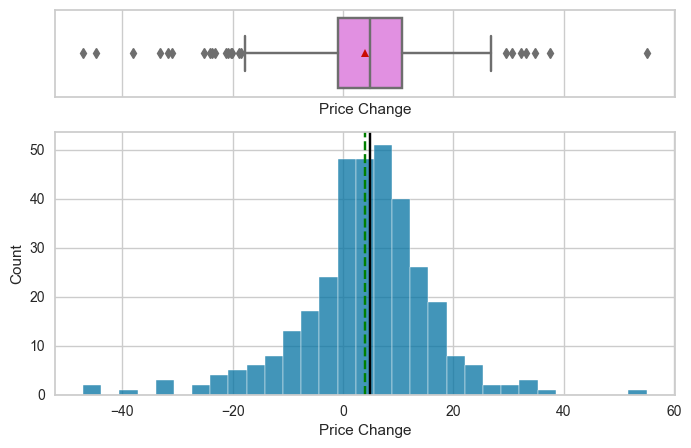

In [ ]:
histogram_boxplot(df, 'Price Change')  ## Complete the code to create histogram_boxplot for 'Price Change'

###### call .describe() on ['Price Change'] column and explain output:

In [ ]:
df['Price Change'].describe()

count    340.000000
mean       4.078194
std       12.006338
min      -47.129693
25%       -0.939484
50%        4.819505
75%       10.695493
max       55.051683
Name: Price Change, dtype: float64

- mean Price Change was $4.08 across all 340 stocks.

df['Price Change'].mean() = 4.08

###### string formatting and casting to float not int:

```
floatNumber = 1.9876

print("%.1f" % floatNumber)
# 2.0
```

[%.2f in Python – What does it Mean?](https://www.freecodecamp.org/news/2f-in-python-what-does-it-mean/)

Want to cast to float not int `To convert, or cast, a string to an integer in Python, you use the int() built-in function.` [Python Convert String to Int – How to Cast a String in Python](https://www.freecodecamp.org/news/python-convert-string-to-int-how-to-cast-a-string-in-python/#:~:text=To%20convert%2C%20or%20cast%2C%20a,int(%22str%22)%20.)

###### begin assembly of 5 explanatory lines on summary statistics (to be reused for each plot):

[Convert a string to a number (int, float) in Python - nkmk note](https://note.nkmk.me/en/python-str-num-conversion/)

In [ ]:
float("%.2f" % df['Price Change'].mean()) # resolved: cast string to float

4.08

In [ ]:
print("mean of Price Change was $", float("%.2f" % df['Price Change'].mean()), sep='')

mean of Price Change was $4.08


In [ ]:
print("median of Price Change was $", float("%.2f" % df['Price Change'].median()), sep='')

median of Price Change was $4.82


In [ ]:
print("standard deviation for Price Change was $", float("%.2f" % df['Price Change'].std()), sep='')

standard deviation for Price Change was $12.01


In [ ]:
print("minimum Price Change was $", float("%.2f" % df['Price Change'].min()), sep='')

minimum Price Change was $-47.13


In [ ]:
print("maximum Price Change was $", float("%.2f" % df['Price Change'].max()), sep='')

maximum Price Change was $55.05


###### non-automated description of plot:

As median was slightly to the right of the mean, or mean left of median, the histogram was slightly left skewed, with slightly longer left tail,
with more values in the tail further from the center.

This would indicate that there were more extremes of loss than of gain of these stocks over the 13 week period.

###### **`Volatility`**

In [ ]:
feature='Volatility'

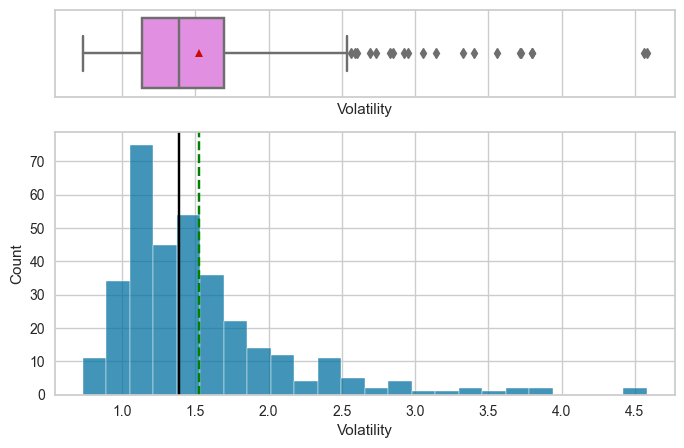

In [ ]:
histogram_boxplot(df=df,feature='Volatility')  ## Complete the code to create histogram_boxplot for 'Volatility'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()

In [ ]:
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned))

mean Volatility was $ 1.53
median Volatility was $ 1.39
standard deviation Volatility was $ 0.59
minimum Volatility was $ 0.73
maximum Volatility was $ 4.58


###### **`ROE`**

In [ ]:
feature='ROE'

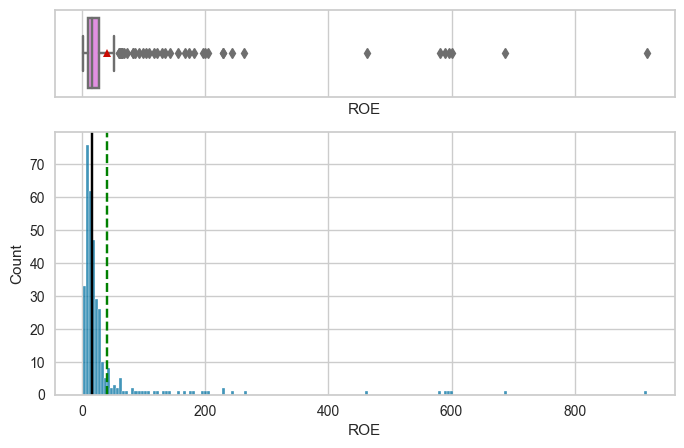

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'ROE'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned))

mean ROE was $ 39.6
median ROE was $ 15.0
standard deviation ROE was $ 96.55
minimum ROE was $ 1.0
maximum ROE was $ 917.0


###### **`Cash Ratio`**

In [ ]:
feature='Cash Ratio'

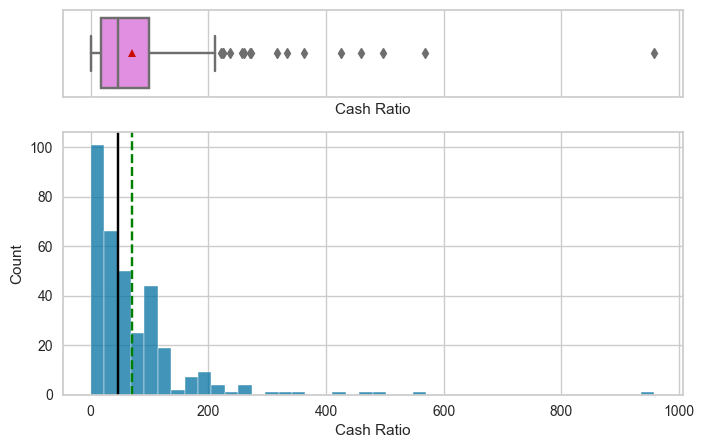

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned))

mean Cash Ratio was $ 70.02
median Cash Ratio was $ 47.0
standard deviation Cash Ratio was $ 90.42
minimum Cash Ratio was $ 0.0
maximum Cash Ratio was $ 958.0


###### **`Net Cash Flow`**

In [ ]:
feature='Net Cash Flow'

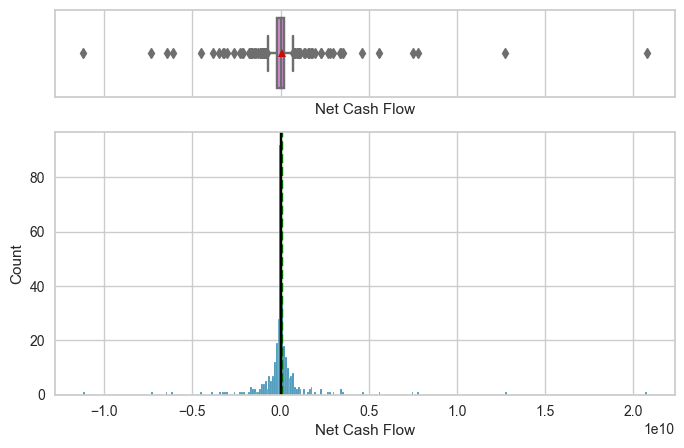

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned))

mean Net Cash Flow was $ 55537620.59
median Net Cash Flow was $ 2098000.0
standard deviation Net Cash Flow was $ 1946365312.18
minimum Net Cash Flow was $ -11208000000.0
maximum Net Cash Flow was $ 20764000000.0


###### **`Net Income`**

In [ ]:
feature='Net Income'

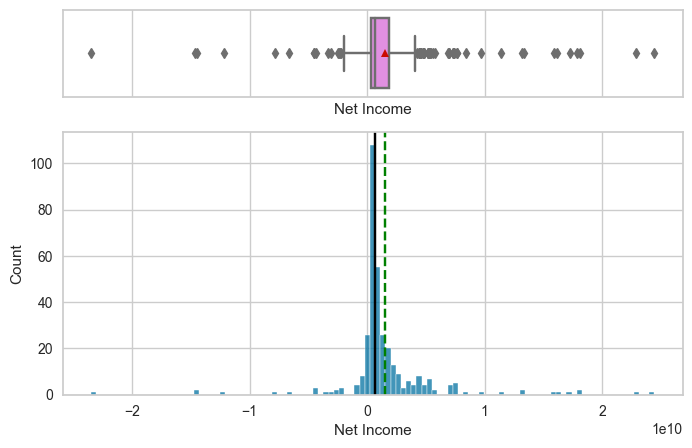

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'Net Income'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned))

mean Net Income was $ 1494384602.94
median Net Income was $ 707336000.0
standard deviation Net Income was $ 3940150279.33
minimum Net Income was $ -23528000000.0
maximum Net Income was $ 24442000000.0


###### **`Earnings Per Share`**

In [ ]:
feature='Earnings Per Share'

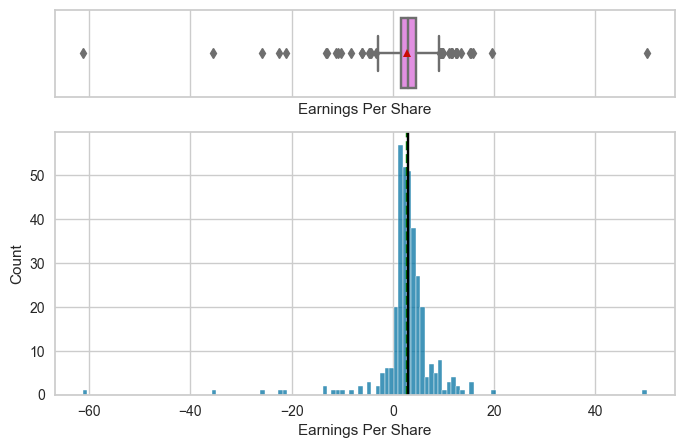

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned))

mean Earnings Per Share was $ 2.78
median Earnings Per Share was $ 2.9
standard deviation Earnings Per Share was $ 6.59
minimum Earnings Per Share was $ -61.2
maximum Earnings Per Share was $ 50.09


###### **`Estimated Shares Outstanding`**

In [ ]:
feature='Estimated Shares Outstanding'

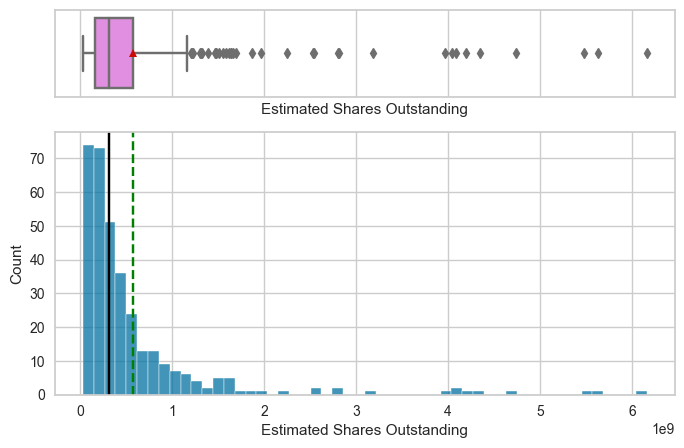

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)/10e6
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned), ' million', sep='')

mean Estimated Shares Outstanding was $57.7 million
median Estimated Shares Outstanding was $30.97 million
standard deviation Estimated Shares Outstanding was $84.58 million
minimum Estimated Shares Outstanding was $2.77 million
maximum Estimated Shares Outstanding was $615.93 million


###### **`P/E Ratio`**

In [ ]:
feature='P/E Ratio'

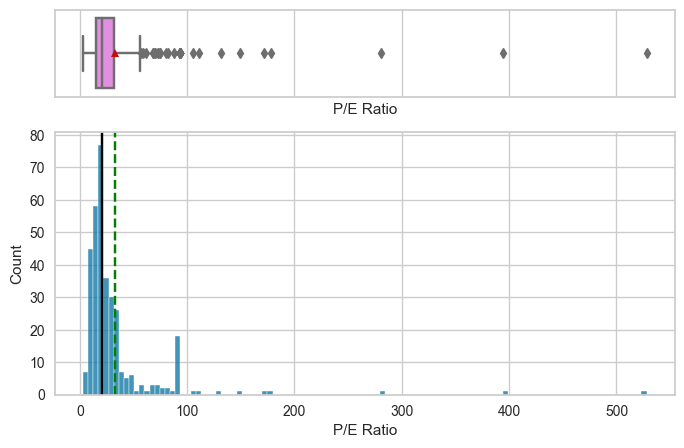

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned), sep='')

mean P/E Ratio was $32.61
median P/E Ratio was $20.82
standard deviation P/E Ratio was $44.35
minimum P/E Ratio was $2.94
maximum P/E Ratio was $528.04


###### **`P/B Ratio`**

In [ ]:
feature='P/B Ratio'

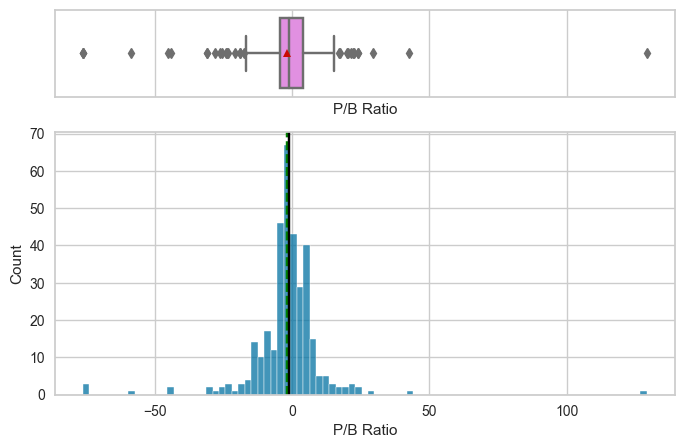

In [ ]:
histogram_boxplot(df=df,feature=feature)  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

In [ ]:
def function_arb(a,y):
    if y == '.mean()':
        return a.mean()
    elif y == '.median()':
        return a.median()
    elif y == '.std()':
        return a.std()
    elif y == '.min()':
        return a.min()
    elif y == '.max()':
        return a.max()
    
for x, y in zip(['mean', 'median', 'standard deviation', 'minimum', 'maximum'], ['.mean()', '.median()', '.std()', '.min()', '.max()']):
    a=df[feature]
    returned=function_arb(a,y)
    print(str("{x2} {feature_2} was $".format(x2=x,feature_2=feature)),float("%.2f" % returned), sep='')

mean P/B Ratio was $-1.72
median P/B Ratio was $-1.07
standard deviation P/B Ratio was $13.97
minimum P/B Ratio was $-76.12
maximum P/B Ratio was $129.06


#### end of histogram_boxplots

##### def labeled_barplot():

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None, figsize=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if figsize==None:
        if n is None:
            plt.figure(figsize=(count + 1, 5))
        else:
            plt.figure(figsize=(n + 1, 5))
    else:
        plt.figure(figsize=figsize)
    plt.xticks(rotation=90, fontsize=14)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### labeled_barplots

###### **`GICS Sector`**

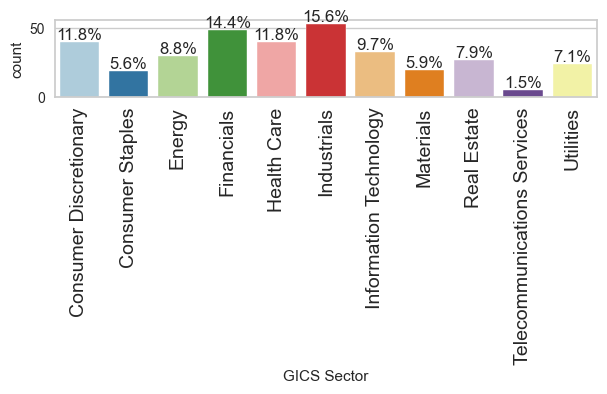

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True, figsize=(7,1))

The Industrials Sector had the most companies in the sample of 340 companies.

###### **`GICS Sub-Industry`** Issue: Convert Series to DataFrame and Get output of Index values:

Not working / deprecated: `unpack(df)` [How to unpack the columns of a pandas DataFrame to multiple variables](https://stackoverflow.com/questions/51225275/how-to-unpack-the-columns-of-a-pandas-dataframe-to-multiple-variables)

Issue: Works on DataFrame not Series: `DataFrame.unstack(level=- 1, fill_value=None)` [pandas.DataFrame.unstack](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)

Solution: `df['GICS Sector'].apply(pd.Series)` | `out.apply(pd.Series)` [How to unpack a Series of tuples in Pandas?](https://stackoverflow.com/questions/22799300/how-to-unpack-a-series-of-tuples-in-pandas)

In [ ]:
type(df['GICS Sector'].value_counts().index)
# how to unpack pandas index


pandas.core.indexes.base.Index

In [ ]:
df['GICS Sector'].apply(pd.Series).head(3)

0
0  Industrials
1  Health Care
2  Health Care

In [ ]:
GICS_Sector_Series_as_df=df['GICS Sector'].apply(pd.Series)

[pandas.RangeIndex](https://pandas.pydata.org/docs/reference/api/pandas.RangeIndex.html)

In [ ]:
GICS_Sector_Series_as_df.keys()

RangeIndex(start=0, stop=1, step=1)

In [ ]:
type(GICS_Sector_Series_as_df)

pandas.core.frame.DataFrame

In [ ]:
GICS_Sector_Series_as_df.keys() # RangeIndex(start=0, stop=1, step=1)
type(GICS_Sector_Series_as_df.keys())
GICS_Sector_Series_as_df.keys()

RangeIndex(start=0, stop=1, step=1)

In [ ]:
print(GICS_Sector_Series_as_df.keys())


RangeIndex(start=0, stop=1, step=1)


unused: [Pandas DataFrame RangeIndex](https://stackoverflow.com/questions/44452751/pandas-dataframe-rangeindex)

From ChatGPT3: How to see the keys?:

In [ ]:
print(GICS_Sector_Series_as_df.columns)

RangeIndex(start=0, stop=1, step=1)


In [ ]:
print(GICS_Sector_Series_as_df.columns)


RangeIndex(start=0, stop=1, step=1)


In [ ]:
print(GICS_Sector_Series_as_df.keys().tolist())

[0]


In [ ]:
GICS_Sector_Series_as_df.head(3)

0
0  Industrials
1  Health Care
2  Health Care

In [ ]:
type(GICS_Sector_Series_as_df[0])

pandas.core.series.Series

In [ ]:
GICS_Sector_Series_as_df.index

RangeIndex(start=0, stop=340, step=1)

###### Solution: to **`GICS Sub-Industry`** Issue: Convert Series to DataFrame and Get output of Index values:

In [ ]:
GICS_Sector_Series_as_df.index.tolist()[:8] # 0 to 7 of all 340 index values

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
len(GICS_Sector_Series_as_df.index.tolist()) # length or number of values in this dataframe from Series index is list of 340 values

340

[pandas.DataFrame.sort_values | Documentation  | pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

#### pandas.DataFrame.sort_values

DataFrame.sort_values(
    
                        by,

                        *,
                        
                        axis=0, 
                        
                        ascending=True, 
                        
                        inplace=False, 
                        
                        kind='quicksort', 
                        
                        na_position='last', 
                        
                        ignore_index=False, 
                        
                        key=None)

Sort by the values along either axis. (axis=0 or 1)

---


##### Parameters:

by : 
     
     str or list of str

          Name or list of names to sort by.

          - if axis is 0 or ‘index’ then by may contain index levels and/or column labels.

          - if axis is 1 or ‘columns’ then by may contain column levels and/or index labels.

---

axis : 
          
          {0 or ‘index’, 1 or ‘columns’}, default 0
               
               Axis to be sorted.
---
ascending : 

               bool or list of bool, default True

                    Sort ascending vs. descending. Specify list for multiple sort orders. If this is a list of bools, must match the length of the by.
---


inplace : 

            bool, default False
            
                If True, perform operation in-place.
---

kind : 

        {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, default ‘quicksort’

            Choice of sorting algorithm. See also numpy.sort() for more information. 
            
            mergesort and stable are the only stable algorithms. 
            
            For DataFrames, this option is only applied when sorting on a single column or label.
---



na_position :

                {‘first’, ‘last’}, default ‘last’
                    
                    Puts NaNs at the beginning if first; last puts NaNs at the end.

---

ignore_index :

                bool, default False
                
                    If True, the resulting axis will be labeled 0, 1, …, n - 1.
---

na_position : 
                
                {‘first’, ‘last’}, default ‘last’
                    
                    Puts NaNs at the beginning if first; last puts NaNs at the end.

---

ignore_index : 
    
                bool, default False
                    
                    If True, the resulting axis will be labeled 0, 1, …, n - 1.
---


key : 

        callable, optional

            Apply the key function to the values before sorting. This is similar to the key argument in the builtin sorted() function, with the notable difference that this key function should be vectorized. It should expect a Series and return a Series with the same shape as the input. It will be applied to each column in by independently.

---

Returns

        DataFrame or None


            DataFrame with sorted values or None if inplace=True.

---

See also

        DataFrame.sort_index

            Sort a DataFrame by the index.

        Series.sort_values

            Similar method for a Series.

#### end of notes on pandas.DataFrame.sort_values:

##### **`GICS Sub Industry`**

###### sort inputs to GICS Sub Industry Chart

In [ ]:
sub_ind_order_counts=df['GICS Sub Industry'].sort_values(inplace=False).value_counts()

In [ ]:
sub_ind_order_counts.head(4)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Name: count, dtype: int64

In [ ]:
df_GICS=df.copy()

In [ ]:
# sub_ind_order_counts=df['GICS Sub Industry'].sort_values(inplace=False).value_counts()

df_GICS_sorted=df_GICS['GICS Sub Industry'].sort_values().value_counts()

In [ ]:
df_GICS.sort_values(by=['GICS Sub Industry'],inplace=True)

In [ ]:
df_GICS_sorted.head(3)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Name: count, dtype: int64

In [ ]:
type(df_GICS_sorted)

pandas.core.series.Series

References: 
1. (unused) df to Series [How to Convert Pandas DataFrame to a Series](https://datatofish.com/pandas-dataframe-to-series/)
2. (used) Series to df `Series.to_frame(name=_NoDefault.no_default)` [pandas.Series.to_frame](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)

In [ ]:
# Note1: convert pandas Series to DataFrame using above reference 2.

# operates on df_GICS_sorted Series

# which is a sorted copy of df
    # sorted for the purpose of getting a sorted plot when fed into 
        # labeled_barplot plotting function

df_GICS_sorted.to_frame().head(4)

count
GICS Sub Industry                        
Oil & Gas Exploration & Production     16
REITs                                  14
Industrial Conglomerates               14
Internet Software & Services           12

In [ ]:
df_GICS_sorted.head(3)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Name: count, dtype: int64

In [ ]:
df_GICS_sorted_to_df=df_GICS_sorted.to_frame()

In [ ]:
type(df_GICS_sorted)

pandas.core.series.Series

In [ ]:
type(df_GICS_sorted_to_df)

pandas.core.frame.DataFrame

###### end of section for 1st attempt to sort inputs to GICS Sub Industry Chart

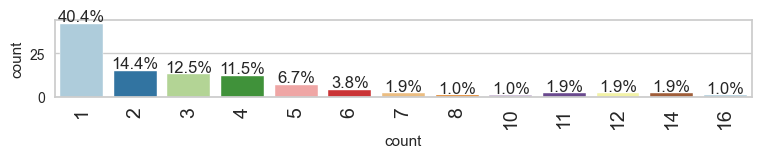

In [ ]:
labeled_barplot(df_GICS_sorted_to_df.sort_values(by=['count']), feature='count', perc=True, figsize=(9,1))

###### df.sample(1)

In [ ]:
df.sample(1)

Ticker Symbol       Security  GICS Sector         GICS Sub Industry   
91           DHR  Danaher Corp.  Industrials  Industrial Conglomerates  \

    Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   
91      70.416985      8.924595    1.191466   14          13    -2214800000  \

    Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio   
91  3357400000                4.81                   698004158.0  14.639706  \

    P/B Ratio  
91  -13.75923

###### end of section: df.sample(1)

###### Create df: To order companies from highest to lowest by count of companies in each GICS Sub Industry:

1. create a DataFrame from df which has:
2. - count of companies in each GICS Sub Industry
3.     - order from highest to lowest count
4. - plot labeled_barplot of the above

In [ ]:
df_3=df.copy()
df_3.head(1) # DataFrame

Ticker Symbol                 Security  GICS Sector GICS Sub Industry   
0           AAL  American Airlines Group  Industrials          Airlines  \

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   
0      42.349998      9.999995    1.687151  135          51     -604000000  \

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio   
0  7610000000               11.39                   668129938.5   3.718174  \

   P/B Ratio  
0  -8.784219

Reference: [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [ ]:
lookup_table=df_3['GICS Sub Industry'].value_counts()

In [ ]:
lookup_table.head(4)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Name: count, dtype: int64

In [ ]:
# from def labeled_barplot(df, feature, perc=False, n=None)
# use:
# sns.countplot
# plt.show()
def labeled_barplot_2(df, feature, perc=False, n=None):
    
    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    
    sns.countplot(data=df_3, x='GICS Sub Industry', palette="Paired", order=df_3['GICS Sub Industry'].value_counts().index)
    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage


    plt.show()


want to use labeled_barplot_2() function to plot a barplot,
whereby the lookup_table is consulted
to get the order of the bars in the barplot [Deprecated]

TabNine and GitHub Copilot assisted in figuring out how to order labeled barplot bars by count of companies in each 'GCIS Sub Industry' Subsector.

In [ ]:
df_3['GICS Sub Industry'].value_counts().index[:10].sort_values()

Index(['Banks', 'Diversified Financial Services', 'Electric Utilities',
       'Health Care Equipment', 'Industrial Conglomerates',
       'Internet Software & Services', 'MultiUtilities',
       'Oil & Gas Exploration & Production', 'Property & Casualty Insurance',
       'REITs'],
      dtype='object', name='GICS Sub Industry')

In [ ]:
df_3['GICS Sub Industry']

0                          Airlines
1                   Pharmaceuticals
2             Health Care Equipment
3              Application Software
4                    Semiconductors
                   ...             
335    Internet Software & Services
336                     Restaurants
337           Health Care Equipment
338                  Regional Banks
339                 Pharmaceuticals
Name: GICS Sub Industry, Length: 340, dtype: object

###### End of Section: Create df: To order companies from highest to lowest by count of companies in each GICS Sub Industry

###### failed to make descending order labeled_barplot:

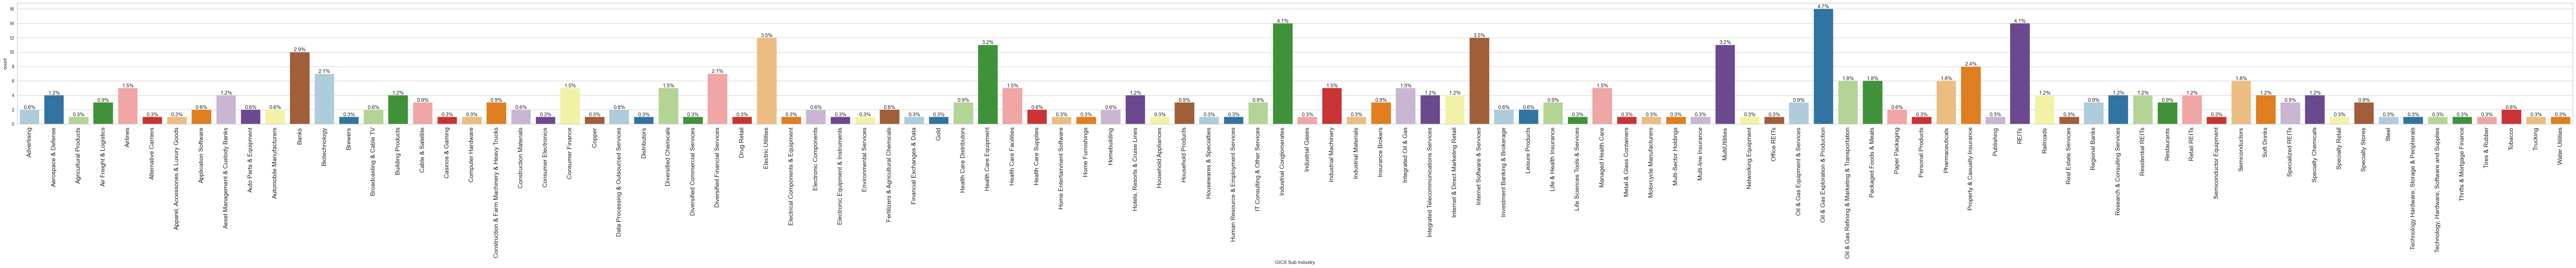

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

###### end of section: failed to make descending order labeled_barplot:

###### Prep for ChatGPT3 support request:

In [ ]:
type(sub_ind_order_counts)

pandas.core.series.Series

###### end of section: Prep for ChatGPT3 support request:

###### ChatGPT3 attempt 1:


Q/ I was wondering om python: how to use sns.countplot on df to plot in descending order based not on a feature directly of the df but on counts of unque value in that feature

A/ You can use the value_counts() method in Pandas to count the number of occurrences of each unique value in the column of interest, and then use that to sort the order of the bars in your Seaborn countplot.

Here's an example of how to do it:

```
df = pd.DataFrame({
    'fruit': ['apple', 'banana', 'apple', 'orange', 'banana', 'banana', 'kiwi']
})

# Count the number of occurrences of each unique value in the 'fruit' column
fruit_counts = df['fruit'].value_counts()

# Sort the order of the bars in the countplot based on the counts of each unique value
sns.countplot(x='fruit', data=df, order=fruit_counts.index)
```

###### ChatGPT3 attempt 2: Text:


##### ChatGPT3 response (adapted):

step 0: labeled_barplot will be modified so that it can receive a parameter 'sort_by_count' to change the way the countplot is ordered

- If sort_by_count is True, then the countplot should be ordered by the descending count of each category. Otherwise, the countplot should be ordered by alphabetical order.

step 2: The modified function labeled_barplot based on sns.countplot is as follows:

###### ChatGPT3 attempt 2: prep Code for adapted labeled_barplot_6:

In [ ]:
def labeled_barplot_6(df, feature, perc=False, n=None, sort_by_count=False):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    sort_by_count: whether to sort the categories by count (default is False)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    if sort_by_count:
        ax = sns.countplot(
            data=df,
            x=feature,
            palette="Paired",
            order=df[feature].value_counts().sort_values(ascending=False).index[:n],
        )
    else:
        ax = sns.countplot(
            data=df,
            x=feature,
            palette="Paired",
            order=df[feature].sort_values().unique()[:n],
        )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category

###### end of section: ChatGPT3 attempt 2: Code for adapted labeled_barplot_6.

###### [Solution] ordered Chart with x-axis labeled by GICS Sub Industry:

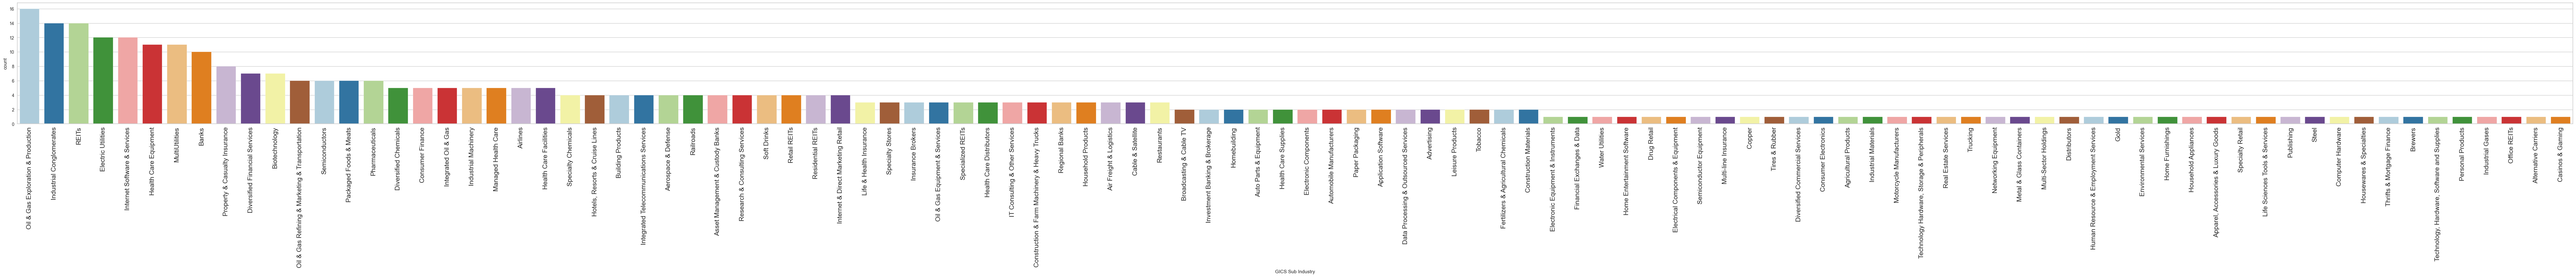

In [ ]:
labeled_barplot_6(df, 'GICS Sub Industry', perc=True, n=None, sort_by_count=True)
# where n is the number of sub sectors to display on the countplot

###### end of section: [Solution] ordered Chart with x-axis labeled by GICS Sub Industry.

---

###### debug string value error:

In [ ]:
# df.info()
df["Security"].head(1)

0    American Airlines Group
Name: Security, dtype: object

### end of labeled_barplots

### Bivariate Analysis

In [ ]:
df_nameless = df.drop(["Security", "Ticker Symbol"], axis=1)

The following steps are adapted from chatgpt3 (Up to (including) create heat map of the reordered pivot table):

Create a pivot table, with indexes for 2 naming columns
Ticker Name and Security.

chatgpt3: use pairplot and scatterplot:

estimated time for sns.pairplot: ~26.1 - 32.8 s

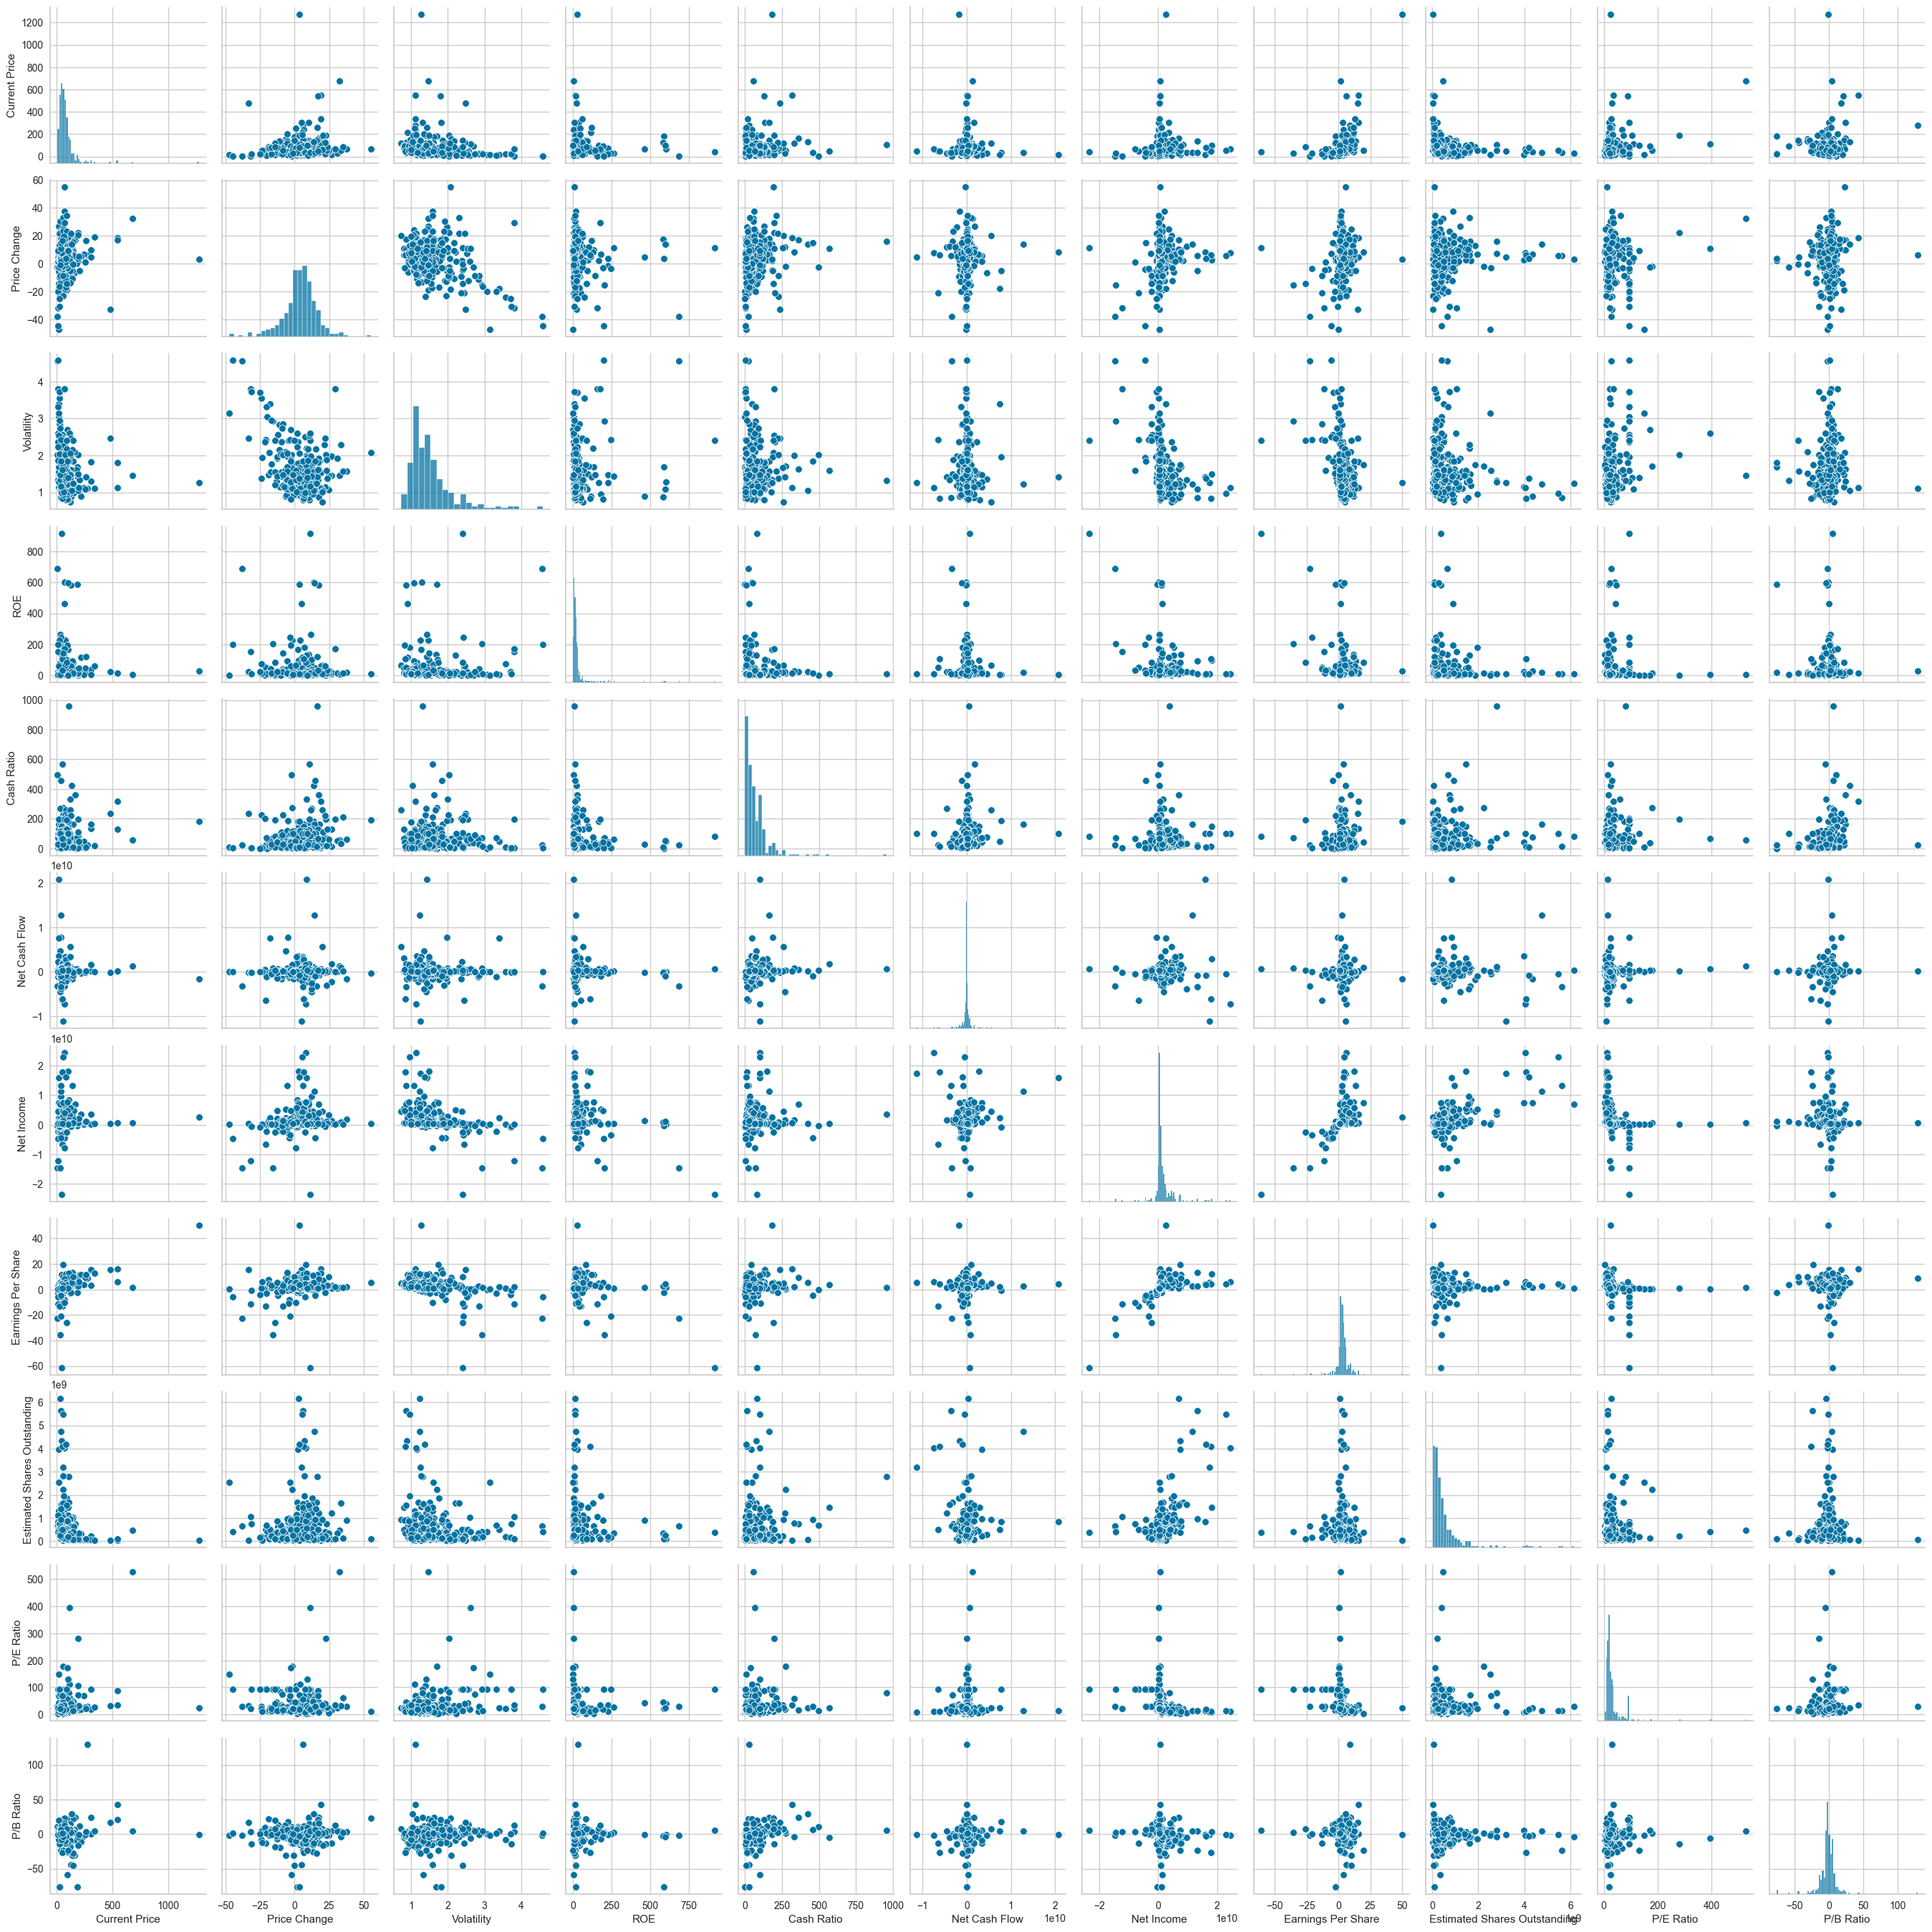

In [ ]:
sns.pairplot(df)

- [stackoverflow | nested loop, counters 1 apart](https://stackoverflow.com/questions/56929931/how-to-run-a-nested-loop-in-python-inside-list-such-that-the-outer-loop-starts-f)

- [Towards DataScience | Quadrant Analysis](https://towardsdatascience.com/how-to-perform-a-quadrant-analysis-in-python-9f84d36f8a24) "A Quadrant chart is ... a scatter plot ... divided into 4 sections / quadrants"

### Create a pivot table of the DataFrame, with Name1 and Name2 as index, Category1 and Category2 as columns, and Value as the values:

```
pivot = df.pivot_table(values='Value', index=['Name1', 'Name2'], columns=['Category1', 'Category2'], fill_value=0)
```


`sel_cols = [c for c in df.columns if df[c].dtype in ['object', 'datetime64[ns]']]`
[sparkbyexample | select columns by type](https://sparkbyexamples.com/pandas/pandas-get-list-of-dataframe-columns-based-on-data-type/#:~:text=Using%20DateFrame.,based%20on%20the%20data%20type.&text=In%20case%20if%20you%20wanted,based%20on%20the%20data%20type.&text=Alternatively%2C%20if%20you%20are%20using,column%20names%20by%20data%20type.)

In [ ]:
# list comprehensions per chatgpt3
idx_cols=[c for c in df.columns if df[c].dtype in ['object']] # GitHub Copilot
valu_cols=[c for c in df.columns if df[c].dtype in ['float64', 'int64']] # GitHub Copilot, Tabnine AI

In [ ]:
pivot = df.pivot_table(values=valu_cols, index=idx_cols, aggfunc='mean') # GitHub Copilot, Tabnine AI



### Compute the pairwise distances between the rows of the pivot table:

```
row_dist = pd.DataFrame(squareform(pdist(pivot, metric='euclidean')), columns=pivot.index, index=pivot.index)
```


In [ ]:
# NameError: name 'squareform' is not defined # ChatgGPT3
# from scipy.spatial.distance import pdist, squareform
row_dist=pd.DataFrame(squareform(pdist(pivot, metric='euclidean')), columns=pivot.index, index=pivot.index) # GitHub Copilot, Tabnine AI, ChatGPT3


### Compute the linkage matrix using the distances:

```
row_clusters = linkage(row_dist, method='complete')
```


In [ ]:
row_clusters = linkage(row_dist, method='complete')


Create the dendrogram of the clusters:

```
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
```


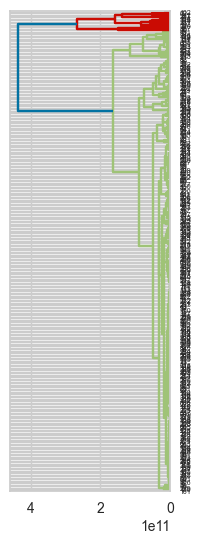

In [ ]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')


### Reorder the pivot table according to the clustering:

```
df_rowclust = pivot.iloc[row_dendr['leaves']]
```


In [ ]:
df_rowclust = pivot.iloc[row_dendr['leaves']]


### Create the heatmap of the reordered pivot table:

```
sns.heatmap(df_rowclust, cmap='RdBu_r')
```

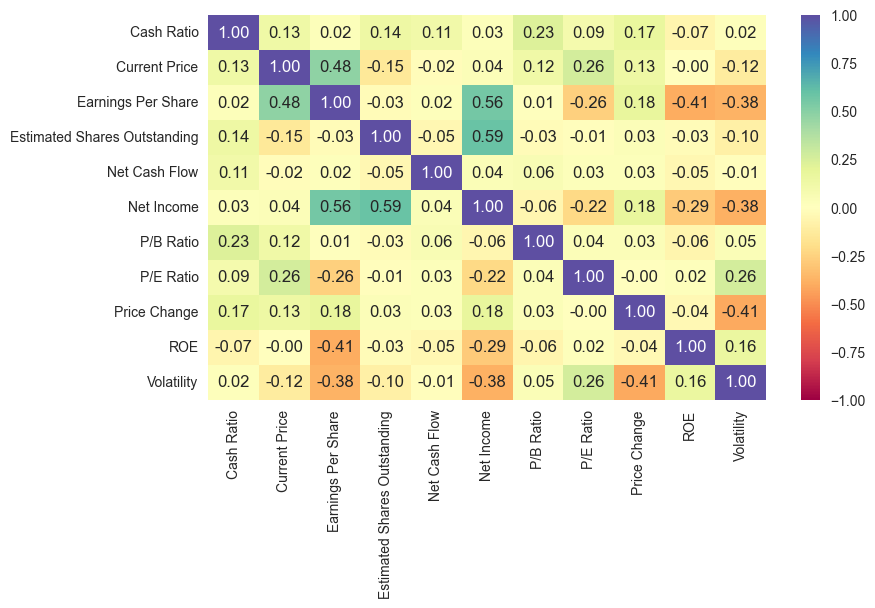

In [ ]:
plt.figure(figsize=(9, 5))
sns.heatmap(
    df_rowclust.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Positive Correlations:

From the above analysis, in which a heatmap was created from a dataframe which was created from reordering Ticker Name, Security, GICS Sector, and GICS Sub Industry: (GitHub Copilot assisted.)

Estimated Shares Outstanding and P/E Ratio are not highly correlated. (although GitHub Copilot suggested they would be.)

("Highly" is used relatiely here, as the correlations are not extremely high for any variable pair.)

Net Income is highly correlated to Earnings Per Share, and Estimated Shares Outstanding. (56%, 59%, respectively)

Earnings per share is also highly correlated to Current Price. (48%)

----------



### Negative Correlations:

Puzzlingly, from this heatmap: if you get good Earnings per Share you would expect a poor Return on Equity (ROE) ( -41%).
- One way to explain this maybe that if the particular stock you are analyzing is a high growth stock, then you would expect a low ROE, as the company is reinvesting its profits into growth. (This is a common strategy for high growth companies, as they are trying to grow their business as fast as possible, and they are not interested in paying dividends to shareholders, as they are trying to reinvest their profits into growth.) (From GitHub Copilot.)
- Another explanation might be that the company is not profitable, and is not paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A third explanation might be that the company is not profitable, and is paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A fourth explanation might be that the company is profitable, and is paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A fifth explanation might be that the company is profitable, and is not paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- Case 6: The company is profitable, and is paying dividends to shareholders, and is not reinvesting its profits into growth. (From GitHub Copilot.)
- Case 7: The company is profitable, and is not paying dividends to shareholders, and is not reinvesting its profits into growth. (From GitHub Copilot.)
To put these previous 4 points into a 2 x 2 matrix with the 2 axes being: "Is the company profitable?" and "Is the company reinvesting its profits into growth?", we get the following matrix:<br>
| case | profitable | reinvesting profits into growth | paying dividend  | case | issue                                                                    |<br>
| ---- | ---------- | ------------------------------- | ---------------  | ---- | -----                                                                    |<br>
|  1   | yes        | yes                             | y/n              |  1   | N/A                                                                      |<br>
|  2   | no         | yes                             | no               |  2   | no profits to reinvest in growth                                         |<br>
|  3   | no         | yes                             | yes              |  3   | don't dividends get paid out of profits? (Also reinvesting (no) profits) |<br>
|  4   | yes        |                                 |                  |  4   |                                                                          |<br>
The above matrix can be used to explain the negative correlation between ROE and Earnings per Share. (From GitHub Copilot.)


note: Excel file heatmap_insights_anaysis.xlsx must be open for load() from xlwings library to run

#### Read in data from Excel:

In [ ]:
# loads from excel using xlwings
# load()

In [ ]:
pd.read_excel('../data/heatmap_insights_analysis.xlsx')

case profitable reinvesting profits into growth paying dividend   case.1   
0     1          y                               y              y/n       1  \
1     2          n                               y                n       2   
2     3          n                               y                y       3   
3     4          y                               y                y       4   
4     5          y                               y                n       5   
5     6          y                               n                y       6   
6     7          y                               n                n       7   
7     8        NaN                             NaN              NaN       8   

                                               issue  
0                                                NaN  
1                   no profits to reinvest in growth  
2  don't dividends get paid out of profits? (Also...  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                NaN  
7                                                NaN

### Next steps in Bivariate Analysis:

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

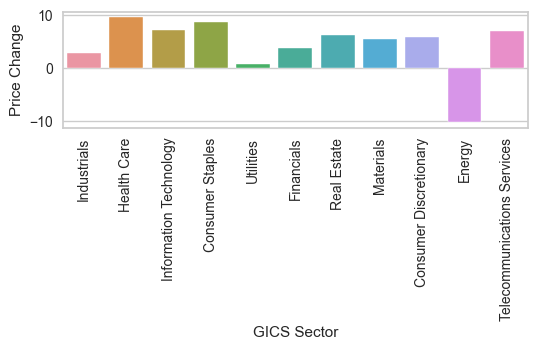

In [ ]:
plt.figure(figsize=(6, 1.5))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False) ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### Upon inspection of the above barplot:

- Over the period of this analysis, the Energy Sector experienced a negative Price Change.
- All other industrial sectors had positive price changes over the period.

##### **Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

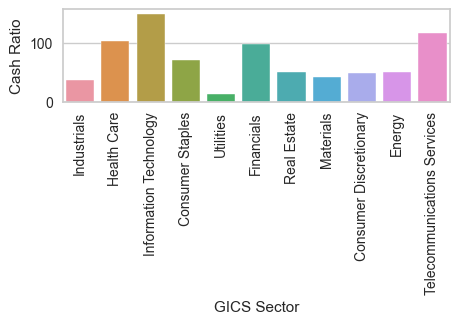

In [ ]:
plt.figure(figsize=(5,1.2))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### From the above barplot of GICS Sector versus Cash Ratio (for the 11 GICS Sectors shown on the X-axis):

- The highest Cash Ratio was in Information Technology (at approximately 150).
- The next highest Cash Ratio was in Telecommunications Service (at just below 120).
- The third highest Cash Ratio was in Health Care (at just above 100).
- The fourth highest Cash Ratio was in Financials (at just below 100).
- The fifth highest Cash Ratio (significantly lower) was Consumer Staples (at approximately 70).
- In contrast, (a few ranks below those mentioned above, thus breaking the sequence) Consumer Discretionary Cash Ratio was around 50, on par with Energy and Real Estate for Ranks 6, 7 and 8.
- Ranks 9, 10 and 11 are: Matrials, Industrials and Utilities to round out the Cash Ratio Rankings per GICS Sector.


------------------------------

### Financial Terminology

### End of Financial Terminology Section

------------------------------
------------------------------

### P/E Ratio versus GICS Sector barplot

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

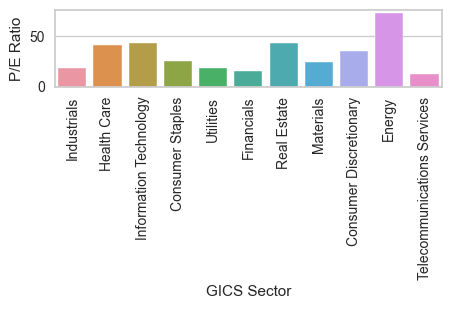

In [ ]:
plt.figure(figsize=(5,1))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### From the above barplot:

- Energy had the highest P/E Ratio at over 70.
- The next highest 3 sectors were close in P/E Ratio (just above 40, and barely over half that of Energy ):
    - They were Information Technology (2nd), followed by
    - Real Estate (3rd), and
    - Health Care (4th)
- The 5th highest was Consumer Discretionary at around 35.
- The 6th highest was Consumer Staples at around 25.
- The 7th highest was Materials also around 25.
- The next 2 sectors came in at just under 20 for P/E Ratio:
    - They were Industrials, and
    - Utilities
- The 10th highest was Financials at just over 15
- The 11th highest was Telecommunications Services at just over 10.

### End of P/E Ratio versus GICS Section barplot

------------------------------

## Business definitions and theory

[P/E Ratio | INVESTING  FUNDAMENTAL ANALYSIS](https://www.investopedia.com/terms/p/price-earningsratio.asp)

###### P/E Ratio - Price-to-Earnings Ratio Formula, Meaning, and Examples:

- The price-to-earnings ratio is the ratio for valuing a company that measures its current share price relative to its earnings per share (EPS). 

- The price-to-earnings ratio is also sometimes known as the:
    - **price multiple** or the 
    - **earnings multiple**.

- P/E ratios are used by:
    - investors and
    - analysts
- to determine the relative value of a company's shares
- in an **apples-to-apples comparison**. 

- It can also be used to compare:
    - a company against its 
    - **own historical record** or to
- compare:
    - **aggregate markets** against: 
        - one another or
        - over time.

P/E may be estimated on a:
- trailing (backward-looking) or
- forward (projected) basis.

potentially:
- high P/E: stock overvalued, or investors expecting high future growth rates.

**Companies that have no earnings or that are losing money do not have a P/E ratio because there is nothing to put in the denominator.** 

Two kinds of P/E ratios—forward and trailing P/E—are used in practice.

A P/E ratio holds:
- the most value to an analyst 
- when compared against:
    - similar companies in the 
    - same industry 
    
        or
    - for a single company across a
    - period of time.


P/E Ratio= Earnings per share / Market value per share
​

To determine the P/E value, one must simply divide the current stock price by the earnings per share (EPS), that is:


P/E ratio = current stock price / earnings per share (EPS)


The current stock price (P) can be found simply by plugging a stock’s ticker symbol into any finance website, and although this concrete value reflects what investors must currently pay for a stock, the EPS is a slightly more nebulous figure.

EPS comes in two main varieties. TTM is a Wall Street acronym for "trailing 12 months". This number signals the company's performance over the past 12 months. The second type of EPS is found in a company's earnings release, which often provides EPS guidance. This is the company's best-educated guess of what it expects to earn in the future. These different versions of EPS form the basis of trailing and forward P/E, respectively.

The P/E ratio helps one determine whether a stock is overvalued or undervalued. A company's P/E can also be benchmarked against other stocks in the same industry or against the broader market, such as the S&P 500 Index.

Sometimes, analysts are interested in long-term valuation trends and consider the P/E 10 or P/E 30 measures, which average the past 10 or past 30 years of earnings, respectively. These measures are often used when trying to gauge the overall value of a stock index, such as the S&P 500, because these longer-term measures can compensate for changes in the business cycle.

The P/E ratio of the S&P 500 has fluctuated from a low of around 5x (in 1917) to over 120x (in 2009 right before the financial crisis). The long-term average P/E for the S&P 500 is around 16x, meaning that the stocks that make up the index collectively command a premium 16 times greater than their weighted average earnings.

###### P/E for appraising projected EPS:
Analysts and investors review a company's P/E ratio when they determine if the share price accurately represents the projected earnings per share.

Some investors prefer to look at the trailing P/E because they don't trust another individual’s earnings estimates. But the trailing P/E also has its share of shortcomings—namely, that a company’s past performance doesn’t signal future behavior.

Investors should thus commit money based on future earnings power, not the past. 

[P/E Ratio | INVESTING  FUNDAMENTAL ANALYSIS](https://www.investopedia.com/terms/p/price-earningsratio.asp)

---

##### Earnings Power

Earnings power is a figure that telegraphs a business's 
- ability to generate profits over the long haul,
    - assuming all current operational conditions generally remain constant. 
Equity analysts ritually assess a company’s earning power when issuing buy and sell recommendations 
- to best determine if a company’s stock is worth investing in.

###### Understanding Earnings Power:
Earnings power factors in several elements, including a company’s:
- total assets, 
plus
- recent growth or loss trends.

Earning power likewise considers metrics such as a company's:
- return on assets (ROA),
    - which is the ability to generate profit from its assets, as well as the 
- return on equity (ROE),
    - which is a measurement of a stock’s financial performance.

Furthermore, some companies determine earnings power based on:
- dividend yields 
    - associated with specific securities.


###### Earnings Power Metrics for Determining Current Business Health

A company can cultivate a keen insight into its earnings power by examining earnings before interest and tax (EBIT). 

- This calculation examines a company’s earnings power based on:
    - continuous operations, as well as
    - cash flow.

By generally excluding any and all irregular income or expenses,
- EBIT provides a reliable snapshot 
    - of a company’s **liquidity profile**,its ability to
    - meet debt obligations, and its 
    - overall health.




(1)

(1) [CORPORATE FINANCE > CORPORATE FINANCE BASICS > Earnings Power | Investopedia](https://www.investopedia.com/terms/e/earnings-power.asp)

-----------------------

#### Earnings Before Interest and Taxes (EBIT)

The following excerpt is adapted from [CORPORATE FINANCE > FINANCIAL STATEMENTS > Earnings Before Interest and Taxes (EBIT) | Investopedia](https://www.investopedia.com/terms/e/ebit.asp)

##### Earnings Before Interest and Taxes (EBIT): How to Calculate with Example:

###### What Is Earnings Before Interest and Taxes (EBIT)?:

Earnings before interest and taxes (EBIT) is an indicator of a company's profitability.

EBIT can be calculated as revenue minus expenses excluding tax and interest. 

EBIT is also referred to as:
- operating earnings,
- operating profit, and
- profit before interest and taxes.

[CORPORATE FINANCE > FINANCIAL STATEMENTS > Earnings Before Interest and Taxes (EBIT) | Investopedia](https://www.investopedia.com/terms/e/ebit.asp)

--------------------------

#### Revenue

###### What is Revenue? Definition, Formula, Calculation, and Example:

Revenue is the money generated from normal business operations, calculated as the average sales price times the number of units sold. 

Revenue = (average sales price) * (number of units sold)

top line (or gross income) figure from which costs are subtracted to determine net income.

Revenue is also known as sales on the income statement.

[CORPORATE FINANCE > FINANCIAL STATEMENTS > Revenue | Investopedia](https://www.investopedia.com/terms/r/revenue.asp)

------------------------------

#### Income Statement

#### Income Statement: How to Read and Use It [Updated March 27, 2023]

##### What you need to know about this essential financial statement

###### What Is an Income Statement?

1. An income statement is 1 of the 3 important financial statements used for reporting a company’s financial performance over a specific accounting period. 

The other two key statements are:

2. the balance sheet and 

3. the cash flow statement.

[CORPORATE FINANCE > FINANCIAL STATEMENTS > Income Statement](https://www.investopedia.com/terms/i/incomestatement.asp)

------------------------------

## Financial Statements

The following excerpt is adapted from: [CORPORATE FINANCE > FINANCIAL STATEMENTS > Financial Statements | Investopedia](https://www.investopedia.com/terms/f/financial-statements.asp)

### Financial Statements: List of Types and How to Read Them [Updated March 21, 2023]

#### What Are Financial Statements?

Financial statements convey business activities and financial performance of a company.

Financial statements are often audited to ensure accuracy.

Primary financial statements include:
- the balance sheet,
- income statement, 
- statement of cash flow, and
- statement of changes in equity. 

- balance sheet: provides an overview of assets, liabilities, and shareholders' equity as a snapshot in time.
- income statement: primarily focuses on a company’s revenues and expenses during a particular period. Once expenses are subtracted from revenues, the statement produces a company's profit figure called net income.
- cash flow statement (CFS): measures how well a company generates cash to pay its debt obligations, fund its operating expenses, and fund investments.
- statement of changes in equity: records how profits are retained within a company for future growth / distributed to external parties.

**Investors and financial analysts** rely on financial data to analyze the performance of a company and
- **make predictions about the future direction of the company's stock price**. 

One of the most important resources of reliable and audited financial data is the **annual report**, which contains the firm's financial statements.

The 3 major financial statement reports are:
1. the **balance sheet**,
2. **income statement**, and
3. statement of **cash flows**.

##### Balance Sheet:
The balance sheet 
- provides an overview of a company's:
    - assets, 
    - liabilities, and
    - shareholders' equity 

The date at the top of the balance sheet tells you:
- when the snapshot was taken,
    - which is generally: the end of the reporting period. 
    
Below is a breakdown of the items in a balance sheet.

###### Assets
- Cash and cash equivalents are: liquid assets, including Treasury bills and certificates of deposit.
- Accounts receivables are money owed to the company by its customers for the sale of its product and service.
- Inventory is the goods on hand, intended for sale as a course of business. May include finished goods, work in progress, or raw materials on hand to be worked.
- Prepaid expenses are costs prepaid in advance of when they are due. Recorded as an asset because their value has not yet been recognized; should the benefit not be recognized, the company would theoretically be due a refund.
- Property, plant, and equipment are capital assets owned by a company for its long-term benefit. Includes buildings used for manufacturing or heavy machinery used for processing raw materials.
- Investments are assets held for speculative future growth. These aren't used in operations; they are simply held for capital appreciation.

Trademarks, patents, goodwill, and other intangible assets can't physically be touched but have future economic (and often long-term benefits) for the company.

###### Liabilities
- **Accounts payable** are the bills due as part of the normal course of operations of a business. This includes: utility bills, rent invoices, and obligations to buy raw materials.
- **Wages payable** are payments due to staff for time worked.
- **Notes payable** are recorded debt instruments that record official debt agreements including the **payment schedule and amount**.
- **Dividends payable** are dividends that have been declared to be **awarded to shareholders** but have not yet been paid.
- **Long-term debt** can include a variety of obligations including sinking bond funds, mortgages, or other loans that are due in their entirety in longer than one year. Note that the **short-term portion of this debt** is recorded as a **current liability**.

###### Shareholders' Equity

Shareholders' equity is a company's total assets minus its total liabilities. Shareholders' equity (also known as stockholders' equity) represents the amount of money that would be returned to shareholders if all of the assets were liquidated and all of the company's debt was paid off.
Retained earnings are part of shareholders' equity and are the amount of net earnings that were not paid to shareholders as dividends. 

##### Example of a Balance Sheet 
Below is a portion of ExxonMobil Corporation's (XOM) balance sheet for fiscal year 2021, reported as of Dec. 31, 2021.

Total assets: $338.9 billion.

Total liabilities: $163.2 billion.

Total equity: $175.7 billion.

Total liabilities + equity = $338.9 billion = total assets for the period.

[Investor Relations | Earnings Call | Exxonmobil](https://investor.exxonmobil.com/)


see next cell for xlwings library method load() from excel sheet with same Balance sheet referenced in (1) but taken from (2) for ease of formatting
(2)

(1)

(1) [CORPORATE FINANCE > FINANCIAL STATEMENTS > Financial Statements | Investopedia](https://www.investopedia.com/terms/f/financial-statements.asp)

(2) [2021, UNITED STATES, SECURITIES AND EXCHANGE COMMISSION, WASHINGTON, D.C. 20549 | FORM 10-K ☑ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 | For the fiscal year ended December 31, 2021 | Exxon Mobil Corporation](https://www.sec.gov/ix?doc=/Archives/edgar/data/0000034088/000003408822000011/xom-20211231.htm) (see page 72 for Balance Sheet on December 31, 2021)

---

##### Exxon 2021 Balance Sheet Example

- Try reading DataFrame in using pandas.
- Debug pandas pd.read_excel() method.
- Issue: 15 Columns
- Resave to Local as was saved to OneDrive
- Rerun pd.read_excel()

Note: from earlier: these values are in millions of USD.

- Excel: Cut top row in Sheet1, Save
- Rerun:
    - `Exxon2021=pd.read_excel('../data/Balance-Sheet-Exxon-Mobil-2021.xlsx')`
    - `Exxon2021`
- Issue Fixed [Resolved]

In [ ]:
# rerun pd.read_excel() and save to variable
Exxon2021=pd.read_excel('../data/Balance-Sheet-Exxon-Mobil-2021.xlsx')

In [ ]:
Exxon2021

Elements  Reference   
0                                              Assets        NaN  \
1                                      Current assets        NaN   
2                           Cash and cash equivalents        NaN   
3                 Notes and accounts receivable - net        6.0   
4                                         Inventories        NaN   
5                 Crude oil, products and merchandise        3.0   
6                              Materials and supplies        NaN   
7                                Other current assets        NaN   
8                                Total current assets        NaN   
9     Investments, advances and long-term receivables        8.0   
10  Property, plant and equipment, at cost, less a...        9.0   
11          Other assets, including intangibles - net        NaN   
12                                       Total assets        NaN   
13                                                NaN        NaN   
14                                        Liabilities        NaN   
15                                Current liabilities        NaN   
16                            Notes and loans payable        6.0   
17           Accounts payable and accrued liabilities        6.0   
18                               Income taxes payable        NaN   
19                          Total current liabilities        NaN   
20                                     Long-term debt       14.0   
21                   Postretirement benefits reserves       17.0   
22                    Deferred income tax liabilities       19.0   
23          Long-term obligations to equity companies        NaN   
24                        Other long-term obligations        NaN   
25                                  Total liabilities        NaN   
26                                                NaN        NaN   
27                      Commitments and contingencies       16.0   
28                                                NaN        NaN   
29                                             Equity        NaN   
30                     Common stock without par value        NaN   
31  (9,000 million shares authorized, 8,019 millio...        NaN   
32                                Earnings reinvested        NaN   
33             Accumulated other comprehensive income        NaN   
34                      Common stock held in treasury        NaN   
35  (3,780 million shares in 2021 and 3,786 millio...        NaN   
36                         ExxonMobil share of equity        NaN   
37                           Noncontrolling interests        NaN   
38                                       Total equity        NaN   
39                       Total liabilities and equity        NaN   
40                                                NaN        NaN   
41  The information in the Notes to Consolidated F...        NaN   
42                                                 72        NaN   

   December 31, 2021 December 31, 2020  
0                NaN               NaN  
1                NaN               NaN  
2             6,802             4,364   
3            32,383            20,581   
4                NaN               NaN  
5            14,519            14,169   
6             4,261             4,681   
7             1,189             1,098   
8            59,154            44,893   
9            45,195            43,515   
10          216,552           227,553   
11           18,022            16,789   
12          338,923           332,750   
13               NaN               NaN  
14               NaN               NaN  
15               NaN               NaN  
16            4,276            20,458   
17           50,766            35,221   
18            1,601               684   
19           56,643            56,363   
20           43,428            47,182   
21           18,430            22,415   
22           20,165            18,165   
23            2,857             3,253   
24           21,717        

##### End of Exxon 2021 Balance Sheet Example

## end of Financial Statements Section

---------------------------------------
---------------------------------------

## end of Business Definitions and Theory section

-----------------------------------
-----------------------------------

### Volatility versus GICS Sector barplot

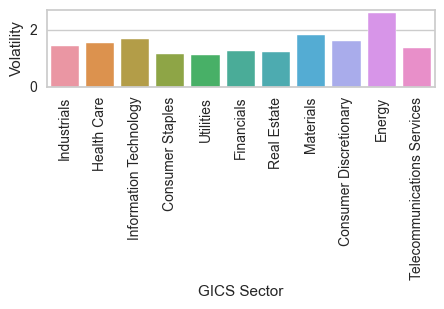

In [ ]:
plt.figure(figsize=(5,1))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

### end of section on Volatility versus GICS Sector barplot

### Results:

#### Volatility versus GICS Sector:
From the Above barplot of Volatility versus GICS Sector:
- Energy had, by far, the highest volatility at over 2.5.
- Materials had the 2nd highest volatility at around just over 1.75
- Information Technology, Consumer Discretionary, and Health Care had the 3rd, 4th and 5th highest volatility scores, respectively, all over 1.5
- Industrials had the 6th highest volatility at almost 1.5.
- Telecommunications Services had the 7th highest volatility at around over 1.25.
- Financials had the 8th highest volatility at around 1.25.
- Real Estate had the 9th highest volatility of around just under 1.25.
- Consumer Staples and Utilities had the 10th and 11th highest volatility scores, respectively, both just over 1.0.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

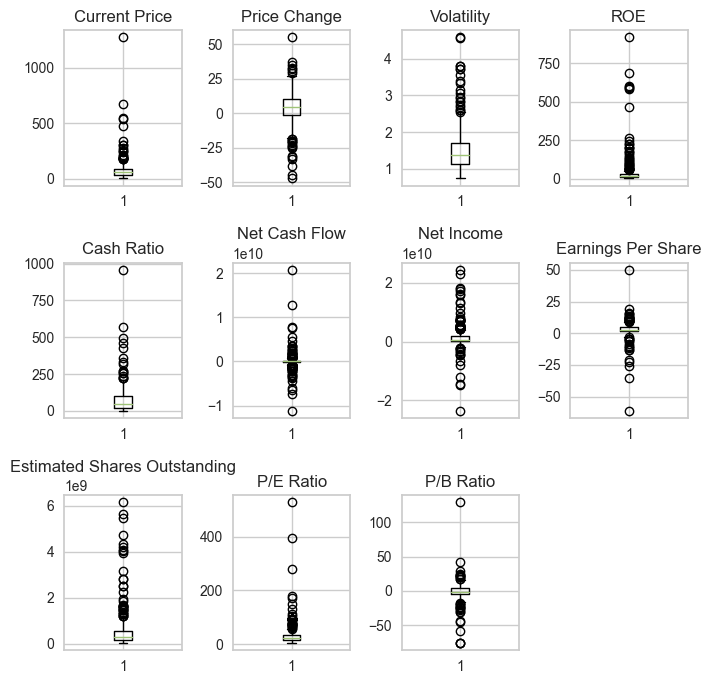

In [ ]:
plt.figure(figsize=(7, 7))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

- class 
    - sklearn.preprocessing.StandardScaler(

        *,

        copy=True, 

        with_mean=True, 

        with_std=True
        
        )

- Standardize features by removing the mean and scaling to unit variance.

- The standard score of a sample x is calculated as:


```
        z = (x - u) / s
```

- where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using:
        - transform.

-----



[sklearn.preprocessing.StandardScaler | transform(X, copy=None)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform)

`transform(X, copy=None)`

Perform standardization by centering and scaling.

##### Parameters:

X:{array-like, sparse matrix of shape (n_samples, n_features)}

The data used to scale along the features axis.

copy : bool, default=None
Copy the input X or not.

##### Returns:

X_tr : {ndarray, sparse matrix} of shape (n_samples, n_features)

Transformed array.

-----


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.



-------------------

[sklearn.preprocessing.StandardScaler.transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform)

[Compressed Sparse formats CSR and CSC in Python](https://rrrjin.medium.com/compressed-sparse-formats-csr-and-csc-in-python-e7b86da7c58f#:~:text=Compressed%20sparse%20row%20(CSR)%20and,with%20a%20column%2Dmajor%20order.)

**Compressed sparse row (CSR)** and

**compressed sparse column (CSC)** 

- are widely known and most used formats of sparse data structures. 

- Mainly, they are used for write-once-read-many tasks.


**Compressed Sparse Column (CSC)** format is almost identical,
- except that values are indexed first 
    - by column 
        - with a column-major order. 

Usually, the **CSC** is used when there are:
- more rows than columns. 
((narrow))

On the contrary,:
- the **CSR** works better for a ‘wide’ format. So, here is an example of CSR.



- [Compressed Sparse formats CSR and CSC in Python](https://rrrjin.medium.com/compressed-sparse-formats-csr-and-csc-in-python-e7b86da7c58f#:~:text=Compressed%20sparse%20row%20(CSR)%20and,with%20a%20column%2Dmajor%20order.)


Internally, CSR is based on three NumPy arrays:

- `data` is an array of corresponding nonzero values
- `indices` is array of column indices
- `indptr` points to row starts in data and indices
~ length of `indptr` is:
    - number of rows + 1,
- last item in indptr = number of nonvalues = length of both `data` and `indices`

~ nonzero items of the i-th row are located data[indptr[i]:indptr[i+1]] with column indices indices[indptr[i]:indptr[i+1]]

If you’re new to the SciPy sparse matrix game, you might find yourself stymied by the ‘indptr’ array, which can be used to instantiate a csc_matrix or a csr_matrix object. Here I give an example to explain how to compute matrix through NumPy arrays.



[6.3. Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)
The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.



[6.3.1. Standardization, or mean removal and variance scaling](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

```

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

```

[6.3.1. Standardization, or mean removal and variance scaling | Continued | Sklearn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

```
>>> from sklearn import preprocessing
>>> import numpy as np
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> scaler
StandardScaler()

>>> scaler.mean_
array([1. ..., 0. ..., 0.33...])

>>> scaler.scale_
array([0.81..., 0.81..., 1.24...])

```


#### Attributes:

##### scale_ndarray of shape (n_features,) or None

Per feature relative scaling of the data to achieve zero mean and unit variance. Generally this is calculated using `np.sqrt(var_)`. If a variance is zero, we can’t achieve unit variance, and the data is left as-is, giving a scaling factor of 1. 

`scale_` is equal to `None` when `with_std=False`.



In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

This line of code creates a copy of the subset_scaled_df DataFrame and assigns it to the variable k_means_df. The purpose of this is to prepare the data for clustering with the KMeans algorithm (ChatGPT3) :

In [ ]:
k_means_df = subset_scaled_df.copy()

References: [Silhouette Method — Better than Elbow Method to find Optimal Clusters](https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891)

Choose the number of clusters: You can use the elbow method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters. (ChatGPT3)



steps to kmeans:

load

ChatGPT3 steps:

preprocess

number

fit

predict

vusualize

interpret

The key line in the following code is:
```
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )
```
(ChatGPT3)

References:

*Machine Learning and Data Science Blueprints for Finance* by Hariom Tatsat, Sahil Puri, and Brad Lookabaugh (O'Reilly, 2021), 978-1-492-07305-5

[tatsath/fin-ml | fin-ml/Chapter 8 - Unsup. Learning - Clustering/Case Study2 - Portfolio Management - Clustering Investors/](https://github.com/tatsath/fin-ml/tree/master/Chapter%208%20-%20Unsup.%20Learning%20-%20Clustering/Case%20Study2%20-%20Portfolio%20Management%20-%20%20Clustering%20Investors)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


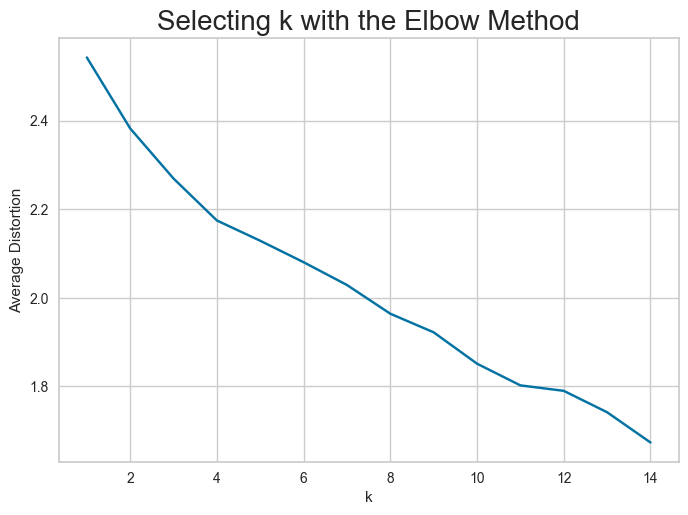

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

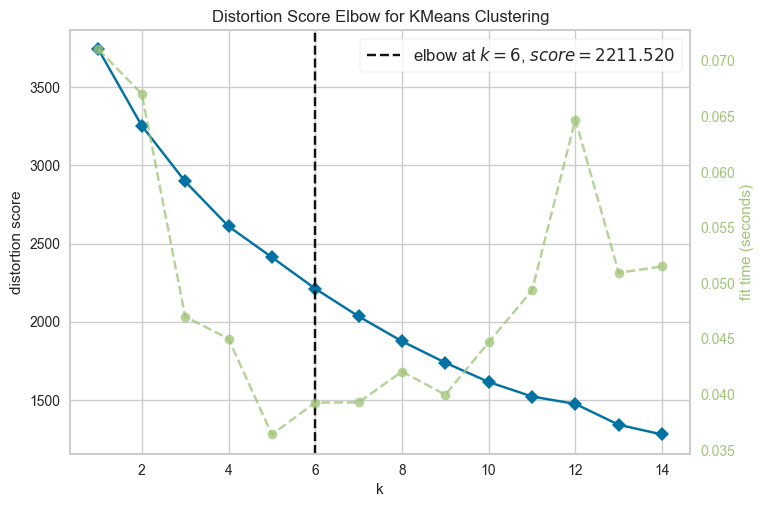

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

from above, try k=14

green = time to fit per k

blue = distortion per k

From above plot:
`the green dotted line represents the time taken for the k-means algorithm to fit the data for each value of k, while the blue line represents the distortion score.`

`The green dotted line may zigzag because the time taken to fit the data can vary for different values of k, depending on the complexity of the data and the hardware used. The blue line, on the other hand, represents the distortion score, which should decrease as the number of clusters increases.`

 (ChatGPT3)

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


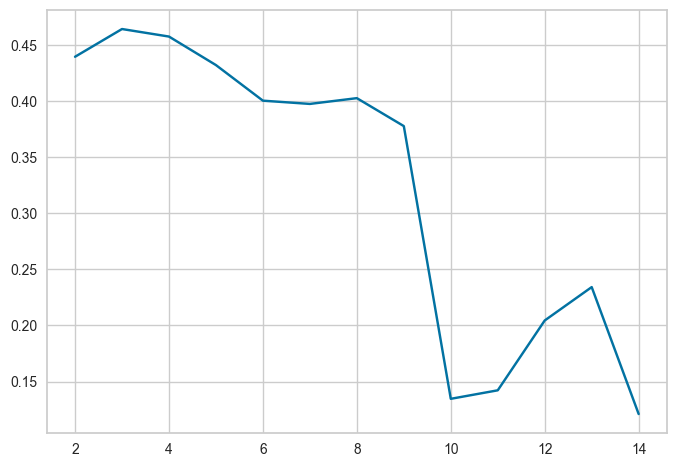

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

The silhouette score is a metric used to evaluate the quality of clustering results, where higher scores indicate better-defined clusters. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly matched to other clusters, while a score of -1 indicates the opposite.

Looking at the silhouette scores you provided, we can see that the highest score is achieved for n_clusters = 3, which has a score of 0.464. This suggests that 3 clusters provide the best separation of the data points into distinct groups.

When the number of clusters is increased beyond 3, the silhouette scores start to decrease, indicating that the clusters become less well-defined and the data points become more scattered. This is particularly evident when the number of clusters is increased beyond 10, where the silhouette scores drop significantly.

Based on these results, we can conclude that 3 clusters may be the optimal number of clusters for this data set, based on the silhouette score metric. However, it's important to note that this is just one metric, and other factors such as domain knowledge and business objectives may also need to be taken into account when deciding on the number of clusters.


(ChatGPT3)

If there is a rapid down spike in the plot of the silhouette score against the number of clusters, it suggests that the clustering solution at that point is significantly worse than the neighboring solutions. This can happen when the clusters are poorly defined or when the data points are scattered and not well-separated.

In your case, the silhouette score plot shows a rapid down spike at 10, which suggests that the clustering solution with 10 clusters is significantly worse than the neighboring solutions. This means that adding more than 10 clusters is not recommended, as the quality of the clustering solution will decrease significantly.

Therefore, it's important to choose the number of clusters based on the silhouette score plot and other evaluation metrics, such as the distortion score or inertia. In your case, since the silhouette score suggests that 3 clusters may be the optimal number and there is a significant drop in score at 10, it may be best to choose 3 or fewer clusters. However, the final decision should depend on your specific problem and the goals of your analysis.

(ChatGPT3)

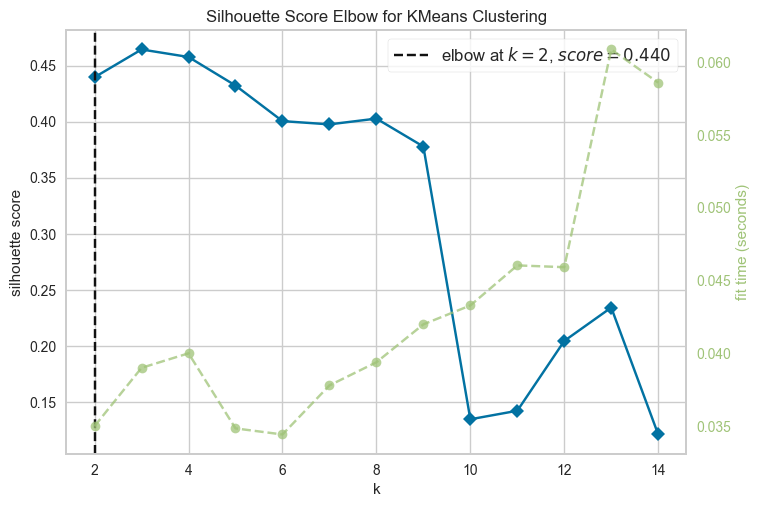

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Because we are only analyzing a small sample of companies traded on the NYSE, the time to compute each cluster is negligible.

Thus whether it took 0.45 seconds to compute clusters with k = 3 clusters or 0.15 seconds to compute k = 5 clusters is irrelevant.

```
The value of the silhouette coefﬁcient is between [-1, 1].
A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
The worst value is -1. Values near 0 denote overlapping clusters.
```

A score of 1 denotes the best possible silhouette score. [K Means Clustering | Method to get most optimal K value](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,The%20worst%20value%20is%20%2D1.)

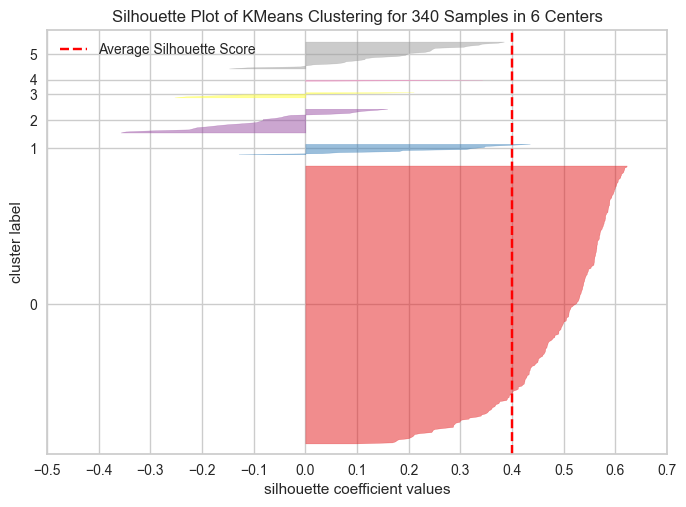

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

Cluster 0 has the greatest Silhouette score at around 0.6.

Clusters 1 and 5 are around the average of 0.4

Clusters 2, 3 and 4 are lower.

Cluster 2 has a negative Silhouette score of -0.35.
This may suggest reanalysis is needed here.

### Creating Final Model

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

python boolean [or](https://www.geeksforgeeks.org/python-or-operator/)

#### Debugging:
- from previous issue [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)
- for debugging current issue: [pandas.DataFrame.to_string](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)

- **Error:** TypeError: unsupported operand type(s) for |: 'str' and 'str'

-----

**Error:** TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [ ]:
df1.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')

In [ ]:
df1_num_cols=[]
df1_obj_cols=[]
for iterable in df.columns:
    if (df1.columns.dtype == 'float64' or 'int64' or 'int32'):
        df1_num_cols.append(iterable)
        # print(df1.columns.dtype == 'float64' or 'int64' or 'int32')
        print(df1.columns.dtype)
        print(df1.columns)
        # print(iterable)
        # print(df1.columns.dtype)
    else:
        df1_obj_cols.append(iterable)

object
Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')
object
Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')
object
Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')
object
Index(['Ticker Symbol

In [ ]:
df1_num_cols

['Ticker Symbol',
 'Security',
 'GICS Sector',
 'GICS Sub Industry',
 'Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
df1_obj_cols

[]

[pandas.DataFrame.to_string](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)
[scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

--------------------

[pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

```
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)
df
                Max Speed
Animal Type
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0
df.groupby(level=0).mean()
        Max Speed
```
Takeaway:
- Use df, setup with index
then groupby.

In [ ]:
df1.head(1)

Ticker Symbol                 Security  GICS Sector GICS Sub Industry   
0           AAL  American Airlines Group  Industrials          Airlines  \

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   
0      42.349998      9.999995    1.687151  135          51     -604000000  \

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio   
0  7610000000               11.39                   668129938.5   3.718174  \

   P/B Ratio  KM_segments  
0  -8.784219            0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

---


---

From: 'notebooks/USL_W2_AdditionalCaseStudy_ProductSegmentation+%281%29+%281%29+%281%29.ipynb':

---

Pandas.mean() TypeError: Could not convert to numeric
https://stackoverflow.com/questions/44522741/pandas-mean-typeerror-could-not-convert-to-numeric

---

Debugging [Resolved]:
Search string: 'groupby keep strings but run mean could not convert to numeric'

`data.groupby('month', as_index=False).agg({"duration": "sum"})` [Use Pandas Groupby to Group and Summarise DataFrames](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

solution: 

groupby all string columns

as follows:

---

but first:

---

Debugging[Resolved]:

search string: `groupby ValueError: 2`

[Pandas groupby throwing up ValueError](https://stackoverflow.com/questions/64039934/pandas-groupby-throwing-up-valueerror)

- [pandas.core.groupby.DataFrameGroupBy.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

Solution:

Remove:

`, as_index=False`

from 

`.groupby()` passed into method call

---

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"])

In [ ]:
df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]).mean()

Current Price   
KM_segments Ticker Symbol Security                  GICS Sector            GICS Sub Industry                                                
0           AAL           American Airlines Group   Industrials            Airlines                                             42.349998  \
            ABBV          AbbVie                    Health Care            Pharmaceuticals                                      59.240002   
            ABT           Abbott Laboratories       Health Care            Health Care Equipment                                44.910000   
            ADM           Archer-Daniels-Midland Co Consumer Staples       Agricultural Products                                36.680000   
            AEE           Ameren Corp               Utilities              MultiUtilities                                       43.230000   
...                                                                                                                                   ...   
5           SE            Spectra Energy Corp.      Energy                 Oil & Gas Refining & Marketing & Transportation      23.940001   
            SWN           Southwestern Energy       Energy                 Oil & Gas Exploration & Production                    7.110000   
            TDC           Teradata Corp.            Information Technology Application Software                                 26.420000   
            WMB           Williams Cos.             Energy                 Oil & Gas Exploration & Production                   25.700001   
            XEC           Cimarex Energy            Energy                 Oil & Gas Exploration & Production                   89.379997   

                                                                                                                            Price Change   
KM_segments Ticker Symbol Security                  GICS Sector            GICS Sub Industry                                               
0           AAL           American Airlines Group   Industrials            Airlines                                             9.999995  \
            ABBV          AbbVie                    Health Care            Pharmaceuticals                                      8.339433   
            ABT           Abbott Laboratories       Health Care            Health Care Equipment                               11.301121   
            ADM           Archer-Daniels-Midland Co Consumer Staples       Agricultural Products                              -12.017268   
            AEE           Ameren Corp               Utilities              MultiUtilities                                       2.174424   
...                                                                                                                                  ...   
5           SE            Spectra Energy Corp.      Energy                 Oil & Gas Refining & Marketing & Transportation     -9.898378   
            SWN           Southwestern Energy       Energy                 Oil & Gas Exploration & Production                 -44.798137   
            TDC           Teradata Corp.            Information Technology Application Software                                -8.833678   
            WMB           Williams Cos.             Energy                 Oil & Gas Exploration & Production                 -30.988186   
            XEC           Cimarex Energy            Energy                 Oil & Gas Exploration & Production                 -14.403372   

                                                                                                                            Volatility   
KM_segments Ticker Symbol Security                  GICS Sector            GICS Sub Industry                                             
0           AAL           American Airlines Group   Industrials            Airlines                                           1.687151  \
            ABBV          AbbVie                    Hea

In [ ]:
km_cluster_profile = df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]).mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"])["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df1["KM_segments"]

0      0
1      0
2      0
3      2
4      2
      ..
335    2
336    0
337    0
338    0
339    0
Name: KM_segments, Length: 340, dtype: int32

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [ ]:
# ChatGPT3:

for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl][["Ticker Symbol", "Security", "GICS Sector"]])
    print()


In cluster 0, the following companies are present:
    Ticker Symbol                   Security             GICS Sector
0             AAL    American Airlines Group             Industrials
1            ABBV                     AbbVie             Health Care
2             ABT        Abbott Laboratories             Health Care
5             ADM  Archer-Daniels-Midland Co        Consumer Staples
7             AEE                Ameren Corp               Utilities
..            ...                        ...                     ...
334           XYL                 Xylem Inc.             Industrials
336           YUM            Yum! Brands Inc  Consumer Discretionary
337           ZBH     Zimmer Biomet Holdings             Health Care
338          ZION              Zions Bancorp              Financials
339           ZTS                     Zoetis             Health Care

[270 rows x 3 columns]

In cluster 2, the following companies are present:
    Ticker Symbol                          Se

#### Analysis of above cluster output by ChatGPT3:
Cluster 0: 270 companies from various sectors, including Industrials, Health Care, Consumer Staples, Utilities, etc.
Cluster 1: 11 companies from various sectors, including Financials, Consumer Discretionary, Health Care, Information Technology, etc.
Cluster 2: 24 companies from various sectors, including Information Technology, Health Care, Consumer Discretionary, etc.
Cluster 3: 6 companies from the Health Care sector.
Cluster 4: 2 companies from the Energy sector.
Cluster 5: 27 companies from various sectors, including Energy, Industrials, Information Technology, etc.

##### Cluster 0: (ChatGPT3):
Industrials, Health Care, Consumer Staples, and Utilities are all typically considered **defensive** sectors. 

This means that they tend to be **less sensitive to economic cycles**
and may offer **more stable returns during periods of economic uncertainty or market volatility**. 

These sectors are also characterized by companies that provide products and services that are **considered essential**, such as healthcare, utilities, and household goods. 

As a result, investors may group these sectors together in a portfolio as a way to diversify their investments and potentially **reduce overall portfolio risk**.

##### Further thoughts on Cluster 0:
- Cluster 0 may be seen as low risk.

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

KM_segments column - contains the cluster numbers and 

GICS Sector column - contains the sector names

The first row shows that there are 33 securities in cluster 0 that belong to the Consumer Discretionary sector, 17 in Consumer Staples, and so on. (ChatGPT3)

Energy appears in nearly all groups, this could be because the companies in the Energy sector have diverse characteristics that could place them in different clusters. (ChatGPT3)

Alternatively, it could also be due to the small number of securities in the Energy sector compared to other sectors. (ChatGPT3)

In [ ]:
# ChatGPT3:
pd.reset_option('display.max_rows')


In [ ]:
pd.options.display.max_rows = 10

In [ ]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 5
print(df1.head(61))

   Ticker Symbol                          Security  ...  P/B Ratio KM_segments
0            AAL           American Airlines Group  ...  -8.784219           0
1           ABBV                            AbbVie  ...  -8.750068           0
2            ABT               Abbott Laboratories  ...  -0.394171           0
3           ADBE                 Adobe Systems Inc  ...   4.199651           2
4            ADI              Analog Devices, Inc.  ...   1.059810           2
..           ...                               ...  ...        ...         ...
56           CCI  Crown Castle International Corp.  ... -10.666679           0
57           CCL                    Carnival Corp.  ...  -7.477166           0
58          CELG                     Celgene Corp.  ...  -4.320051           2
59            CF        CF Industries Holdings Inc  ...  -0.393528           0
60           CFG          Citizens Financial Group  ...  -0.063096           0

[61 rows x 16 columns]


The reason why df1 doesn't result in the "Output exceeds the size limit" message is that the max_rows option for pandas is set to the default value, which is 60. If the number of rows in a dataframe is less than or equal to this value, then pandas will display all the rows in the output. (ChatGPT3)

In [ ]:
# ChatGPT3:
pd.set_option('display.max_rows', 1000)
print(df1)

    Ticker Symbol                                Security  ...   P/B Ratio   
0             AAL                 American Airlines Group  ...   -8.784219  \
1            ABBV                                  AbbVie  ...   -8.750068   
2             ABT                     Abbott Laboratories  ...   -0.394171   
3            ADBE                       Adobe Systems Inc  ...    4.199651   
4             ADI                    Analog Devices, Inc.  ...    1.059810   
5             ADM               Archer-Daniels-Midland Co  ...    7.496831   
6             ADS                   Alliance Data Systems  ...  129.064585   
7             AEE                             Ameren Corp  ...   -0.719497   
8             AEP                 American Electric Power  ...   -3.022649   
9             AFL                               AFLAC Inc  ...   -1.883912   
10            AIG      American International Group, Inc.  ...   -4.327138   
11            AIV             Apartment Investment & Mgmt  ...  

In [ ]:
df_1_grouped=df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

In [ ]:
df_1_grouped

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

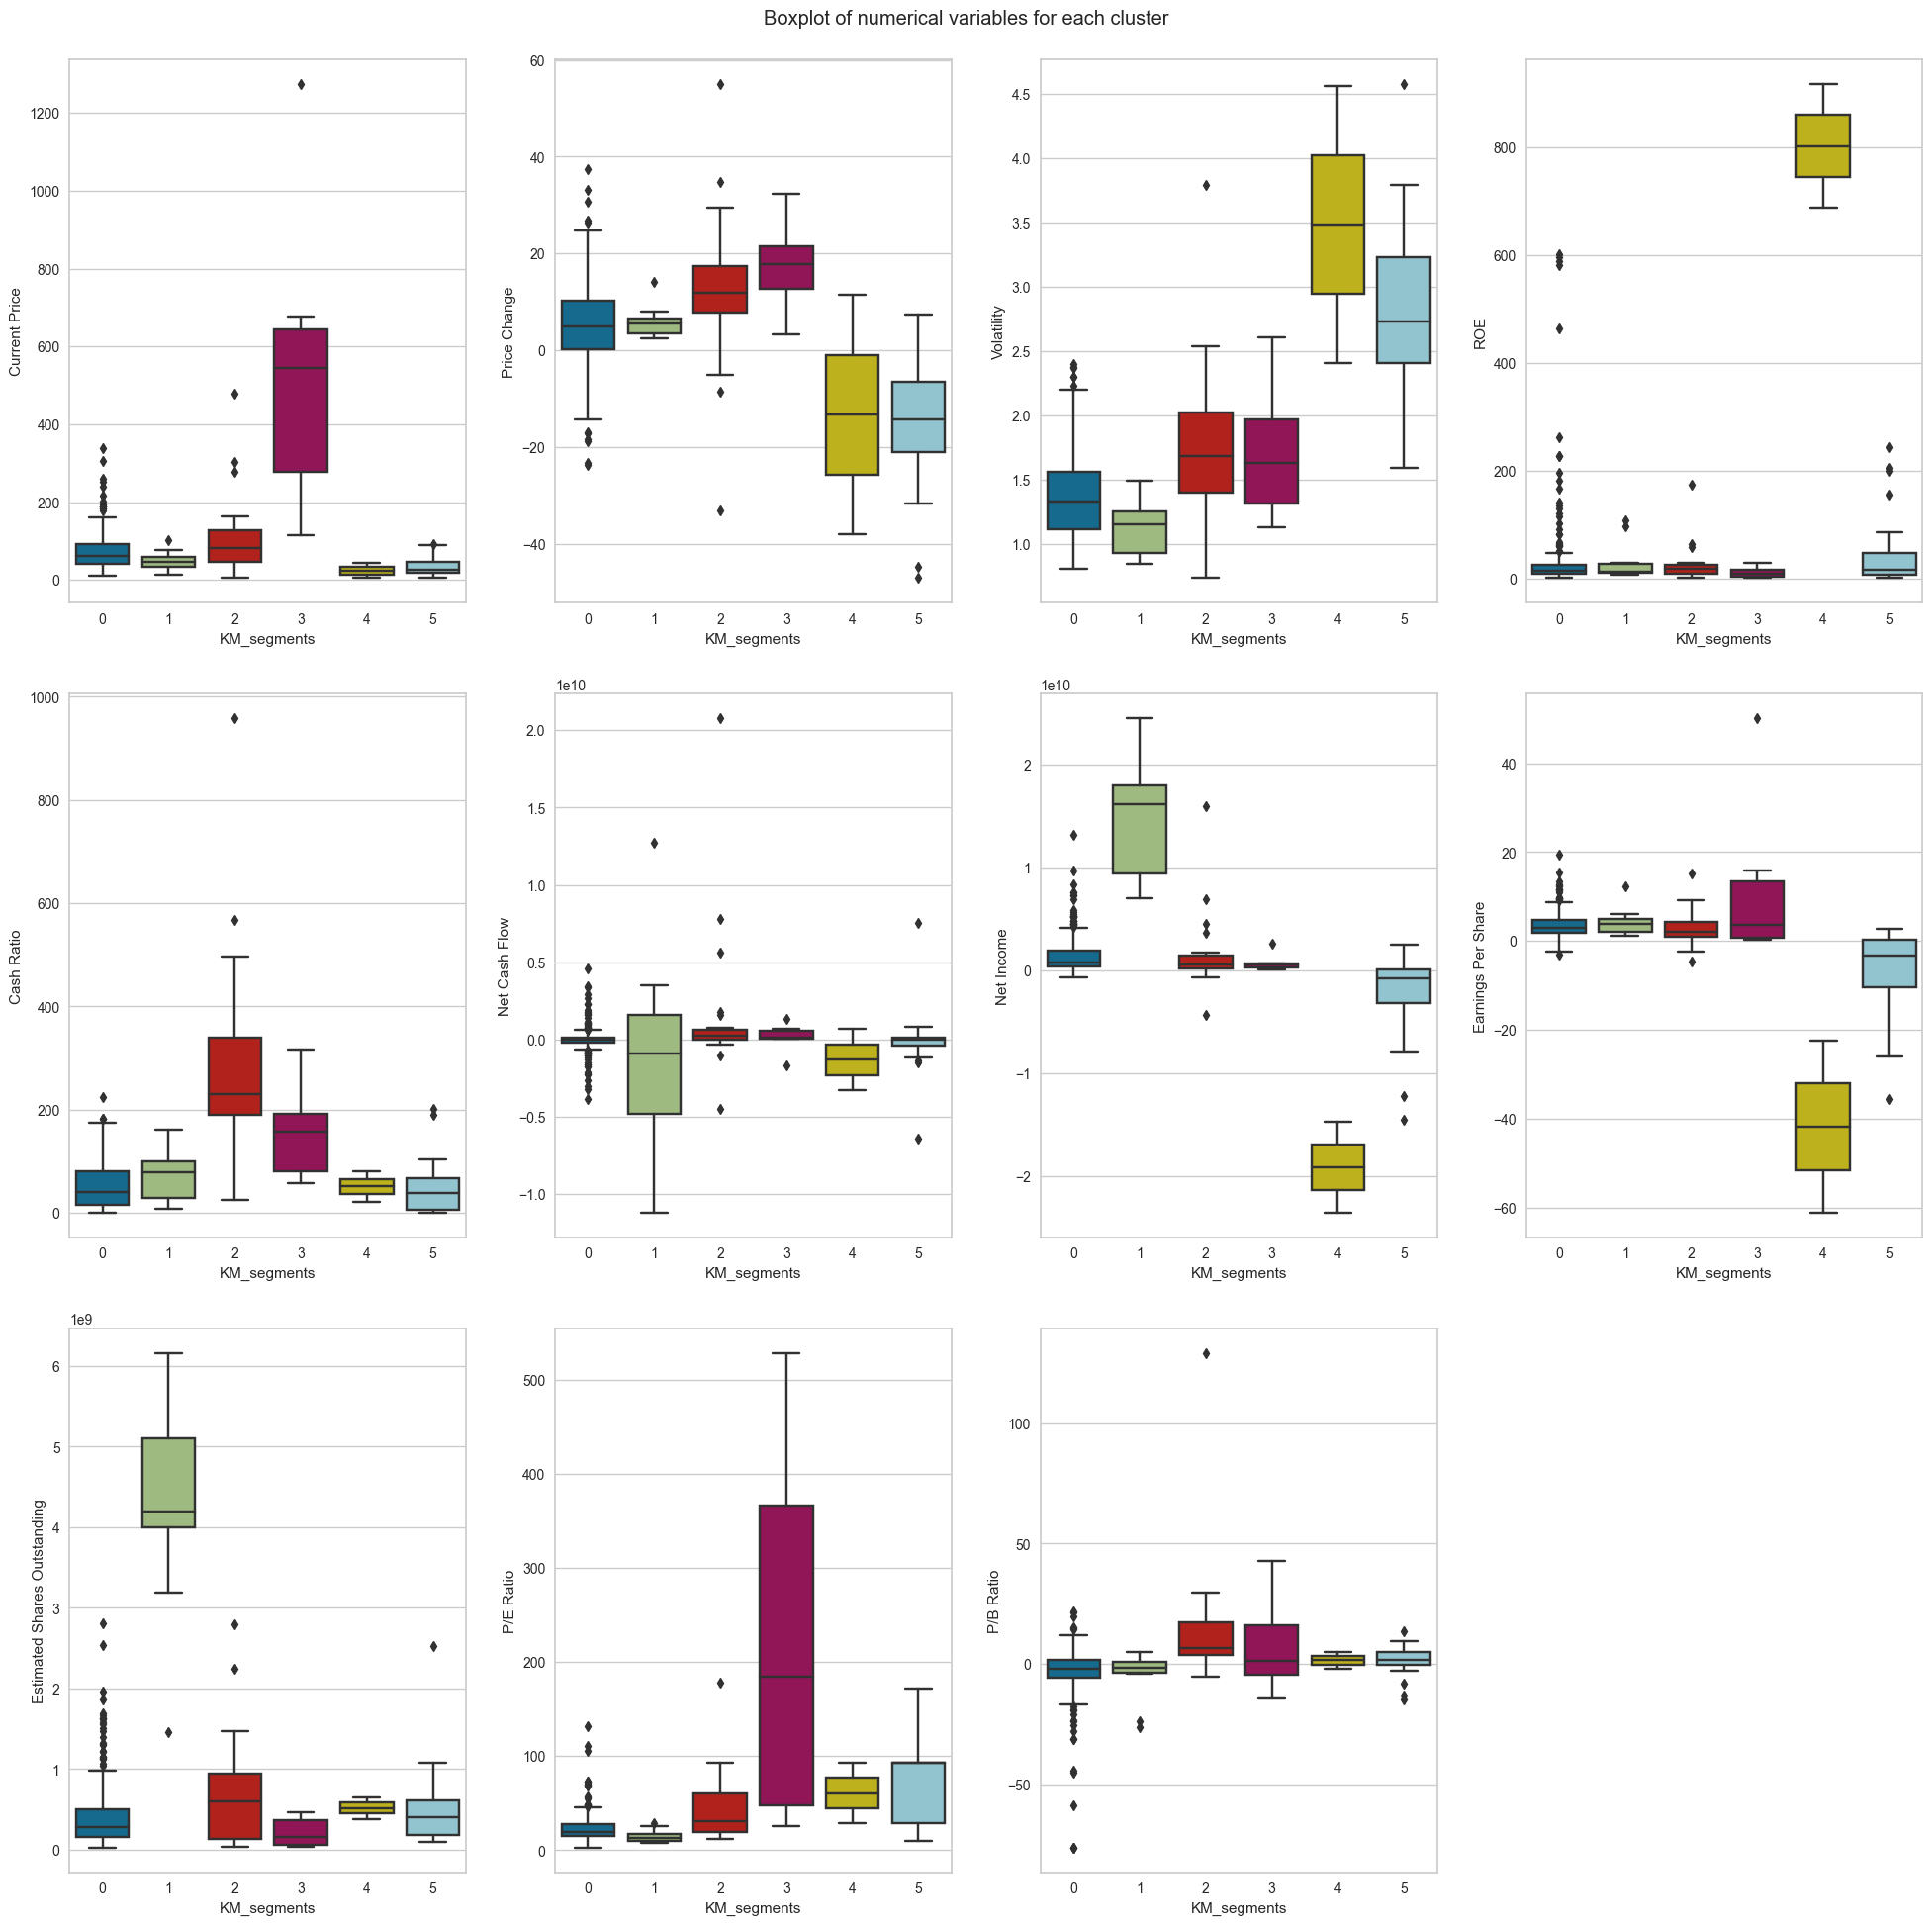

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- 


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

Error: `ValueError: The condensed distance matrix must contain only finite values.`

Reference: [ValueError: The condensed distance matrix must contain only finite values. in python](https://stackoverflow.com/questions/68039205/valueerror-the-condensed-distance-matrix-must-contain-only-finite-values-in-py)

Quote: `There are question marks in your input dataset`

In [ ]:
hc_df

Current Price  Price Change  Volatility         ROE  Cash Ratio   
0      -0.39334123    0.49394985  0.27274890  0.98960110 -0.21069771  \
1      -0.22083720    0.35543891  1.13704483  0.93773681  0.07726886   
2      -0.36719495    0.60247950 -0.42700717 -0.19290464 -0.03348751   
3       0.13356708    0.82569648 -0.28480204 -0.31737893  1.21805946   
4      -0.26087367   -0.49263618  0.29647048 -0.26551464  2.23701807   
..             ...           ...         ...         ...         ...   
335    -0.48618085    0.90164582  0.54012137 -0.25514178  4.30816218   
336    -0.28951020   -1.06576565 -0.07970324  1.06221110 -0.47651299   
337     0.22191276    0.43953914 -0.20606693 -0.40036178  0.33200851   
338    -0.54705258   -0.43681096 -0.09781298 -0.36924321  0.32093287   
339    -0.33645270    1.05104602  0.14267127 -0.07880321 -0.05563879   

     Net Cash Flow  Net Income  Earnings Per Share   
0      -0.33935545  1.55441504          1.30939929  \
1      -0.00233477  0.92762816          0.05675486   
2       0.45405813  0.74437052          0.02483067   
3      -0.15249678 -0.21981604         -0.23056285   
4       0.13356432 -0.20270344         -0.37498181   
..             ...         ...                 ...   
335    -0.55967281 -1.48778429         -1.12748058   
336     0.05323506 -0.05118622          0.02939127   
337     0.16488924 -0.34246674         -0.30353243   
338    -0.05102165 -0.30117125         -0.23968405   
339     0.11137756 -0.29366582         -0.31873443   

     Estimated Shares Outstanding   P/E Ratio   P/B Ratio  HC_segments  
0                      0.10786299 -0.65248711 -0.50665346            0  
1                      1.25027416 -0.31176905 -0.50420469            0  
2                      1.09802058 -0.39150173  0.09494078            0  
3                     -0.09162236  0.94714798  0.42433306            0  
4                      1.97839894  3.29330714  0.19919606            0  
..                            ...         ...         ...          ...  
335                    0.42911075 -0.08211581  0.57219415            0  
336                   -0.16774094 -0.33715405 -0.15201177            0  
337                   -0.46005754  2.23363447 -1.58938994            0  
338                   -0.37785227 -0.22271438  0.11867997            0  
339                   -0.09294161  0.85490199  0.24675384            0  

[340 rows x 12 columns]

In [ ]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    float64
 4   Cash Ratio                    340 non-null    float64
 5   Net Cash Flow                 340 non-null    float64
 6   Net Income                    340 non-null    float64
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
dtypes: float64(11)
memory usage: 29.3 KB


[pandas.isna](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#:~:text=isna,-pandas.&text=Detect%20missing%20values%20for%20an,arrays%2C%20NaT%20in%20datetimelike\)\.)

In [ ]:
hc_df.isna()

Current Price  Price Change  Volatility    ROE  Cash Ratio   
0            False         False       False  False       False  \
1            False         False       False  False       False   
2            False         False       False  False       False   
3            False         False       False  False       False   
4            False         False       False  False       False   
..             ...           ...         ...    ...         ...   
335          False         False       False  False       False   
336          False         False       False  False       False   
337          False         False       False  False       False   
338          False         False       False  False       False   
339          False         False       False  False       False   

     Net Cash Flow  Net Income  Earnings Per Share   
0            False       False               False  \
1            False       False               False   
2            False       False               False   
3            False       False               False   
4            False       False               False   
..             ...         ...                 ...   
335          False       False               False   
336          False       False               False   
337          False       False               False   
338          False       False               False   
339          False       False               False   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  HC_segments  
0                           False      False      False        False  
1                           False      False      False        False  
2                           False      False      False        False  
3                           False      False      False        False  
4                           False      False      False        False  
..                            ...        ...        ...          ...  
335                         False      False      False        False  
336                         False      False      False        False  
337                         False      False      False        False  
338                         False      False      False        False  
339                         False      False      False        False  

[340 rows x 12 columns]

In [ ]:
len(hc_df[col])

340

In [ ]:
type(len(hc_df[col]))

int

In [ ]:
hc_df.columns

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [ ]:
count=0
for col in hc_df.columns:
    for i in range(len(hc_df[col])):
        if pd.isna(hc_df[col][i])==True:
            count+=1
    print("count of na's in col:", col, "is:")
    print(count)
    count=0

count of na's in col: Current Price is:
0
count of na's in col: Price Change is:
0
count of na's in col: Volatility is:
0
count of na's in col: ROE is:
0
count of na's in col: Cash Ratio is:
0
count of na's in col: Net Cash Flow is:
0
count of na's in col: Net Income is:
0
count of na's in col: Earnings Per Share is:
0
count of na's in col: Estimated Shares Outstanding is:
0
count of na's in col: P/E Ratio is:
0
count of na's in col: P/B Ratio is:
0


In [ ]:
len(hc_df)

340

#### Bug finite values for jensenshannon distance metric with linkage and cophenet: [Workaround]:

error: ValueError: The condensed distance matrix must contain only finite values.

workaround: remove jensenshannon distance_metric

(see next code cell below:)

In [ ]:
# list of distance metrics

# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

# excluded `"jensenshannon", ` due to: 
# error: ValueError: The condensed distance matrix must contain only finite values.
# https://github.com/SegataLab/hclust2/issues/3
# https://github.com/CoderSales/unsupervised-learning-clustering/issues/7


distance_metrics = ["braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine", "euclidean", "mahalanobis", "minkowski", "seuclidean", "sqeuclidean"] ## Complete the code to add distance metrics

# list of linkage methods

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

# 'ward' excluded due to error:
# ValueError: Method 'ward' requires the distance metric to be Euclidean

linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

# distance_metrics = ["braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine", "euclidean", "jensenshannon", "mahalanobis", "minkowski", "seuclidean", "sqeuclidean"] ## Complete the code to add distance metrics
# linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages
# gave error:
# ValueError: The condensed distance matrix must contain only finite values.

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Braycurtis distance and single linkage is 0.5212071810658095.
Cophenetic correlation for Braycurtis distance and complete linkage is 0.10240430426791322.
Cophenetic correlation for Braycurtis distance and average linkage is 0.32627435525839565.
Cophenetic correlation for Braycurtis distance and weighted linkage is 0.20642920853912072.
Cophenetic correlation for Canberra distance and single linkage is 0.3154284565587037.
Cophenetic correlation for Canberra distance and complete linkage is 0.12703984768895782.
Cophenetic correlation for Canberra distance and average linkage is 0.28553906567883447.
Cophenetic correlation for Canberra distance and weighted linkage is 0.1626519582860221.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic corr

In [ ]:
high_cophenet_corr

0.9422540609560816

In [ ]:
high_dm_lm[0]

'seuclidean'

In [ ]:
high_dm_lm[1]

'average'

Note on above 3 code cells

post main code cell for cophenet:

scope for variables:
- `high_cophenet_corr`
- `high_dm_lm[0]`
- `high_dm_lm[1]`

in print statement:

```
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)
```

must be code cell scope,

hence unavailable in new cells

hence 0's for last 3 cell outputs.

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

Estimated runtime around: ~17.9-28.1 s

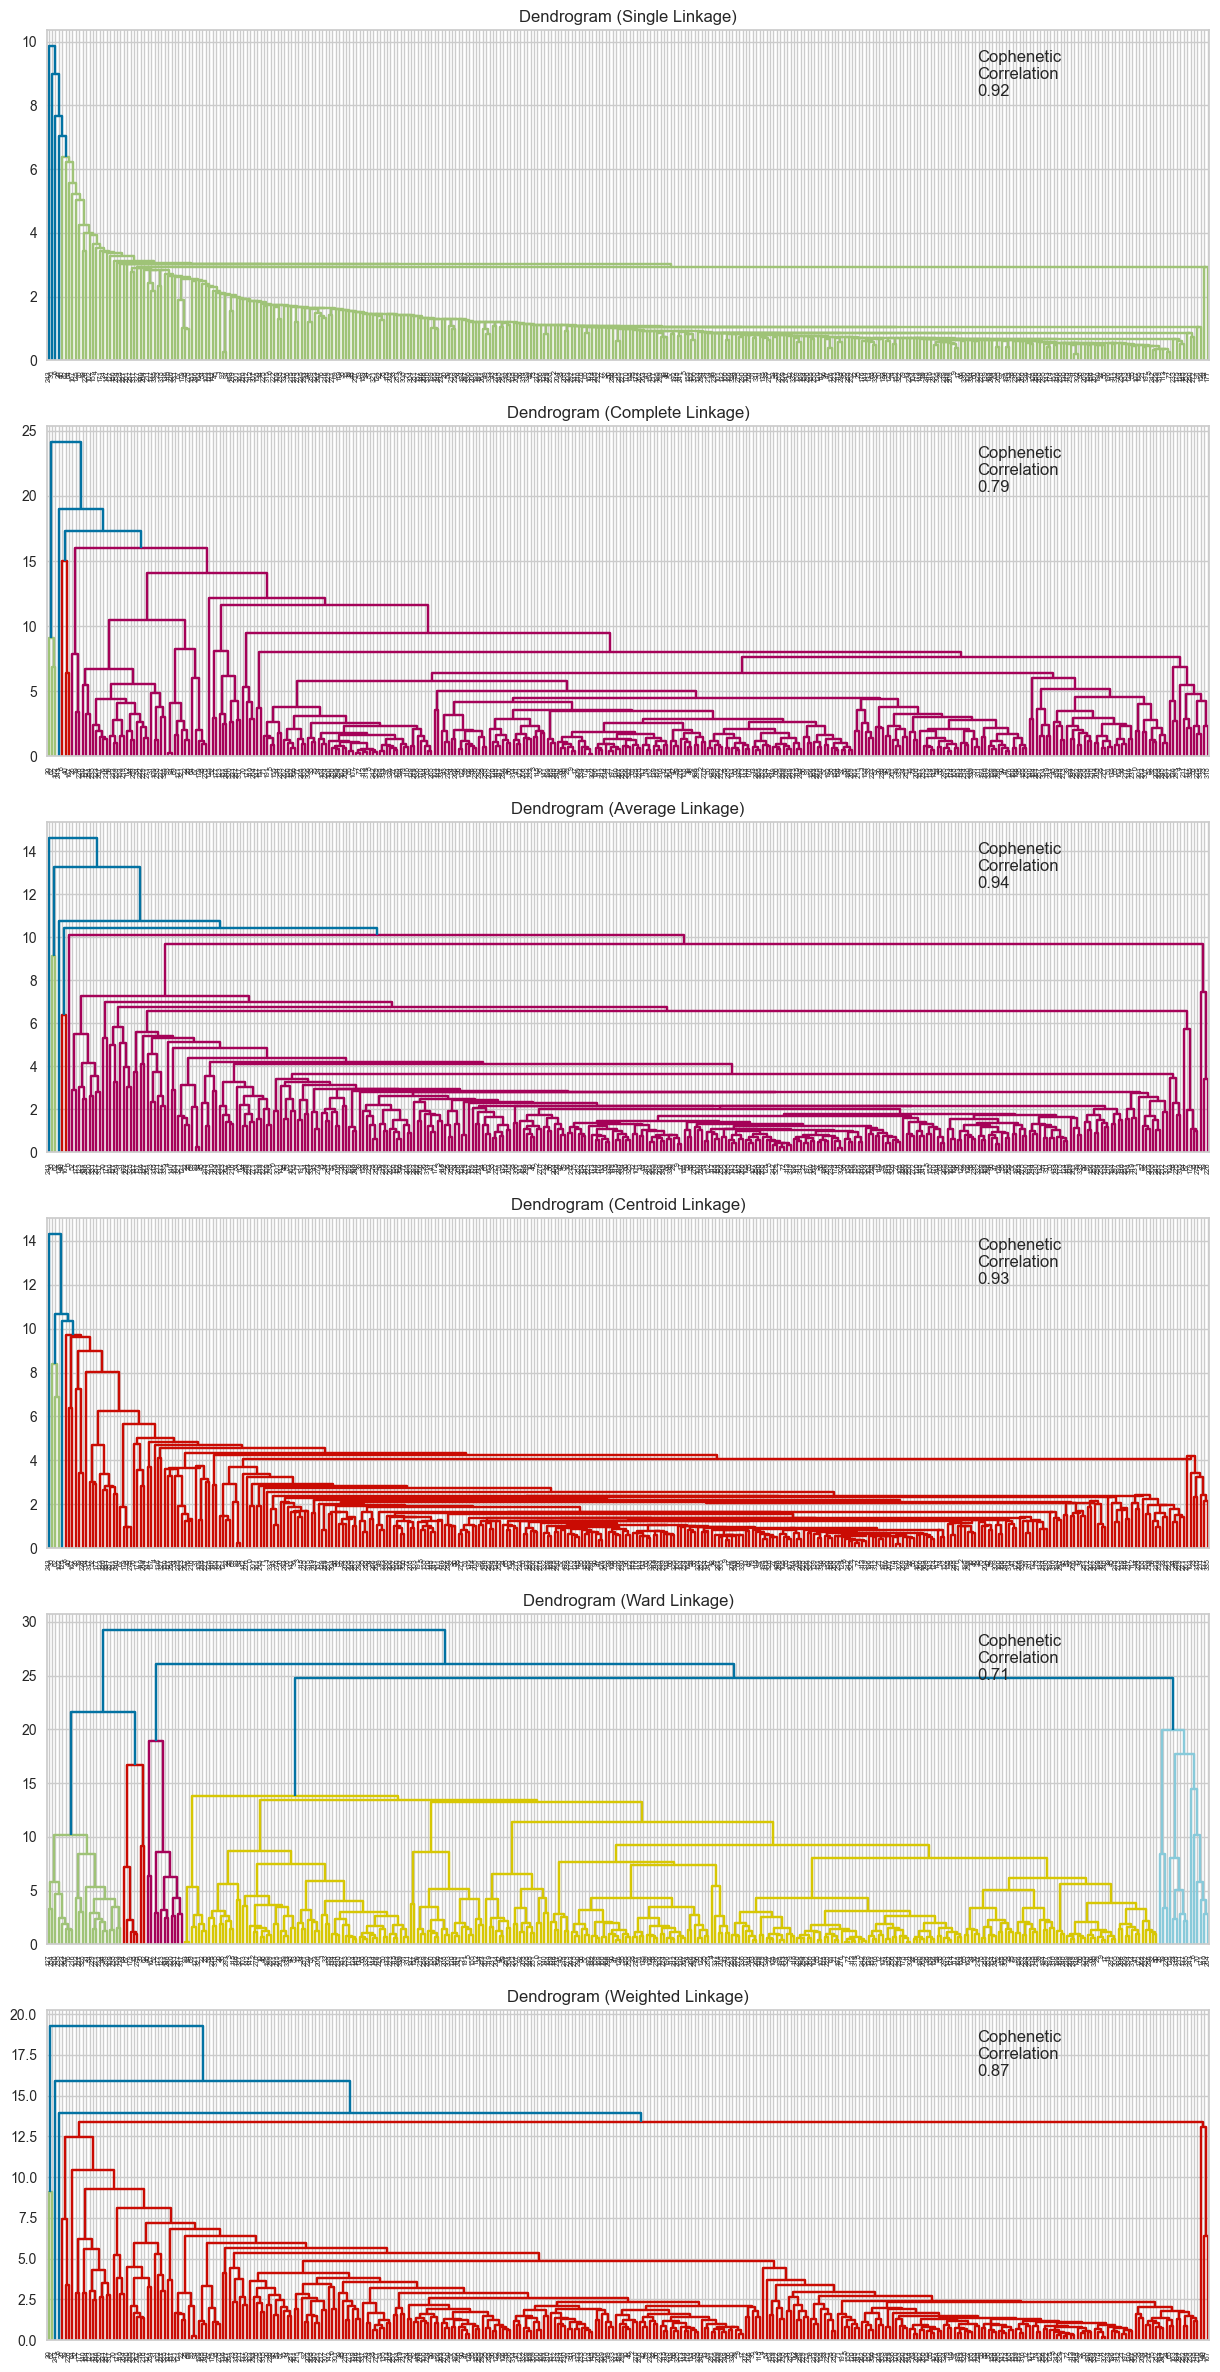

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

##### Cophenetic Coefficient for Dendrogram: ChatGPT3:
Generally, a higher cophenetic correlation coefficient indicates that the clustering algorithm better preserves the pairwise distances. However, it is important to keep in mind that a high cophenetic correlation coefficient does not necessarily mean that the resulting clusters are meaningful or useful for the intended purpose.

Therefore, it is important to use the cophenetic correlation coefficient as a guide, but also to visually inspect the resulting dendrogram and clusters to determine if they are useful for the specific problem at hand.



##### Note on these Cophenetic Coefficients:
Even though Ward linkage low cophenetic coefficient, it gave good dendrogram at 5 clusters. Hence chosen.

### Creating model using sklearn

abbreviation: hc = hierarchical clustering

reference: [Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=1)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

error: `TypeError: Could not convert to numeric`

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
hc_cluster_profile = df2.groupby(["HC_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]).mean()  ## Complete the code to groupby the cluster labels

groupby: `["HC_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]`
- Hierarchical clustering segments
- and 4 object column titles
- passed as strings into list
- passed into groupby

#### Debugging:

to fix bug:

no companies in groups / clusters when grouped by 'GICS Sub Industry',

(below, after large hc_cluster_profile output table below),

do not group by all object columns as well as by HC_segments

(that is Hierarchical Clustering segments)

object_list contains all object columns:

In [ ]:
object_list

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby(["HC_segments", 'Ticker Symbol', 'Security', 'GICS Sector', "GICS Sub Industry"])["GICS Sub Industry"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
# from ChatGPT3:

# Requests:
#  how to loop through dataframe which displays max highlighted in green so that output of all this stock exchange ticker data like pe ratio and pb ratio etc does not have to display like a thousand rows but rather only those rows with a max value in them
# regenerate code for all rows as there are more than pe and pb ratios
# exclude dtype obj cols
# adapt given that currently : hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

# function to highlight maximum values in numeric columns
def highlight_max(s):
    if np.issubdtype(s.dtype, np.number):
        is_max = s == s.max()
        return ['background-color: green' if v else '' for v in is_max]
    else:
        return ['' for _ in s]

# highlight maximum values in numeric columns only
numeric_cols = hc_cluster_profile.select_dtypes(include=np.number).columns.tolist()
hc_cluster_profile.style.apply(highlight_max, subset=numeric_cols)

# filter DataFrame to show only rows with max value in any numeric column
max_values = hc_cluster_profile.loc[hc_cluster_profile[numeric_cols].idxmax().values]

# display filtered DataFrame
print("Rows with maximum values in any numeric column:")
print(max_values)



Rows with maximum values in any numeric column:
                                                                                                                Current Price   
HC_segments Ticker Symbol Security                GICS Sector            GICS Sub Industry                                      
0           PCLN          Priceline.com Inc       Consumer Discretionary Internet & Direct Marketing Retail       1274.949951  \
            FSLR          First Solar Inc         Information Technology Semiconductors                             65.989998   
            SWN           Southwestern Energy     Energy                 Oil & Gas Exploration & Production          7.110000   
            APA           Apache Corporation      Energy                 Oil & Gas Exploration & Production         44.470001   
            FB            Facebook                Information Technology Internet Software & Services              104.660004   
            BAC           Bank of America Corp   

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
max_df=hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
type(max_df)

pandas.io.formats.style.Styler

```
You can retrieve the original dataframe from the styler object using the "data" attribute.

In your example:

df = final_df.data

type(df) yields

pandas.core.frame.DataFrame

```

[Is there a way to convert data frame styler object into dataframe in python](https://stackoverflow.com/questions/55257121/is-there-a-way-to-convert-data-frame-styler-object-into-dataframe-in-python)

In [ ]:
max_df_df=max_df.data
for col in max_df_df.columns:
    
    # for i in max_df[col]:
    print(col)

Current Price
Price Change
Volatility
ROE
Cash Ratio
Net Cash Flow
Net Income
Earnings Per Share
Estimated Shares Outstanding
P/E Ratio
P/B Ratio
count_in_each_segment


In [ ]:
type(max_df_df)

pandas.core.frame.DataFrame

In [ ]:
# TODO
# Try to get max of each column and print it.

To find the maximum value of a column and to return its corresponding row values in Pandas, we can use:

`df.loc[df[col].idxmax()]`

[Python Pandas – Find the maximum value of a column and return its corresponding row values](https://www.tutorialspoint.com/python-pandas-find-the-maximum-value-of-a-column-and-return-its-corresponding-row-values#:~:text=To%20find%20the%20maximum%20value,idxmax()%5D.)

In [ ]:
max=max_df_df.loc[max_df_df[col].idxmax()]

In [ ]:
max

Current Price                   4.235000e+01
Price Change                    9.999995e+00
Volatility                      1.687151e+00
ROE                             1.350000e+02
Cash Ratio                      5.100000e+01
Net Cash Flow                  -6.040000e+08
Net Income                      7.610000e+09
Earnings Per Share              1.139000e+01
Estimated Shares Outstanding    6.681299e+08
P/E Ratio                       3.718174e+00
P/B Ratio                      -8.784219e+00
count_in_each_segment           1.000000e+00
Name: (0, AAL, American Airlines Group, Industrials, Airlines), dtype: float64

In [ ]:
index_of_max=max_df_df[col].idxmax()

In [ ]:
index_of_max

(0, 'AAL', 'American Airlines Group', 'Industrials', 'Airlines')

In [ ]:
max=max_df_df.loc[max_df_df[col].idxmax()]
index_of_max=max_df_df[col].idxmax()

In [ ]:
max_df_df.head(5)

Current Price   
HC_segments Ticker Symbol Security                GICS Sector            GICS Sub Industry                      
0           AAL           American Airlines Group Industrials            Airlines                   42.349998  \
            ABBV          AbbVie                  Health Care            Pharmaceuticals            59.240002   
            ABT           Abbott Laboratories     Health Care            Health Care Equipment      44.910000   
            ADBE          Adobe Systems Inc       Information Technology Application Software       93.940002   
            ADI           Analog Devices, Inc.    Information Technology Semiconductors             55.320000   

                                                                                                Price Change   
HC_segments Ticker Symbol Security                GICS Sector            GICS Sub Industry                     
0           AAL           American Airlines Group Industrials            Airlines                   9.999995  \
            ABBV          AbbVie                  Health Care            Pharmaceuticals            8.339433   
            ABT           Abbott Laboratories     Health Care            Health Care Equipment     11.301121   
            ADBE          Adobe Systems Inc       Information Technology Application Software      13.977195   
            ADI           Analog Devices, Inc.    Information Technology Semiconductors            -1.827858   

                                                                                                ...   
HC_segments Ticker Symbol Security                GICS Sector            GICS Sub Industry      ...   
0           AAL           American Airlines Group Industrials            Airlines               ...  \
            ABBV          AbbVie                  Health Care            Pharmaceuticals        ...   
            ABT           Abbott Laboratories     Health Care            Health Care Equipment  ...   
            ADBE          Adobe Systems Inc       Information Technology Application Software   ...   
            ADI           Analog Devices, Inc.    Information Technology Semiconductors         ...   

                                                                                                P/B Ratio   
HC_segments Ticker Symbol Security                GICS Sector            GICS Sub Industry                  
0           AAL           American Airlines Group Industrials            Airlines               -8.784219  \
            ABBV          AbbVie                  Health Care            Pharmaceuticals        -8.750068   
            ABT           Abbott Laboratories     Health Care            Health Care Equipment  -0.394171   
            ADBE          Adobe Systems Inc       Information Technology Application Software    4.199651   
            ADI           Analog Devices, Inc.    Information Technology Semiconductors          1.059810   

                                                                                                count_in_each_segment  
HC_segments Ticker Symbol Security                GICS Sector            GICS Sub Industry                             
0           AAL           American Airlines Group Industrials            Airlines                                   1  
            ABBV          AbbVie                  Health Care            Pharmaceuticals                            1  
            ABT           Abbott Laboratories     Health Care            Health Care Equipment                      1  
            ADBE          Adobe Systems Inc       Information Technology Application Software                       1  
            ADI           Analog Devices, Inc.    Information Technology Semiconductors                             1  

[5 rows x 12 columns]

In [ ]:
for index,col in enumerate(max_df_df.columns):
    print(col)
    # print(max_df_df[col].idxmax())
    print('index',index)
    print('col',col)
    # print(max_df_df[col][index])


Current Price
index 0
col Current Price
Price Change
index 1
col Price Change
Volatility
index 2
col Volatility
ROE
index 3
col ROE
Cash Ratio
index 4
col Cash Ratio
Net Cash Flow
index 5
col Net Cash Flow
Net Income
index 6
col Net Income
Earnings Per Share
index 7
col Earnings Per Share
Estimated Shares Outstanding
index 8
col Estimated Shares Outstanding
P/E Ratio
index 9
col P/E Ratio
P/B Ratio
index 10
col P/B Ratio
count_in_each_segment
index 11
col count_in_each_segment


- loop through each unique 'Ticker Symbol' in df2 and
- print result of comparison between df2 df2 'Ticker Symbol' and c1 "Security" .unique()

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2['Ticker Symbol'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2['Ticker Symbol'] == cl]["Security"].unique())
    print()

In cluster AAL, the following companies are present:
['American Airlines Group']

In cluster ABBV, the following companies are present:
['AbbVie']

In cluster ABT, the following companies are present:
['Abbott Laboratories']

In cluster ADBE, the following companies are present:
['Adobe Systems Inc']

In cluster ADI, the following companies are present:
['Analog Devices, Inc.']

In cluster ADM, the following companies are present:
['Archer-Daniels-Midland Co']

In cluster ADS, the following companies are present:
['Alliance Data Systems']

In cluster AEE, the following companies are present:
['Ameren Corp']

In cluster AEP, the following companies are present:
['American Electric Power']

In cluster AFL, the following companies are present:
['AFLAC Inc']

In cluster AIG, the following companies are present:
['American International Group, Inc.']

In cluster AIV, the following companies are present:
['Apartment Investment & Mgmt']

In cluster AIZ, the following companies are present:
['

Edit

the following cell

to print

df2[df2['GICS Sub Industry'] == c1]["Security"].unique()

Cluster / Group by 'GICS Sub Industry':

In [ ]:
## Failed Attempt to group by df2['GICS Sub Industry'].unique()
## Duplicated from previous cell:
## Complete the code to print the companies in each cluster
for cl in df2['GICS Sub Industry'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2['GICS Sub Industry'] == cl]["Security"].unique())
    print()

In cluster Airlines, the following companies are present:
['American Airlines Group' 'Alaska Air Group Inc' 'Delta Air Lines'
 'Southwest Airlines' 'United Continental Holdings']

In cluster Pharmaceuticals, the following companies are present:
['AbbVie' 'Lilly (Eli) & Co.' 'Merck & Co.' 'Mylan N.V.' 'Pfizer Inc.'
 'Zoetis']

In cluster Health Care Equipment, the following companies are present:
['Abbott Laboratories' 'Baxter International Inc.' 'Bard (C.R.) Inc.'
 'Boston Scientific' 'Edwards Lifesciences' 'IDEXX Laboratories'
 'Intuitive Surgical Inc.' 'Stryker Corp.' 'Thermo Fisher Scientific'
 'Varian Medical Systems' 'Zimmer Biomet Holdings']

In cluster Application Software, the following companies are present:
['Adobe Systems Inc' 'Teradata Corp.']

In cluster Semiconductors, the following companies are present:
['Analog Devices, Inc.' 'Broadcom' 'First Solar Inc' 'Intel Corp.'
 'Skyworks Solutions' 'Texas Instruments']

In cluster Agricultural Products, the following companies 

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         40
             Consumer Staples               19
             Energy                         30
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
Name: Security, dtype: int64

#### Attempt to get matplotlib pyplot figure numbers

##### matplotlib pyplot font size
```
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
```
Reference: [How to change the font size on a matplotlib plot](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)

##### how to get plt number
`plt.gcf().number` [How do you get the current figure number in Python's matplotlib?](https://stackoverflow.com/questions/42322986/how-do-you-get-the-current-figure-number-in-pythons-matplotlib)

In [ ]:
plt.gcf().number

1

<Figure size 800x550 with 0 Axes>

[Get the list of figures in Matplotlib](https://www.tutorialspoint.com/get-the-list-of-figures-in-matplotlib)

In [ ]:
plt.get_fignums()

[]

[How to get subplots of matplotlib Figure?](https://stackoverflow.com/questions/45041503/how-to-get-subplots-of-matplotlib-figure)

In [ ]:
allaxes = fig.get_axes()

In [ ]:
allaxes

[<Axes: title={'center': 'Dendrogram (Single Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Complete Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Average Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Centroid Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Ward Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Weighted Linkage)'}>]

```
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
```
[How to change the font size on a matplotlib plot](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)

In [ ]:
# unused:
# https://stackoverflow.com/questions/49572582/distplot-got-an-unexpected-keyword-argument-figsize
# Solves figsize:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# plt.figure(figsize=(3,3))
# ax=plt.subplot(111, title='title')
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(9)
# plt.subplot(figsize=(4,4))

In [ ]:
# ax=plt.subplot(title='title')
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(20)


fix bug: adjust text size:

- save boxplot to ax var for each of 11 subplots 
- set_fontsize to 15 for each subplot

as follows:

replace:

`ax=sns.boxplot(data=df2, x="HC_segments", y=variable)`

with:

```
ax=sns.boxplot(data=df2, x="HC_segments", y=variable)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
```

1

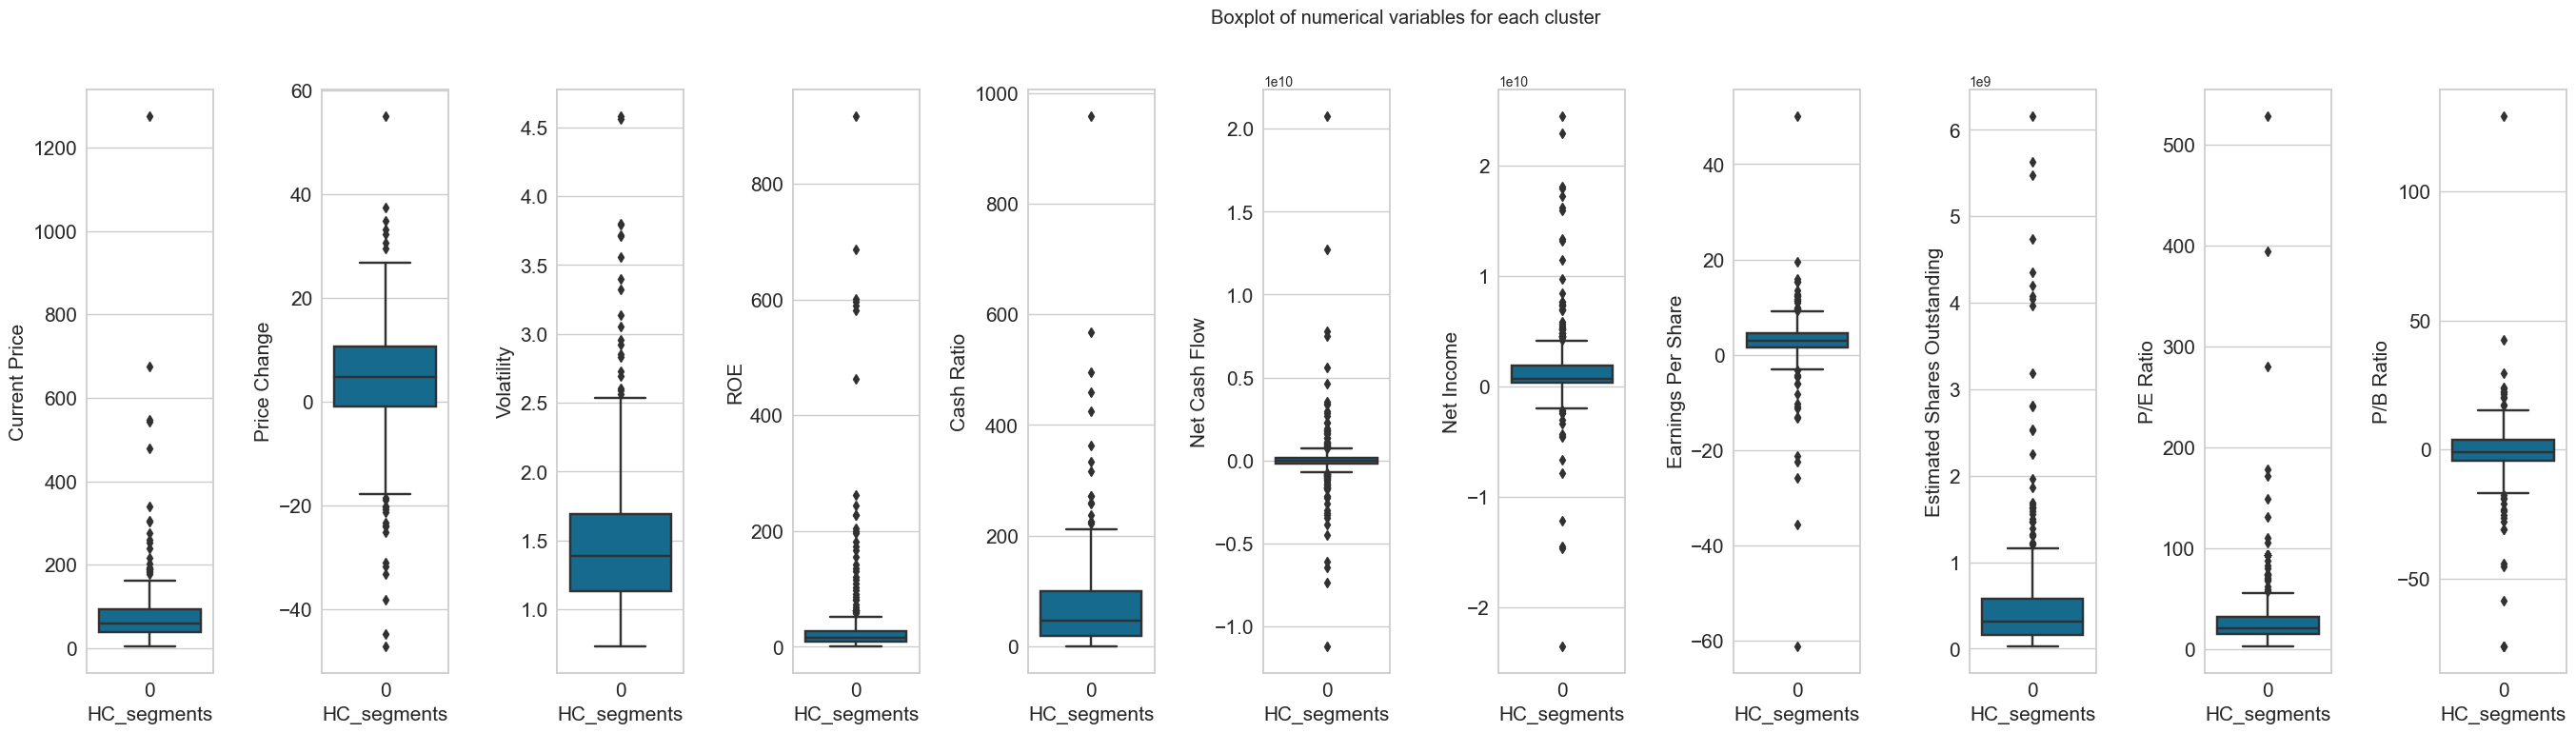

In [ ]:
plt.figure(figsize=(30, 8))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(1, 12, i + 1)
    ax=sns.boxplot(data=df2, x="HC_segments", y=variable)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

plt.tight_layout(pad=2.0)
plt.gcf().number

from above:
Current price InterQuartile Range (IQR) for HC_segments is below 200.

In [ ]:
df2['HC_segments'].describe()

count    340.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: HC_segments, dtype: float64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

---

## Further reanalysis of K-means and Hierarchical Clustering before drawing conclustions:

### ChatGPT3:

In [ ]:
df_cluster = df2.drop(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry'], axis=1).select_dtypes(exclude='object')

In [ ]:
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(df_cluster)
df2['KM_segments'] = kmeans.labels_


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# calculate the linkage matrix
Z = linkage(df_cluster, method='ward')

# cut the dendrogram at the desired number of clusters
df2['HC_segments'] = cut_tree(Z, n_clusters=5)

In [ ]:
df_clustered = df2.loc[:, ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio', 'KM_segments', 'HC_segments']]

In [ ]:
df1["KM_segments"] = kmeans.labels_

In [ ]:
df1["KM_segments"] = kmeans.labels_


In [ ]:
print(df1.head())

  Ticker Symbol                 Security  ... P/B Ratio KM_segments
0           AAL  American Airlines Group  ... -8.784219           0
1          ABBV                   AbbVie  ... -8.750068           0
2           ABT      Abbott Laboratories  ... -0.394171           0
3          ADBE        Adobe Systems Inc  ...  4.199651           4
4           ADI     Analog Devices, Inc.  ...  1.059810           4

[5 rows x 16 columns]


In [ ]:
print(df1.columns)

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')


Note on debugging with ChatGPT3:
Suspected Issue with state in Jupyter Notebook:
overcome by replacing df1 and df2 with
df3 and df4 respectively. (John Grus)

In [ ]:
# creating a copy of the original data
df3 = df.copy()
df4 = df.copy()

# selecting columns for clustering
cols = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',        'Net Cash Flow', 'Net Income', 'Earnings Per Share',        'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df4[cols])

# applying k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)

# adding k-means cluster labels to the original and scaled dataframes
k_means_df = pd.DataFrame(data_scaled, columns=cols)
k_means_df["KM_segments"] = kmeans.labels_
df3["KM_segments"] = kmeans.labels_

# applying hierarchical clustering
linked = linkage(data_scaled, method='ward')
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc.fit(data_scaled)

# adding hierarchical cluster labels to the original dataframe
df4['HC_segments'] = hc.labels_

print(kmeans.labels_)


# selecting columns for clustering output
cols_clust = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',               
              'Net Cash Flow', 'Net Income', 'Earnings Per Share',               
              'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio', 'KM_segments']

# printing k-means clustering output
print("\nK-Means Clustering:")
df_clustered = df3.loc[:, cols_clust].groupby(['KM_segments']).mean()
print(df_clustered)

# printing hierarchical clustering output
print("\nHierarchical Clustering:")
df_clustered = df


[3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 0 3 3 3 1 1 3 3 3 3 3
 3 3 3 0 3 3 3 1 0 3 3 3 3 3 3 2 3 3 3 3 3 0 3 3 3 1 3 3 3 3 3 3 3 0 3 3 3
 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 0
 3 1 3 3 3 3 3 0 3 3 3 3 2 3 0 3 1 3 3 3 3 3 3 3 3 0 0 3 3 2 3 3 3 3 3 3 0
 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 2 3 3 3 0 3 3 3 3 3 2 3 3 1 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 1 3 3 1 3 3
 1 3 3 3 1 1 3 1 3 3 3 3 3 1 3 3 1 3 3 3 3 0 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 0 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 1 3 3 3 0 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 2 0 3 2 3 3 1 3 3 3 0 1 3 3 2 3
 3 3 0 3 3 3 3]

K-Means Clustering:
             Current Price  Price Change  ...  P/E Ratio  P/B Ratio
KM_segments                               ...                      
0               234.170932     13.400685  ...  74.960824  14.402452
1                38.099260    -15.370329  ...  90.619220   1.342067
2               

In [ ]:
print(df1.columns) 

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')


In [ ]:
print(df1.head())

  Ticker Symbol                 Security  ... P/B Ratio KM_segments
0           AAL  American Airlines Group  ... -8.784219           0
1          ABBV                   AbbVie  ... -8.750068           0
2           ABT      Abbott Laboratories  ... -0.394171           0
3          ADBE        Adobe Systems Inc  ...  4.199651           4
4           ADI     Analog Devices, Inc.  ...  1.059810           4

[5 rows x 16 columns]


In [ ]:
df1["KM_segments"] = kmeans.labels_

In [ ]:
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [ ]:
print(cols_clust) 

['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio', 'KM_segments']


### end of Section: ChatGPT3.

df3 has K means segments derived from above code.

In [ ]:
df3

Ticker Symbol                 Security             GICS Sector   
0             AAL  American Airlines Group             Industrials  \
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility   
0                        Airlines    42.34999800    9.99999481  1.68715106  \
1                 Pharmaceuticals    59.24000200    8.33943306  2.19788722   
2           Health Care Equipment    44.91000000   11.30112076  1.27364601   
3            Application Software    93.94000200   13.97719519  1.35767892   
4                  Semiconductors    55.32000000   -1.82785810  1.70116879   
..                            ...            ...           ...         ...   
335  Internet Software & Services    33.25999800   14.88772660  1.84514878   
336                   Restaurants    52.51617541   -8.69891720  1.47887743   
337         Health Care Equipment   102.58999600    9.34768280  1.40420566   
338                Regional Banks    27.29999900   -1.15858794  1.46817588   
339               Pharmaceuticals    47.91999800   16.67883613  1.61028462   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share   
0    135          51     -604000000  7610000000         11.39000000  \
1    130          77       51000000  5144000000          3.15000000   
2     21          67      938000000  4423000000          2.94000000   
3      9         180     -240840000   629551000          1.26000000   
4     14         272      315120000   696878000          0.31000000   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000         -4.64000000   
336  142          27      159000000  1293000000          2.97000000   
337    1         100      376000000   147000000          0.78000000   
338    4          99      -43623000   309471000          1.20000000   
339   32          65      272000000   339000000          0.68000000   

     Estimated Shares Outstanding    P/E Ratio    P/B Ratio   
0              668129938.50000000   3.71817366  -8.78421945  \
1             1633015873.00000000  18.80634984  -8.75006804   
2             1504421769.00000000  15.27551020  -0.39417138   
3              499643650.80000001  74.55555714   4.19965109   
4             2247993548.00000000 178.45161290   1.05980998   
..                            ...          ...          ...   
335            939457327.60000002  28.97619077   6.26177457   
336            435353535.39999998  17.68221394  -3.83825986   
337            188461538.50000000 131.52563590 -23.88444898   
338            257892500.00000000  22.74999917  -0.06309606   
339            498529411.80000001  70.47058529   1.72306785   

     HC_segments_AgglomerativeClustering(affinity='euclidean', n_clusters=3)   
0                                                                          0  \
1                                                                          0   
2                                                                          0   
3                                                                          0   
4                                                                          0   
..                                                                       ...   
335                                                     

df4 has hierarchical clustering segments derived from above code.

In [ ]:
df4

Ticker Symbol                 Security             GICS Sector   
0             AAL  American Airlines Group             Industrials  \
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility   
0                        Airlines    42.34999800    9.99999481  1.68715106  \
1                 Pharmaceuticals    59.24000200    8.33943306  2.19788722   
2           Health Care Equipment    44.91000000   11.30112076  1.27364601   
3            Application Software    93.94000200   13.97719519  1.35767892   
4                  Semiconductors    55.32000000   -1.82785810  1.70116879   
..                            ...            ...           ...         ...   
335  Internet Software & Services    33.25999800   14.88772660  1.84514878   
336                   Restaurants    52.51617541   -8.69891720  1.47887743   
337         Health Care Equipment   102.58999600    9.34768280  1.40420566   
338                Regional Banks    27.29999900   -1.15858794  1.46817588   
339               Pharmaceuticals    47.91999800   16.67883613  1.61028462   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share   
0    135          51     -604000000  7610000000         11.39000000  \
1    130          77       51000000  5144000000          3.15000000   
2     21          67      938000000  4423000000          2.94000000   
3      9         180     -240840000   629551000          1.26000000   
4     14         272      315120000   696878000          0.31000000   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000         -4.64000000   
336  142          27      159000000  1293000000          2.97000000   
337    1         100      376000000   147000000          0.78000000   
338    4          99      -43623000   309471000          1.20000000   
339   32          65      272000000   339000000          0.68000000   

     Estimated Shares Outstanding    P/E Ratio    P/B Ratio  HC_segments  
0              668129938.50000000   3.71817366  -8.78421945            3  
1             1633015873.00000000  18.80634984  -8.75006804            3  
2             1504421769.00000000  15.27551020  -0.39417138            3  
3              499643650.80000001  74.55555714   4.19965109            3  
4             2247993548.00000000 178.45161290   1.05980998            3  
..                            ...          ...          ...          ...  
335            939457327.60000002  28.97619077   6.26177457            1  
336            435353535.39999998  17.68221394  -3.83825986            3  
337            188461538.50000000 131.52563590 -23.88444898            3  
338            257892500.00000000  22.74999917  -0.06309606            3  
339            498529411.80000001  70.47058529   1.72306785            3  

[340 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

---

#### ChatGPT3 continuation of analysis on df3 (Kmeans) and df4 (Hierarchical Clustering):

In [ ]:
# filtering out stocks from df3 that belong to a specific cluster
cluster_num = 0  # change this to the cluster number you want to analyze
clustered_stocks = df3[df3['KM_segments'] == cluster_num]

# sorting the stocks by a certain metric, e.g. P/E ratio
sorted_stocks = clustered_stocks.sort_values(by='P/E Ratio')

# printing the top 5 stocks in the cluster based on the selected metric
print(f"Top 5 stocks in cluster {cluster_num} based on P/E ratio:")
print(sorted_stocks[['Ticker Symbol', 'Security', 'P/E Ratio']].head())

# repeating the above steps for hierarchical clustering on df4
cluster_num = 2  # change this to the cluster number you want to analyze
clustered_stocks = df4[df4['HC_segments'] == cluster_num]
sorted_stocks = clustered_stocks.sort_values(by='Net Income', ascending=False)
print(f"\nTop 5 stocks in cluster {cluster_num} based on net income:")
print(sorted_stocks[['Ticker Symbol', 'Security', 'Net Income']].head())


Top 5 stocks in cluster 0 based on P/E ratio:
    Ticker Symbol                 Security  P/E Ratio
136          FSLR          First Solar Inc  12.175276
40            BAC     Bank of America Corp  13.004785
137           FTR  Frontier Communications  14.518987
23           AMGN                Amgen Inc  17.740984
45           BIIB         BIOGEN IDEC Inc.  19.918726

Top 5 stocks in cluster 2 based on net income:
    Ticker Symbol                Security   Net Income
177           JPM    JPMorgan Chase & Co.  24442000000
320           WFC             Wells Fargo  22894000000
317            VZ  Verizon Communications  17879000000
52              C          Citigroup Inc.  17242000000
331           XOM       Exxon Mobil Corp.  16150000000


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# creating a copy of the original data
df1 = df.copy()
df2 = df.copy()

# selecting columns for clustering
cols = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
        'Net Cash Flow', 'Net Income', 'Earnings Per Share',
        'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2[cols])

# applying k-means clustering
k_clusters = [3, 4, 5]
for k in k_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)

    # adding k-means cluster labels to the original and scaled dataframes
    k_means_df = pd.DataFrame(data_scaled, columns=cols)
    k_means_df["KM_segments"] = kmeans.labels_
    df1[f"KM_segments_{k}"] = kmeans.labels_

    # selecting columns for clustering output
    cols_clust = cols + [f"KM_segments_{k}"]

    # printing k-means clustering output
    print(f"\nK-Means Clustering with {k} clusters:")
    df_clustered = df1.loc[:, cols_clust].groupby([f"KM_segments_{k}"]).mean()
    print(df_clustered)

# applying hierarchical clustering
hc_clusters = [3, 4, 5]
for hc in hc_clusters:
    linked = linkage(data_scaled, method='ward')
    hc = AgglomerativeClustering(n_clusters=hc, affinity='euclidean', linkage='ward')
    hc.fit(data_scaled)

    # adding hierarchical cluster labels to the original dataframe
    df2[f"HC_segments_{hc}"] = hc.labels_

    # selecting columns for clustering output
    cols_clust = cols + [f"HC_segments_{hc}"]

    # printing hierarchical clustering output
    print(f"\nHierarchical Clustering with {hc} clusters:")
    df_clustered = df2.loc[:, cols_clust].groupby([f"HC_segments_{hc}"]).mean()
    print(df_clustered)



K-Means Clustering with 3 clusters:
               Current Price  Price Change  ...   P/E Ratio  P/B Ratio
KM_segments_3                               ...                       
0                  84.250468      5.595187  ...   24.416003  -2.011211
1                  52.142857      6.779993  ...   20.654832  -3.529270
2                  62.963940    -10.537087  ...  110.461063   1.651207

[3 rows x 11 columns]

K-Means Clustering with 4 clusters:
               Current Price  Price Change  ...  P/E Ratio  P/B Ratio
KM_segments_4                               ...                      
0                 234.170932     13.400685  ...  74.960824  14.402452
1                  38.099260    -15.370329  ...  90.619220   1.342067
2                  50.517273      5.747586  ...  14.803577  -4.552119
3                  72.399112      5.066225  ...  23.843656  -3.358948

[4 rows x 11 columns]

K-Means Clustering with 5 clusters:
               Current Price  Price Change  ...  P/E Ratio  P/B Rati

In [ ]:
# applying hierarchical clustering
linked = linkage(data_scaled, method='ward')
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_labels = pd.Series(hc.fit_predict(data_scaled), name='HC_segments')
df3 = pd.concat([df2, hc_labels], axis=1)


In [ ]:
# printing hierarchical clustering output
print("\nHierarchical Clustering:")
for cluster in df3['HC_segments'].unique():
    print(f"\nCluster {cluster}:")
    df_clustered = df3[df3['HC_segments']==cluster][cols].mean()
    print(df_clustered)



Hierarchical Clustering:

Cluster 3:
Current Price                   7.276040e+01
Price Change                    5.213307e+00
Volatility                      1.427078e+00
ROE                             2.560351e+01
Cash Ratio                      6.039298e+01
Net Cash Flow                   7.995151e+07
Net Income                      1.538594e+09
Earnings Per Share              3.655351e+00
Estimated Shares Outstanding    4.464721e+08
P/E Ratio                       2.472267e+01
P/B Ratio                      -2.647194e+00
dtype: float64

Cluster 0:
Current Price                   3.261982e+02
Price Change                    1.056324e+01
Volatility                      1.642560e+00
ROE                             1.440000e+01
Cash Ratio                      3.094667e+02
Net Cash Flow                   2.888507e+08
Net Income                      8.644985e+08
Earnings Per Share              7.785333e+00
Estimated Shares Outstanding    5.449003e+08
P/E Ratio                       1.1

In [ ]:
print(df3.columns)


Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'HC_segments_AgglomerativeClustering(affinity='euclidean', n_clusters=3)',
       'HC_segments_AgglomerativeClustering(affinity='euclidean', n_clusters=4)',
       'HC_segments_AgglomerativeClustering(affinity='euclidean', n_clusters=5)',
       'HC_segments'],
      dtype='object')


In [ ]:
pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# creating a copy of the original data
df1 = df.copy()
df2 = df.copy()

# selecting columns for clustering
cols = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
        'Net Cash Flow', 'Net Income', 'Earnings Per Share',
        'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2[cols])

# applying k-means clustering
k_clusters = [3, 4, 5]
for k in k_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)

    # adding k-means cluster labels to the original and scaled dataframes
    k_means_df = pd.DataFrame(data_scaled, columns=cols)
    k_means_df[f"KM_segments_{k}"] = kmeans.labels_
    df1[f"KM_segments_{k}"] = kmeans.labels_

# applying hierarchical clustering
h_clusters = [3, 4, 5]
for h in h_clusters:
    linked = linkage(data_scaled, method='ward')
    hc = AgglomerativeClustering(n_clusters=h, affinity='euclidean', linkage='ward')
    hc.fit(data_scaled)

    # adding hierarchical cluster labels to the original dataframe
    df2[f'HC_segments_{h}'] = hc.labels_

# printing k-means clustering output
for k in k_clusters:
    cols_clust = cols + [f'KM_segments_{k}']
    print(f"\nK-Means Clustering with {k} clusters:")
    df_clustered = df1.loc[:, cols_clust].groupby([f'KM_segments_{k}']).mean()
    df_clustered['Current Price'] = df_clustered['Current Price'].map('${:,.2f}'.format)
    df_clustered['Price Change'] = df_clustered['Price Change'].map('${:,.2f}'.format)
    print(df_clustered)

# printing hierarchical clustering output
for h in h_clusters:
    cols_clust = cols + [f'HC_segments_{h}']
    print(f"\nHierarchical Clustering with {h} clusters:")
    df_clustered = df2.loc[:, cols_clust].groupby([f'HC_segments_{h}']).mean()
    df_clustered['Current Price'] = df_clustered['Current Price'].map('${:,.2f}'.format)
    df_clustered['Price Change'] = df_clustered['Price Change'].map('${:,.2f}'.format)
    print(df_clustered)




K-Means Clustering with 3 clusters:
              Current Price Price Change  Volatility        ROE  Cash Ratio   
KM_segments_3                                                                 
0                    $84.25        $5.60    1.402117  34.146758   66.815700  \
1                    $52.14        $6.78    1.175153  26.142857  140.142857   
2                    $62.96      $-10.54    2.774534  93.696970   68.757576   

               Net Cash Flow    Net Income  Earnings Per Share   
KM_segments_3                                                    
0               1.074169e+07  1.449597e+09            3.902338  \
1               7.602857e+08  1.336879e+10            3.769286   
2               1.542872e+08 -3.145582e+09           -7.639091   

               Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
KM_segments_3                                                       
0                              4.263575e+08   24.416003  -2.011211  
1                            

In [ ]:
df.describe()

Current Price  Price Change  Volatility         ROE  Cash Ratio   
count     340.000000    340.000000  340.000000  340.000000  340.000000  \
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share   
count   3.400000e+02  3.400000e+02          340.000000  \
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

In [ ]:
df.describe(include='all')

Ticker Symbol                 Security  GICS Sector   
count            340                      340          340  \
unique           340                      340           11   
top              AAL  American Airlines Group  Industrials   
freq               1                        1           53   
mean             NaN                      NaN          NaN   
std              NaN                      NaN          NaN   
min              NaN                      NaN          NaN   
25%              NaN                      NaN          NaN   
50%              NaN                      NaN          NaN   
75%              NaN                      NaN          NaN   
max              NaN                      NaN          NaN   

                         GICS Sub Industry  Current Price  Price Change   
count                                  340     340.000000    340.000000  \
unique                                 104            NaN           NaN   
top     Oil & Gas Exploration & Production            NaN           NaN   
freq                                    16            NaN           NaN   
mean                                   NaN      80.862345      4.078194   
std                                    NaN      98.055086     12.006338   
min                                    NaN       4.500000    -47.129693   
25%                                    NaN      38.555000     -0.939484   
50%                                    NaN      59.705000      4.819505   
75%                                    NaN      92.880001     10.695493   
max                                    NaN    1274.949951     55.051683   

        Volatility         ROE  Cash Ratio  Net Cash Flow    Net Income   
count   340.000000  340.000000  340.000000   3.400000e+02  3.400000e+02  \
unique         NaN         NaN         NaN            NaN           NaN   
top            NaN         NaN         NaN            NaN           NaN   
freq           NaN         NaN         NaN            NaN           NaN   
mean      1.525976   39.597059   70.023529   5.553762e+07  1.494385e+09   
std       0.591798   96.547538   90.421331   1.946365e+09  3.940150e+09   
min       0.733163    1.000000    0.000000  -1.120800e+10 -2.352800e+10   
25%       1.134878    9.750000   18.000000  -1.939065e+08  3.523012e+08   
50%       1.385593   15.000000   47.000000   2.098000e+06  7.073360e+08   
75%       1.695549   27.000000   99.000000   1.698108e+08  1.899000e+09   
max       4.580042  917.000000  958.000000   2.076400e+10  2.444200e+10   

        Earnings Per Share  Estimated Shares Outstanding   P/E Ratio   
count           340.000000                  3.400000e+02  340.000000  \
unique                 NaN                           NaN         NaN   
top                    NaN                           NaN         NaN   
freq                   NaN                           NaN         NaN   
mean              2.776662                  5.770283e+08   32.612563   
std               6.587779                  8.458496e+08   44.348731   
min             -61.200000                  2.767216e+07    2.935451   
25%               1.557500                  1.588482e+08   15.044653   
50%               2.895000                  3.096751e+08   20.819876   
75%               4.620000                  5.731175e+08   31.764755   
max              50.090000                  6.159292e+09  528.039074   

         P/B Ratio  
count   340.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     -1.718249  
std      13.966912  
min     -76.119077  
25%      -4.352056  
50%      -1.067170  
75%       3.917066  
max     129.064585

In [ ]:
df.describe(include='all').T

count unique   
Ticker Symbol                   340    340  \
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq   
Ticker Symbol                                                AAL    1  \
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std   
Ticker Symbol                               NaN                NaN  \
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%   
Ticker Symbol                           NaN          NaN          NaN  \
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
pd.reset_option('^display.', silent=True)


In [ ]:
df

Ticker Symbol                 Security             GICS Sector   
0             AAL  American Airlines Group             Industrials  \
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility   
0                        Airlines      42.349998      9.999995    1.687151  \
1                 Pharmaceuticals      59.240002      8.339433    2.197887   
2           Health Care Equipment      44.910000     11.301121    1.273646   
3            Application Software      93.940002     13.977195    1.357679   
4                  Semiconductors      55.320000     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share   
0    135          51     -604000000  7610000000               11.39  \
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

In [ ]:
df.describe(include=[np.number]).T # only numeric columns # ChatGPT3 and GitHub Copilot

count          mean           std           min   
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00  \
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%   
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01  \
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

In [ ]:
import locale

# set the locale to the appropriate region format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# select columns to describe
cols_desc = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
             'Net Cash Flow', 'Net Income', 'Earnings Per Share',
             'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# describe the numeric columns and exclude object type columns
df_desc = df.select_dtypes(include=['float64', 'int64']).describe().T

# apply currency formatting to the 'Current Price' and 'Price Change' columns
df_desc[['mean', 'std', 'min', 'max']] = df_desc[['mean', 'std', 'min', 'max']].applymap(lambda x: locale.currency(x))

# display the summary statistics
print(df_desc)

                              count            mean             std   
Current Price                 340.0          $80.86          $98.06  \
Price Change                  340.0           $4.08          $12.01   
Volatility                    340.0           $1.53           $0.59   
ROE                           340.0          $39.60          $96.55   
Cash Ratio                    340.0          $70.02          $90.42   
Net Cash Flow                 340.0    $55537620.59  $1946365312.18   
Net Income                    340.0  $1494384602.94  $3940150279.33   
Earnings Per Share            340.0           $2.78           $6.59   
Estimated Shares Outstanding  340.0   $577028337.75   $845849595.42   
P/E Ratio                     340.0          $32.61          $44.35   
P/B Ratio                     340.0         ($1.72)          $13.97   

                                            min           25%           50%   
Current Price                             $4.50  3.855500e+01  5.970

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Exclude columns with data type 'object'
num_cols = df.select_dtypes(include=[np.number]).columns

# Generate summary statistics for selected columns
df_desc = df[num_cols].describe().T
df_desc.head()


count       mean        std        min        25%        50%   
Current Price  340.0  80.862345  98.055086   4.500000  38.555000  59.705000  \
Price Change   340.0   4.078194  12.006338 -47.129693  -0.939484   4.819505   
Volatility     340.0   1.525976   0.591798   0.733163   1.134878   1.385593   
ROE            340.0  39.597059  96.547538   1.000000   9.750000  15.000000   
Cash Ratio     340.0  70.023529  90.421331   0.000000  18.000000  47.000000   

                     75%          max  
Current Price  92.880001  1274.949951  
Price Change   10.695493    55.051683  
Volatility      1.695549     4.580042  
ROE            27.000000   917.000000  
Cash Ratio     99.000000   958.000000

In [ ]:
import pandas as pd
import locale

# set the locale to the appropriate region format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# select columns to describe
cols_desc = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
             'Net Cash Flow', 'Net Income', 'Earnings Per Share',
             'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# describe the numeric columns and exclude object type columns
df_desc = df[cols_desc].describe().T

# round the numeric columns to 2 decimal places
df_desc = df_desc.round(2)

# apply currency formatting to the 'Current Price' and 'Price Change' columns
df_desc[['mean', 'std', 'min', 'max']] = df_desc[['mean', 'std', 'min', 'max']].applymap(lambda x: locale.currency(x))

# display the summary statistics
print(df_desc)


                              count            mean             std   
Current Price                 340.0          $80.86          $98.06  \
Price Change                  340.0           $4.08          $12.01   
Volatility                    340.0           $1.53           $0.59   
ROE                           340.0          $39.60          $96.55   
Cash Ratio                    340.0          $70.02          $90.42   
Net Cash Flow                 340.0    $55537620.59  $1946365312.18   
Net Income                    340.0  $1494384602.94  $3940150279.33   
Earnings Per Share            340.0           $2.78           $6.59   
Estimated Shares Outstanding  340.0   $577028337.75   $845849595.42   
P/E Ratio                     340.0          $32.61          $44.35   
P/B Ratio                     340.0         ($1.72)          $13.97   

                                            min           25%           50%   
Current Price                             $4.50  3.855000e+01  5.970

In [ ]:
# set the float format
pd.options.display.float_format = '{:.8f}'.format

# describe the numeric columns and exclude object type columns
df_desc = df.select_dtypes(include=['float64', 'int64']).describe().T

# display the summary statistics
print(df_desc)


                                    count                mean   
Current Price                340.00000000         80.86234477  \
Price Change                 340.00000000          4.07819381   
Volatility                   340.00000000          1.52597625   
ROE                          340.00000000         39.59705882   
Cash Ratio                   340.00000000         70.02352941   
Net Cash Flow                340.00000000   55537620.58823530   
Net Income                   340.00000000 1494384602.94117641   
Earnings Per Share           340.00000000          2.77666176   
Estimated Shares Outstanding 340.00000000  577028337.75402951   
P/E Ratio                    340.00000000         32.61256332   
P/B Ratio                    340.00000000         -1.71824936   

                                             std                   min   
Current Price                        98.05508603            4.50000000  \
Price Change                         12.00633787          -47.12969338 

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_colwidth = None

# Display your DataFrame without truncation
df.describe()


Current Price  Price Change   Volatility          ROE   Cash Ratio   
count   340.00000000  340.00000000 340.00000000 340.00000000 340.00000000  \
mean     80.86234477    4.07819381   1.52597625  39.59705882  70.02352941   
std      98.05508603   12.00633787   0.59179835  96.54753819  90.42133124   
min       4.50000000  -47.12969338   0.73316318   1.00000000   0.00000000   
25%      38.55499975   -0.93948376   1.13487827   9.75000000  18.00000000   
50%      59.70500000    4.81950473   1.38559293  15.00000000  47.00000000   
75%      92.88000125   10.69549257   1.69554889  27.00000000  99.00000000   
max    1274.94995100   55.05168339   4.58004173 917.00000000 958.00000000   

              Net Cash Flow            Net Income  Earnings Per Share   
count          340.00000000          340.00000000        340.00000000  \
mean      55537620.58823530   1494384602.94117641          2.77666176   
std     1946365312.17578912   3940150279.32793617          6.58777885   
min   -11208000000.00000000 -23528000000.00000000        -61.20000000   
25%     -193906500.00000000    352301250.00000000          1.55750000   
50%        2098000.00000000    707336000.00000000          2.89500000   
75%      169810750.00000000   1899000000.00000000          4.62000000   
max    20764000000.00000000  24442000000.00000000         50.09000000   

       Estimated Shares Outstanding    P/E Ratio    P/B Ratio  
count                  340.00000000 340.00000000 340.00000000  
mean             577028337.75402951  32.61256332  -1.71824936  
std              845849595.41769493  44.34873118  13.96691180  
min               27672156.86000000   2.93545077 -76.11907749  
25%              158848216.09999999  15.04465283  -4.35205649  
50%              309675137.79999995  20.81987609  -1.06717032  
75%              573117457.32499993  31.76475537   3.91706580  
max             6159292035.00000000 528.03907420 129.06458540

In [ ]:
df.describe().round(2)

Current Price  Price Change   Volatility          ROE   Cash Ratio   
count   340.00000000  340.00000000 340.00000000 340.00000000 340.00000000  \
mean     80.86000000    4.08000000   1.53000000  39.60000000  70.02000000   
std      98.06000000   12.01000000   0.59000000  96.55000000  90.42000000   
min       4.50000000  -47.13000000   0.73000000   1.00000000   0.00000000   
25%      38.55000000   -0.94000000   1.13000000   9.75000000  18.00000000   
50%      59.70000000    4.82000000   1.39000000  15.00000000  47.00000000   
75%      92.88000000   10.70000000   1.70000000  27.00000000  99.00000000   
max    1274.95000000   55.05000000   4.58000000 917.00000000 958.00000000   

              Net Cash Flow            Net Income  Earnings Per Share   
count          340.00000000          340.00000000        340.00000000  \
mean      55537620.59000000   1494384602.94000006          2.78000000   
std     1946365312.18000007   3940150279.32999992          6.59000000   
min   -11208000000.00000000 -23528000000.00000000        -61.20000000   
25%     -193906500.00000000    352301250.00000000          1.56000000   
50%        2098000.00000000    707336000.00000000          2.90000000   
75%      169810750.00000000   1899000000.00000000          4.62000000   
max    20764000000.00000000  24442000000.00000000         50.09000000   

       Estimated Shares Outstanding    P/E Ratio    P/B Ratio  
count                  340.00000000 340.00000000 340.00000000  
mean             577028337.75000000  32.61000000  -1.72000000  
std              845849595.41999996  44.35000000  13.97000000  
min               27672156.86000000   2.94000000 -76.12000000  
25%              158848216.09999999  15.04000000  -4.35000000  
50%              309675137.80000001  20.82000000  -1.07000000  
75%              573117457.32000005  31.76000000   3.92000000  
max             6159292035.00000000 528.04000000 129.06000000

In [ ]:
for df_instance in df.describe():
    print('{:3}'.format(df_instance))


Current Price
Price Change
Volatility
ROE
Cash Ratio
Net Cash Flow
Net Income
Earnings Per Share
Estimated Shares Outstanding
P/E Ratio
P/B Ratio


In [ ]:
for col in df.select_dtypes(exclude='object').columns:
    percentiles = df[col].describe(percentiles=[.25,.5,.75]).round(2)
    print(f"{col} percentiles:")
    for percentile in percentiles.index:
        print(f"{percentile}: {percentiles[percentile]}")
    print()


Current Price percentiles:
count: 340.0
mean: 80.86
std: 98.06
min: 4.5
25%: 38.55
50%: 59.7
75%: 92.88
max: 1274.95

Price Change percentiles:
count: 340.0
mean: 4.08
std: 12.01
min: -47.13
25%: -0.94
50%: 4.82
75%: 10.7
max: 55.05

Volatility percentiles:
count: 340.0
mean: 1.53
std: 0.59
min: 0.73
25%: 1.13
50%: 1.39
75%: 1.7
max: 4.58

ROE percentiles:
count: 340.0
mean: 39.6
std: 96.55
min: 1.0
25%: 9.75
50%: 15.0
75%: 27.0
max: 917.0

Cash Ratio percentiles:
count: 340.0
mean: 70.02
std: 90.42
min: 0.0
25%: 18.0
50%: 47.0
75%: 99.0
max: 958.0

Net Cash Flow percentiles:
count: 340.0
mean: 55537620.59
std: 1946365312.18
min: -11208000000.0
25%: -193906500.0
50%: 2098000.0
75%: 169810750.0
max: 20764000000.0

Net Income percentiles:
count: 340.0
mean: 1494384602.94
std: 3940150279.33
min: -23528000000.0
25%: 352301250.0
50%: 707336000.0
75%: 1899000000.0
max: 24442000000.0

Earnings Per Share percentiles:
count: 340.0
mean: 2.78
std: 6.59
min: -61.2
25%: 1.56
50%: 2.9
75%: 4.62
max

redo for df3 and df4:

###### df3 (Kmeans):

In [ ]:
for col in df3.select_dtypes(exclude='object').columns:
    percentiles = df3[col].describe(percentiles=[.25,.5,.75]).round(2)
    print(f"{col} percentiles:")
    for percentile in percentiles.index:
        print(f"{percentile}: {percentiles[percentile]}")
    print()


Current Price percentiles:
count: 340.0
mean: 80.86
std: 98.06
min: 4.5
25%: 38.55
50%: 59.7
75%: 92.88
max: 1274.95

Price Change percentiles:
count: 340.0
mean: 4.08
std: 12.01
min: -47.13
25%: -0.94
50%: 4.82
75%: 10.7
max: 55.05

Volatility percentiles:
count: 340.0
mean: 1.53
std: 0.59
min: 0.73
25%: 1.13
50%: 1.39
75%: 1.7
max: 4.58

ROE percentiles:
count: 340.0
mean: 39.6
std: 96.55
min: 1.0
25%: 9.75
50%: 15.0
75%: 27.0
max: 917.0

Cash Ratio percentiles:
count: 340.0
mean: 70.02
std: 90.42
min: 0.0
25%: 18.0
50%: 47.0
75%: 99.0
max: 958.0

Net Cash Flow percentiles:
count: 340.0
mean: 55537620.59
std: 1946365312.18
min: -11208000000.0
25%: -193906500.0
50%: 2098000.0
75%: 169810750.0
max: 20764000000.0

Net Income percentiles:
count: 340.0
mean: 1494384602.94
std: 3940150279.33
min: -23528000000.0
25%: 352301250.0
50%: 707336000.0
75%: 1899000000.0
max: 24442000000.0

Earnings Per Share percentiles:
count: 340.0
mean: 2.78
std: 6.59
min: -61.2
25%: 1.56
50%: 2.9
75%: 4.62
max

##### Hierarchical Clustering:

In [ ]:
for col in df4.select_dtypes(exclude='object').columns:
    percentiles = df4[col].describe(percentiles=[.25,.5,.75]).round(2)
    print(f"{col} percentiles:")
    for percentile in percentiles.index:
        print(f"{percentile}: {percentiles[percentile]}")
    print()


Current Price percentiles:
count: 340.0
mean: 80.86
std: 98.06
min: 4.5
25%: 38.55
50%: 59.7
75%: 92.88
max: 1274.95

Price Change percentiles:
count: 340.0
mean: 4.08
std: 12.01
min: -47.13
25%: -0.94
50%: 4.82
75%: 10.7
max: 55.05

Volatility percentiles:
count: 340.0
mean: 1.53
std: 0.59
min: 0.73
25%: 1.13
50%: 1.39
75%: 1.7
max: 4.58

ROE percentiles:
count: 340.0
mean: 39.6
std: 96.55
min: 1.0
25%: 9.75
50%: 15.0
75%: 27.0
max: 917.0

Cash Ratio percentiles:
count: 340.0
mean: 70.02
std: 90.42
min: 0.0
25%: 18.0
50%: 47.0
75%: 99.0
max: 958.0

Net Cash Flow percentiles:
count: 340.0
mean: 55537620.59
std: 1946365312.18
min: -11208000000.0
25%: -193906500.0
50%: 2098000.0
75%: 169810750.0
max: 20764000000.0

Net Income percentiles:
count: 340.0
mean: 1494384602.94
std: 3940150279.33
min: -23528000000.0
25%: 352301250.0
50%: 707336000.0
75%: 1899000000.0
max: 24442000000.0

Earnings Per Share percentiles:
count: 340.0
mean: 2.78
std: 6.59
min: -61.2
25%: 1.56
50%: 2.9
75%: 4.62
max

In [ ]:
import locale

# set the locale to the appropriate region format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# select columns to describe
cols_desc = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
             'Net Cash Flow', 'Net Income', 'Earnings Per Share',
             'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

# describe the numeric columns and exclude object type columns
df_desc = df.select_dtypes(include=['float64', 'int64']).describe().T

# apply currency formatting to the 'Current Price' and 'Price Change' columns
df_desc[['mean', 'std', 'min', 'max']] = df_desc[['mean', 'std', 'min', 'max']].applymap(lambda x: locale.currency(x, grouping=True, symbol=False))

# format to 2 decimal places
df_desc = df_desc.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x)

# display the summary statistics
print(df_desc)


                               count              mean               std   
Current Price                 340.00             80.86             98.06  \
Price Change                  340.00              4.08             12.01   
Volatility                    340.00              1.53              0.59   
ROE                           340.00             39.60             96.55   
Cash Ratio                    340.00             70.02             90.42   
Net Cash Flow                 340.00     55,537,620.59  1,946,365,312.18   
Net Income                    340.00  1,494,384,602.94  3,940,150,279.33   
Earnings Per Share            340.00              2.78              6.59   
Estimated Shares Outstanding  340.00    577,028,337.75    845,849,595.42   
P/E Ratio                     340.00             32.61             44.35   
P/B Ratio                     340.00            (1.72)             13.97   

                                              min            25%   
Current Price      

In [ ]:
print(df_desc)

                               count              mean               std   
Current Price                 340.00             80.86             98.06  \
Price Change                  340.00              4.08             12.01   
Volatility                    340.00              1.53              0.59   
ROE                           340.00             39.60             96.55   
Cash Ratio                    340.00             70.02             90.42   
Net Cash Flow                 340.00     55,537,620.59  1,946,365,312.18   
Net Income                    340.00  1,494,384,602.94  3,940,150,279.33   
Earnings Per Share            340.00              2.78              6.59   
Estimated Shares Outstanding  340.00    577,028,337.75    845,849,595.42   
P/E Ratio                     340.00             32.61             44.35   
P/B Ratio                     340.00            (1.72)             13.97   

                                              min            25%   
Current Price      

## end of Section: Further reanalysis of K-means and Hierarchical Clustering before drawing conclustions.

---

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

#### ChatGPT3 comparison of K-means and Hierarchical Clustering:

Time for execution: Generally, K-means takes less time than Hierarchical Clustering. This is because K-means has a linear time complexity O(nk), where n is the number of data points and k is the number of clusters. On the other hand, Hierarchical Clustering has a quadratic time complexity O(n^2) or O(n^3), which can be computationally expensive for large datasets.

Number of clusters: Both K-means and Hierarchical Clustering can give different numbers of clusters depending on the dataset and the chosen parameters. However, in general, K-means tends to give more equally sized clusters, while Hierarchical Clustering can give variable-sized clusters.

Similarity of clusters: The number of observations in similar clusters of both algorithms can vary depending on the dataset and the chosen parameters. In general, both K-means and Hierarchical Clustering tend to group similar data points together.

Appropriate number of clusters: Both K-means and Hierarchical Clustering require the selection of the appropriate number of clusters. This can be done using techniques like the elbow method or silhouette analysis. The appropriate number of clusters can vary depending on the dataset and the chosen parameters.

Cluster profiles: K-means and Hierarchical Clustering can give similar or different cluster profiles depending on the dataset and the chosen parameters. In general, K-means tends to give more spherical clusters, while Hierarchical Clustering can give more complex-shaped clusters. The interpretation of the clusters can also vary depending on the domain knowledge and the features used for clustering. (ChatGPT3)



##### For this particular dataset:

Since the dataset was quite small here the differences in runtimes especially were negligible. However, for larger datasets, K-means would be much faster than Hierarchical Clustering. (Assisted by GitHub Copilot).

##### Technical Overview:
Estimated Notebook Runtime: 2m 19s

## Actionable Insights and Recommendations

- It is assumed that the dataset given contains simulated stock prices, or prices cherry-picked from different times, rather than real prices taken from a single time period for the following reasons:
1. Upon analyzing the first 10 stocks (AAL to AFL) in the dataset, no time period in history could be found using Google Finance for which the stock prices mentioned would coincide.
2. Alliance Data Systems (ADS in stock_data.csv dataset) (now Bread Financial NYSE: BFH, since: [23 Mar 2022](https://finance.yahoo.com/news/alliance-data-now-bread-financial-161109983.html)) never reached the Price of $276.570007 given in the dataset, with the max actually achieved of about $245.23 on around 24 April 2015.
3. For the stocks AAL to ADM: in order for prices to be roughly in range: the pricing period would have to be in the window from 2004 to 2016.
4. AFLAC Inc (AFL) only had the possibility of being in a price range containing $58.27 after June 2017.
5. Thus, from process of elimination, since the 2 time ranges: (2004 to 2016), and, (post June 2017) are mutually exclusive, the stock prices given are not real prices taken from a single time period in history.

- Therefore, in order to provide real predictive power for real prices in terms of buying and selling stocks and actionable insights and recommendations on same, the dataset used would have to be substituted with actual historic stock data from a single time range.



(Due to some prices being quoted to 6 places of decimal, this may resemble pseudo randomly generated numbers, that were potentially based on (seeded from) real stock prices, so that much of the behaviours may have been preserved, if not the actual prices, to allow for practice on the comparison of theory of k-means and hierarchical cluster analysis, rather than availing of pre-formed analysis of historic stock data.)

___

### For the purposes of this project:


Similar stocks in similar GCIS sectors are grouped.
Clusters of 2 , 3 , 4 and 5 were run.
Hierarchical clustering was also run.

Cluster 0 had many companies and was defensive.
This would be good for high volatility environments and cycle time investments for low risk.



##### Note on these Cophenetic Coefficients:
Even though Ward linkage low cophenetic coefficient, it gave good dendrogram at 5 clusters. Hence chosen.

Cluster 0 highly diversified low risk, perhaps could try the second highest cluster for higher risk.

k means and hierarchical simliar run times.